In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob, re

filter=['redshift','jwst.miri.F770W','jwst.miri.F770W_err' , 'jwst.miri.F1000W','jwst.miri.F1000W_err' ,'jwst.miri.F1500W','jwst.miri.F1500W_err','jwst.miri.F1280W','jwst.miri.F1280W_err','jwst.miri.F1800W',

'jwst.miri.F1800W_err','jwst.miri.F2100W','jwst.miri.F2100W_err','cfht.megacam.u','cfht.megacam.u_err',

'cfht.megacam.g','cfht.megacam.g_err','cfht.megacam.r','cfht.megacam.r_err',

'cfht.megacam.iold','cfht.megacam.iold_err','cfht.megacam.z','cfht.megacam.z_err',

'hst.wfc.F606W','hst.wfc.F606W_err','hst.wfc.F814W','hst.wfc.F814W_err','hst.wfc3.F125W','hst.wfc3.F125W_err',

'hst.wfc3.F140W','hst.wfc3.F140W_err','hst.wfc3.F160W','hst.wfc3.F160W_err',

'cfht.wircam.J','cfht.wircam.J_err','cfht.wircam.H','cfht.wircam.H_err','cfht.wircam.Ks','cfht.wircam.Ks_err',

'noao.J1','noao.J1_err','noao.J2','noao.J2_err','noao.J3','noao.J3_err',

'noao.H1','noao.H1_err','noao.H2','noao.H2_err','noao.Ks','noao.Ks_err','IRAC1','IRAC1_err','IRAC2','IRAC2_err']
print(len(filter))


In [31]:
egs_id_4f=obs[cr_pah&(z1|z15|z2)]['id'].values
egs_id=[full['IAU_designation'].iloc[x[i]] for i in range(12)]
[i for i in egs_id if i in egs_id_4f]


array(['CANDELS_EGS_F160W_J142043.3+530247.4',
       'CANDELS_EGS_F160W_J142042.8+530260.0',
       'CANDELS_EGS_F160W_J142042.1+530301.5',
       'CANDELS_EGS_F160W_J142041.1+530301.4',
       'CANDELS_EGS_F160W_J142040.5+530256.7',
       'CANDELS_EGS_F160W_J142042.4+530315.6',
       'CANDELS_EGS_F160W_J142040.3+530306.6',
       'CANDELS_EGS_F160W_J142037.9+530249.5',
       'CANDELS_EGS_F160W_J142038.3+530254.9',
       'CANDELS_EGS_F160W_J142037.7+530251.1',
       'CANDELS_EGS_F160W_J142038.5+530306.1',
       'CANDELS_EGS_F160W_J142037.7+530309.0',
       'CANDELS_EGS_F160W_J142038.8+530319.7',
       'CANDELS_EGS_F160W_J142039.1+530344.6',
       'CANDELS_EGS_F160W_J142039.1+530351.7',
       'CANDELS_EGS_F160W_J142034.8+530329.6',
       'CANDELS_EGS_F160W_J142033.6+530323.4',
       'CANDELS_EGS_F160W_J142032.6+530320.2',
       'CANDELS_EGS_F160W_J142022.8+525859.5',
       'CANDELS_EGS_F160W_J142018.2+525825.4',
       'CANDELS_EGS_F160W_J142022.4+525918.1',
       'CANDE

In [14]:
#### write the table with the flux density and errors for the 15 excess


# list_p=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0427_ceers17_qpah/cigale information/ceers_pah.txt',sep=' ',index_col=0)
list_p=ceers
full=pd.read_csv('/home/leolin/Desktop/MIRI_SED/CEERS_miri_egs_6bands_full_catalog.csv')
x=[59,64,66,72,113,136,178,187,218,225,145,250]
list_p=list_p.loc[x]
col=['jwst.miri.F770W','jwst.miri.F770W_err' , 'jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1280W','jwst.miri.F1280W_err' ,'jwst.miri.F1500W','jwst.miri.F1500W_err','jwst.miri.F1800W',

'jwst.miri.F1800W_err','jwst.miri.F2100W','jwst.miri.F2100W_err']
# list_p[col[2]]

for i in range(len(list_p)):
   
    num=[np.round(list_p[col[j]].iloc[i]*1000,2) for j in range(12)]
    
    string=''
    string=str(x[i])+' & ' +full['IAU_designation'].iloc[x[i]]

    for j in range(12):
        string += ' & ' + f'{num[j]:.2f}'
    string+=' \\'
    string+='\\ '

    print(string)



59 & CANDELS_EGS_F160W_J142040.3+530306.6 & 3.45 & 0.30 & 3.10 & 0.33 & 23.65 & 2.88 & 37.55 & 3.92 & 31.14 & 4.39 & 14.41 & 1.94 \\ 
64 & CANDELS_EGS_F160W_J142037.9+530249.5 & 1.20 & 0.11 & 0.74 & 0.09 & 3.46 & 0.43 & 7.20 & 0.76 & 5.97 & 0.91 & 10.12 & 1.49 \\ 
66 & CANDELS_EGS_F160W_J142038.3+530254.9 & 11.93 & 1.03 & 10.00 & 1.05 & 50.01 & 6.08 & 118.25 & 12.33 & 99.52 & 14.00 & 15.86 & 2.10 \\ 
72 & CANDELS_EGS_F160W_J142038.5+530306.1 & 2.93 & 0.25 & 2.36 & 0.25 & 13.92 & 1.69 & 28.60 & 2.98 & 29.40 & 4.15 & 7.39 & 1.23 \\ 
113 & CANDELS_EGS_F160W_J142039.1+530351.7 & 4.70 & 0.41 & 4.82 & 0.51 & 13.58 & 1.65 & 36.80 & 3.84 & 211.84 & 29.79 & 57.72 & 7.08 \\ 
136 & CANDELS_EGS_F160W_J142034.8+530329.6 & 7.93 & 0.69 & 10.09 & 1.06 & 28.72 & 3.49 & 78.93 & 8.23 & 146.53 & 20.61 & 33.05 & 4.11 \\ 
178 & CANDELS_EGS_F160W_J142022.8+525859.5 & 8.14 & 0.70 & 6.70 & 0.70 & 20.89 & 2.54 & 44.31 & 4.62 & 94.34 & 13.27 & 28.74 & 3.60 \\ 
187 & CANDELS_EGS_F160W_J142018.2+525825.4 & 7.38 & 

In [54]:
####### write the cigale sed fitting result table

df_radec=pd.read_csv('CEERS_miri_egs_6bands_full_catalog.csv')

id=[str(sedceers_2['id'].iloc[good_fit[i]]) for i in range(len(index))]
# print(id)
ra=[str(round(df_radec['Ra_1'].iloc[index[i]],6)) for i in range(len(index))]
dec=[str(round(df_radec['Dec_1'].iloc[index[i]],6)) for i in range(len(index))]

chi=[str(round(sedceers_2['best.reduced_chi_square'].iloc[good_fit[i]],2)) for i in range(len(index))]
z=[str(sedceers_2['best.universe.redshift'].iloc[good_fit[i]]) for i in range(len(index))]
# print(z)
LIR=[str(sedceers_2['bayes.dust.luminosity'].iloc[good_fit[i]]*2.613*10**-27//1e+8/100) for i in range(len(index))]
LIR_err=[str(sedceers_2['bayes.dust.luminosity_err'].iloc[good_fit[i]]*2.613*10**-27//1e+8/100) for i in range(len(index))]

SFR=[str(round(sedceers_2['bayes.sfh.sfr'].iloc[good_fit[i]],2)) for i in range(len(index))]
SFR_err=[str(round(sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit[i]],2)) for i in range(len(index))]

mass=[str(sedceers_2['bayes.stellar.m_star'].iloc[good_fit[i]]//1e+8/100) for i in range(len(index))]
mass_err=[str(sedceers_2['bayes.stellar.m_star_err'].iloc[good_fit[i]]//1e+8/100) for i in range(len(index))]

for i in range(len(index)):
    print( id[i] + ' & ' + ra[i]+' & ' + dec[i] + ' & '+ chi[i] + ' & ' + z[i] + ' & ' + LIR[i] + ' $\pm$ ' + LIR_err[i]+ r' $\times 10^{10}$'+ ' & '+ SFR[i] + ' $\pm$ ' + SFR_err[i]+' & ' + mass[i] + ' $\pm$ ' + mass_err[i]+ r' $\times 10^{10}$'+r' \\')

59 & 215.16776 & 53.051688 & 5.17 & 0.94 & 5.11 $\pm$ 3.05 $\times 10^{10}$ & 12.67 $\pm$ 5.63 & 2.86 $\pm$ 0.56 $\times 10^{10}$ \\
64 & 215.158128 & 53.046943 & 1.37 & 1.0 & 20.72 $\pm$ 18.4 $\times 10^{10}$ & 57.95 $\pm$ 53.22 & 0.71 $\pm$ 0.28 $\times 10^{10}$ \\
66 & 215.159489 & 53.048452 & 3.94 & 1.1 & 38.92 $\pm$ 2.0 $\times 10^{10}$ & 49.12 $\pm$ 3.27 & 12.31 $\pm$ 0.74 $\times 10^{10}$ \\
72 & 215.160424 & 53.051557 & 2.75 & 1.1 & 2.99 $\pm$ 0.84 $\times 10^{10}$ & 5.31 $\pm$ 1.31 & 2.53 $\pm$ 0.25 $\times 10^{10}$ \\
113 & 215.16312 & 53.064216 & 4.29 & 1.2 & 11.39 $\pm$ 5.32 $\times 10^{10}$ & 16.45 $\pm$ 14.37 & 3.91 $\pm$ 0.5 $\times 10^{10}$ \\
136 & 215.145024 & 53.058089 & 3.26 & 1.22 & 9.54 $\pm$ 3.53 $\times 10^{10}$ & 15.85 $\pm$ 6.07 & 6.31 $\pm$ 0.79 $\times 10^{10}$ \\
178 & 215.094758 & 52.983213 & 5.05 & 1.23 & 43.5 $\pm$ 12.45 $\times 10^{10}$ & 62.92 $\pm$ 21.31 & 6.7 $\pm$ 1.04 $\times 10^{10}$ \\
187 & 215.075643 & 52.973745 & 1.76 & 1.21 & 15.88 $\pm$ 2.71

In [19]:
df_radec=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/matched_df_0918.csv')

df_radec['RA']=df_radec['770_RA']
df_radec['DEC']=df_radec['770_DEC']

for i in range(len(df_radec)):
    if np.isnan(df_radec['RA'].iloc[i]):
        df_radec['RA'].iloc[i]=df_radec['1000_RA'].iloc[i]
        df_radec['DEC'].iloc[i]=df_radec['1000_DEC'].iloc[i]

for i in range(len(df_radec)):
    if np.isnan(df_radec['RA'].iloc[i]):
        df_radec['RA'].iloc[i]=df_radec['1280_RA'].iloc[i]
        df_radec['DEC'].iloc[i]=df_radec['1280_DEC'].iloc[i]

for i in range(len(df_radec)):
    if np.isnan(df_radec['RA'].iloc[i]):
        df_radec['RA'].iloc[i]=df_radec['1500_RA'].iloc[i]
        df_radec['DEC'].iloc[i]=df_radec['1500_DEC'].iloc[i]

for i in range(len(df_radec)):
    if np.isnan(df_radec['RA'].iloc[i]):
        df_radec['RA'].iloc[i]=df_radec['1800_RA'].iloc[i]
        df_radec['DEC'].iloc[i]=df_radec['1800_DEC'].iloc[i]

for i in range(len(df_radec)):
    if np.isnan(df_radec['RA'].iloc[i]):
        df_radec['RA'].iloc[i]=df_radec['2100_RA'].iloc[i]
        df_radec['DEC'].iloc[i]=df_radec['2100_DEC'].iloc[i]
        

# df_radec.to_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/matched_df_recalculate_radec_0918.csv')

In [7]:

#pah=[59,64,66,72,113,118,136,145,178,187,218,225,250]
ceers=pd.read_csv('ceers_sed.csv',index_col=0)
# sedceers=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0919_nonebula/results.txt')
# obceers=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0919_nonebula/observations.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/results.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_2/results.txt')
sedceers_20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_20/results.txt')
# sedceers_20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/1005_ceers17/results.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0927_ceers16_qpah/results.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0427_ceers17_qpah/results.txt')['best.universe.redshift']
sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0817_ceers17_qpah/results.txt')

index=sedceers_2['id'][sedceers_2['best.reduced_chi_square']<6].values
good_fit=[sedceers_2[sedceers_2['id']==i].index.values[0] for i in index]


fits_file=["/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f770w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1000w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1500w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1280w_i2d.fits",

"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1800w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f2100w_i2d.fits"]
ujy_2_cps=[]
col=ceers.columns[1:13]
for i in range(6):

    ujy_2_cps.append(fits.open(fits_file[i])[1].header['PHOTUJA2']*0.0121)
    
    # print(ujy_2_cps)

for i in range(6):
    ceers[col[2*i+1]][ceers[col[2*i+1]]>=0] = np.sqrt((ceers[col[2*i]][ceers[col[2*i+1]]>=0]*1000*ujy_2_cps[i])**2 + (ceers[col[2*i+1]][ceers[col[2*i+1]]>=0]*1000)**2)/1000
    ceers[col[2*i+1]][ceers[col[2*i+1]]<0] = - np.sqrt((ceers[col[2*i]][ceers[col[2*i+1]]<0]*1000*ujy_2_cps[i])**2 + (ceers[col[2*i+1]][ceers[col[2*i+1]]<0]*1000)**2)/1000



# ceers.to_csv('ceers_sed.txt')

obs=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/ceers_4fields.csv')
# sed0to1=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1/results.txt')
# sed1to2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z1to2/results.txt')
# sed2to3=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z2to3/results.txt')
# sed0to3=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3/results.csv',index_col=0)

fits_file=["/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f770w_i2d.fits","/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1000w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1280w_i2d.fits","/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1500w_i2d.fits",
"/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f1800w_i2d.fits","/home/leolin/JWST_data/CEERS/data_fits/jw01345-o001_t021_miri_f2100w_i2d.fits"]

col=['jwst.miri.F770W','jwst.miri.F770W_err' , 'jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1280W','jwst.miri.F1280W_err' ,'jwst.miri.F1500W','jwst.miri.F1500W_err','jwst.miri.F1800W',

'jwst.miri.F1800W_err','jwst.miri.F2100W','jwst.miri.F2100W_err']

ujy_2_cps=[]
col=ceers.columns[1:13]
for i in range(6):

    ujy_2_cps.append(fits.open(fits_file[i])[1].header['PHOTUJA2']*0.0121)
    
    # print(ujy_2_cps)

for i in range(6):
    obs[col[2*i+1]][obs[col[2*i+1]]>=0] = np.sqrt((obs[col[2*i]][obs[col[2*i+1]]>=0]*1000*ujy_2_cps[i])**2 + (obs[col[2*i+1]][obs[col[2*i+1]]>=0]*1000)**2)/1000
    obs[col[2*i+1]][obs[col[2*i+1]]<0] = - np.sqrt((obs[col[2*i]][obs[col[2*i+1]]<0]*1000*ujy_2_cps[i])**2 + (obs[col[2*i+1]][obs[col[2*i+1]]<0]*1000)**2)/1000
# print(obs[['jwst.miri.F770W','jwst.miri.F770W_err','jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1500W','jwst.miri.F1500W_err']].iloc[:20])
# obs.to_csv('Jimmy_ceers_sed_0905.txt',sep=' ',index=0)

/home/leolin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/leolin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/leolin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/leolin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWith

In [8]:
sedceers_2['bayes.dust.luminosity'].iloc[good_fit]

0     1.959064e+37
1     7.931380e+37
2     1.489784e+38
3     1.144523e+37
4     4.359497e+37
6     3.653444e+37
8     1.664872e+38
9     6.081017e+37
10    2.412276e+37
11    1.034884e+38
Name: bayes.dust.luminosity, dtype: float64

In [22]:
Ha=2.8
Hb=1
Hpfa=0.0245
Hhb=0.00649

sfr= sedceers_2['bayes.sfh.sfr'].iloc[good_fit]
L_Ha=sfr/(7.9*10**-42)
L_pah=sedceers_2['bayes.dust.luminosity'].iloc[good_fit]/10**-7
L_Ha/L_pah

0     0.008185
1     0.009248
2     0.004173
3     0.005874
4     0.004775
6     0.005493
8     0.004784
9     0.004391
10    0.005319
11    0.009287
dtype: float64

In [9]:
obs=pd.read_csv('/home/leolin/Desktop/MIRI_SED/Jimmy_ceers_sed_0905.txt',sep=' ')
# obs=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/Jimmy_ceers_sed_0905.txt',sep=' ')
sed0to1=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1/results.txt')
sed1to2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z1to2/results.txt')
sed2to3=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z2to3/results.txt')
sed0to3=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3/results.csv',index_col=0)

In [10]:
sedav=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/results.txt')
sed0925=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z07to27_0925/results.txt')
sed1012=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_1012/results.txt')
sed1013=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_1013/results.txt')

In [11]:
x=[298,333,436,484,508,335,13,272,432]
sed0to3[['best.reduced_chi_square','best.universe.redshift','best.attenuation.Av_BC','best.attenuation.Av_ISM','best.attenuation.slope_BC','best.attenuation.slope_ISM']].iloc[x]

best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_BC  \
298                 0.263692                    1.03                1.643790   
333                 0.504663                    1.10                4.573945   
436                 1.886065                    1.25                4.573945   
484                 1.097459                    1.15                4.573945   
508                 0.449262                    1.13                7.629800   
335                 9.140037                    1.68                7.629800   
13                  3.143301                    2.21                7.629800   
272                 1.569840                    2.08                7.629800   
432                 1.669644                    2.14                7.629800   

     best.attenuation.Av_ISM  best.attenuation.slope_BC  \
298                 1.291550                         -1   
333                 3.593814                         -1   
436                 3.593814                         -3   
484                 3.593814                         -3   
508                 5.994843                         -1   
335                 5.994843                         -3   
13                  5.994843                        -10   
272                 5.994843                         -1   
432                 5.994843                         -3   

     best.attenuation.slope_ISM  
298                        -0.1  
333                        -0.1  
436                        -0.1  
484                        -0.1  
508                        -0.1  
335                        -0.1  
13                         -0.1  
272                        -0.1  
432                        -0.1

In [112]:
sed0925[['best.reduced_chi_square','best.universe.redshift','best.attenuation.Av_BC','best.attenuation.Av_ISM','best.attenuation.slope_BC','best.attenuation.slope_ISM']].iloc[x]

best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_BC  \
298                 0.260527                    1.03                1.654545   
333                 0.412540                    1.09                4.200000   
436                 1.106306                    1.64                2.418182   
484                 0.530866                    1.39                2.163636   
508                 0.385188                    1.25                2.418182   
335                 9.742879                    1.54                5.218182   
13                  2.241569                    1.75                3.436364   
272                 0.873277                    1.58                2.163636   
432                 1.870565                    2.36                1.145455   

     best.attenuation.Av_ISM  best.attenuation.slope_BC  \
298                      1.3                       -1.0   
333                      3.3                       -1.0   
436                      1.9                       -3.0   
484                      1.7                      -10.0   
508                      1.9                      -10.0   
335                      4.1                       -3.0   
13                       2.7                       -3.0   
272                      1.7                       -0.1   
432                      0.9                       -3.0   

     best.attenuation.slope_ISM  
298                        -0.1  
333                        -0.1  
436                        -0.5  
484                        -0.5  
508                        -0.5  
335                        -0.1  
13                         -0.5  
272                        -0.5  
432                        -0.5

In [13]:
plt.hist(x=sed0925['best.attenuation.Av_ISM'][cr_pah&(z1|z15|z2)])

NameError: name 'cr_pah' is not defined

In [14]:
plt.hist(x=sedav['best.attenuation.Av_ISM'][cr_pah&(z1|z15|z2)])

NameError: name 'cr_pah' is not defined

In [153]:
###### 

# import pandas as pd
# import numpy as np

pah=[59,64,66,72,113,118,136,145,178,187,218,225,250]
good_fit=[64,72,113,136,178,187,218,225]
df=pd.read_csv('ceers_sed.txt',index_col=0)
#print(df)
df['redshift']=-1
df=df.replace(to_replace=np.nan,value=-9999)
df=df.replace(to_replace=-0.099,value=-9999)
df5=df[:100]
#df_pah=df[(df['jwst.miri.F1000W']/df['jwst.miri.F770W']>10**0.75)|(df['jwst.miri.F1500W']/df['jwst.miri.F1000W']>10**0.75)]
#df_pah=df_pah[:15]
df_pah=df.iloc[pah]
print(len(df_pah))
print(df_pah)
df_pah.to_csv('ceers_pah.txt',sep=' ')
#df5.to_csv('ceers_100.txt',sep=' ',index=None)
#df.to_csv('ceers.txt',sep=' ', index=None)


13
     redshift  jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
59         -1         0.003452             0.000300          0.003096   
64         -1         0.001204             0.000106          0.000745   
66         -1         0.011925             0.001033          0.010002   
72         -1         0.002932             0.000255          0.002355   
113        -1         0.004703             0.000408          0.004820   
118        -1         0.000282             0.000031          0.000195   
136        -1         0.007931             0.000687          0.010093   
145        -1         0.001228             0.000108          0.001200   
178        -1         0.008136             0.000705          0.006696   
187        -1         0.007384             0.000640          0.006375   
218        -1         0.002486             0.000216          0.001666   
225        -1         0.001021             0.000091          0.000872   
250        -1         0.000689             0.000

In [91]:
sed0to3[['best.reduced_chi_square','best.universe.redshift']][cr_pah15]
####

best.reduced_chi_square  best.universe.redshift
52                  0.384278                    1.05
55                  0.245292                    1.05
57                  1.519480                    1.11
61                  1.533145                    1.14
100                 1.978609                    1.20
121                 2.413439                    1.27
128                 0.986733                    0.87
167                 2.087119                    1.27
170                 0.908822                    1.27
177                 2.452472                    0.18
180                 0.442184                    1.16
197                 1.930814                    1.11
203                 0.349668                    1.04
237                 0.921683                    1.57
298                 0.263692                    1.03
317                 1.345844                    1.00
319                 0.711269                    1.29
333                 0.504663                    1.10
346                 3.081571                    0.83
347                 0.235444                    1.00
422                 0.238161                    0.81
438                 0.539193                    0.91
472                 0.271805                    1.20
484                 1.097459                    1.15
503                 0.576847                    0.70
507                 1.451129                    0.81
508                 0.449262                    1.13

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


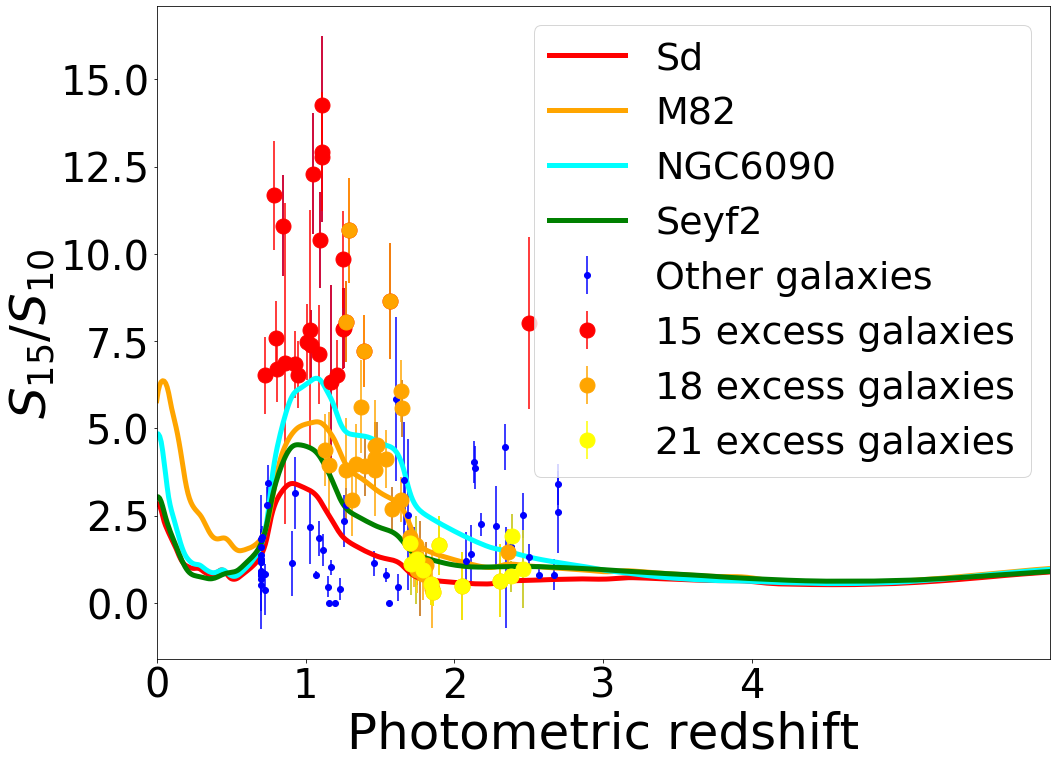

In [23]:
galaxy=pd.read_csv('/home/leolin/Desktop/MIRI_SED/JW_color_15_10.txt')

obs['f15_f10']=obs['jwst.miri.F1500W']/obs['jwst.miri.F1000W']
# ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
obs['f15_f10_err']=np.sqrt(((obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1500W']))**2+((obs['jwst.miri.F1000W_err'])/obs['jwst.miri.F1000W'])**2)*obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1000W_err']

x_pah15=data['best.universe.redshift'][cr_pah15]
y_pah15=obs['f15_f10'][cr_pah15]
y_pah15_err=obs['f15_f10_err'][cr_pah15]

x_pah18=data['best.universe.redshift'][cr_pah18]
y_pah18=obs['f15_f10'][cr_pah18]
y_pah18_err=obs['f15_f10_err'][cr_pah18]

x_pah21=data['best.universe.redshift'][cr_pah21]
y_pah21=obs['f15_f10'][cr_pah21]
y_pah21_err=obs['f15_f10_err'][cr_pah21]


# x_pah=ceers['z'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah=ceers['f15_f10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# x_pah_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah_err=ceers['f15_f10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]


x_all=data['best.universe.redshift'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_all=obs['f15_f10'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=obs['f15_f10_err'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

plt.figure(figsize=(16,12))
plt.errorbar(x_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah15,y_pah15,yerr=y_pah15_err,fmt='o',markersize=15,color='r',label='15 excess galaxies')
plt.errorbar(x_pah18,y_pah18,yerr=y_pah18_err,fmt='o',markersize=15,color='orange',label='18 excess galaxies')
plt.errorbar(x_pah21,y_pah21,yerr=y_pah21_err,fmt='o',markersize=15,color='yellow',label='21 excess galaxies')

plt.plot(galaxy['rshft'],galaxy['Sd'],label='Sd',color='red',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['M82'],label='M82',color='orange',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['N6090'],label='NGC6090',color='cyan',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['seyf2'],label='Seyf2',color='green',linewidth=5)
# plt.xlim(0,2)
plt.legend(fontsize=38)
plt.xlim([0,6])
plt.xlabel('Photometric redshift',fontsize=50)
plt.ylabel('$S_{15}/S_{10}$',fontsize=50)
plt.xticks([0,1,2,3,4],fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('JImmy_CEERS_z_F15_F10_1016.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


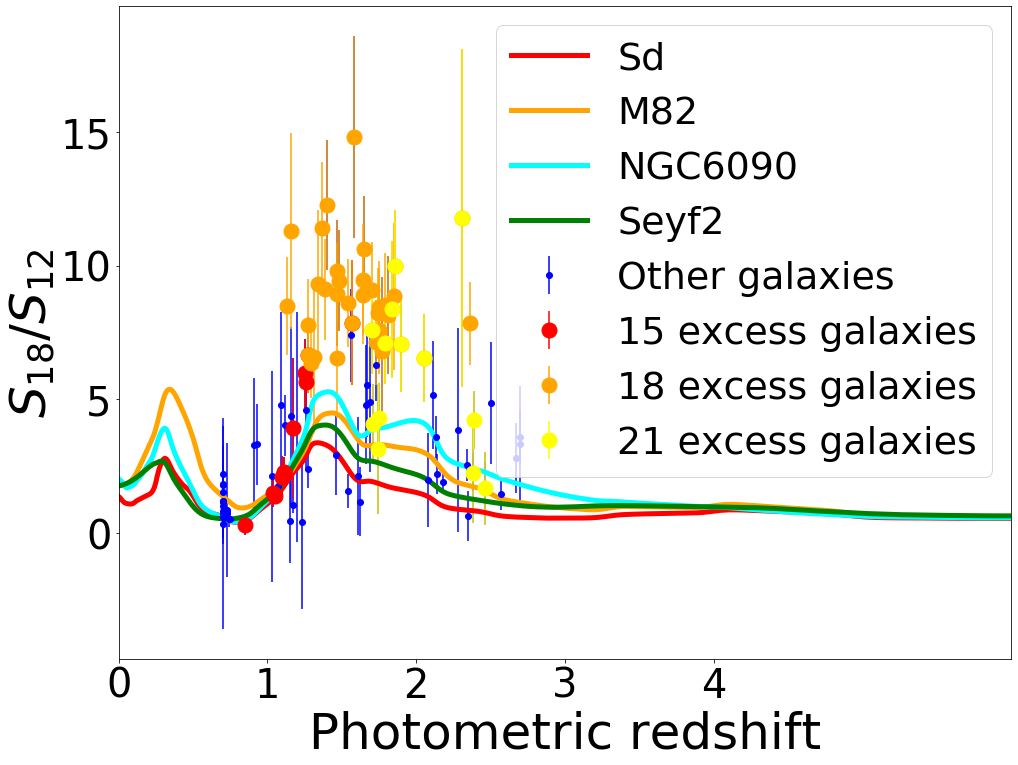

In [26]:
galaxy_18_12=pd.read_csv('/home/leolin/Desktop/MIRI_SED/JW_color_18_12.txt')

obs['f18_f12']=obs['jwst.miri.F1800W']/obs['jwst.miri.F1280W']
# ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
obs['f18_f12_err']=np.sqrt(((obs['jwst.miri.F1800W_err']/obs['jwst.miri.F1800W']))**2+((obs['jwst.miri.F1280W_err'])/obs['jwst.miri.F1280W'])**2)*obs['jwst.miri.F1800W_err']/obs['jwst.miri.F1280W_err']

x_pah15=data['best.universe.redshift'][cr_pah15][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15=obs['f18_f12'][cr_pah15][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15_err=obs['f18_f12_err'][cr_pah15][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

x_pah18=data['best.universe.redshift'][cr_pah18]
y_pah18=obs['f18_f12'][cr_pah18]
y_pah18_err=obs['f18_f12_err'][cr_pah18]

x_pah21=data['best.universe.redshift'][cr_pah21]
y_pah21=obs['f18_f12'][cr_pah21]
y_pah21_err=obs['f18_f12_err'][cr_pah21]



x_all=data['best.universe.redshift'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_all=obs['f18_f12'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=obs['f18_f12_err'][(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

plt.figure(figsize=(16,12))
plt.errorbar(x_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah15,y_pah15,yerr=y_pah15_err,fmt='o',markersize=15,color='r',label='15 excess galaxies')
plt.errorbar(x_pah18,y_pah18,yerr=y_pah18_err,fmt='o',markersize=15,color='orange',label='18 excess galaxies')
plt.errorbar(x_pah21,y_pah21,yerr=y_pah21_err,fmt='o',markersize=15,color='yellow',label='21 excess galaxies')

plt.plot(galaxy_18_12['rshft'],galaxy_18_12['Sd'],label='Sd',color='red',linewidth=5)
plt.plot(galaxy_18_12['rshft'],galaxy_18_12['M82'],label='M82',color='orange',linewidth=5)
plt.plot(galaxy_18_12['rshft'],galaxy_18_12['N6090'],label='NGC6090',color='cyan',linewidth=5)
plt.plot(galaxy_18_12['rshft'],galaxy_18_12['seyf2'],label='Seyf2',color='green',linewidth=5)
# plt.xlim(0,2)
plt.legend(fontsize=38)
plt.xlim([0,6])
plt.xlabel('Photometric redshift',fontsize=50)
plt.ylabel('$S_{18}/S_{12}$',fontsize=50)
plt.xticks([0,1,2,3,4],fontsize=40)
plt.yticks(fontsize=40)
# plt.yscale('log')
plt.savefig('JImmy_CEERS_z_F18_F12_1016.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


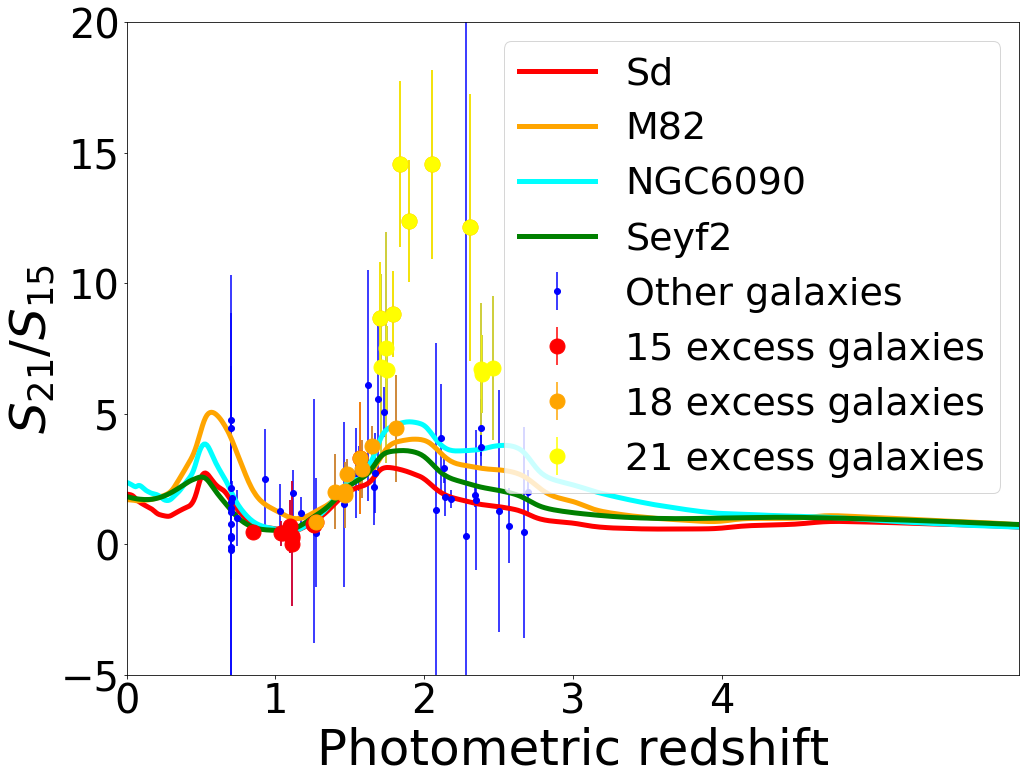

In [28]:
galaxy_21_15=pd.read_csv('/home/leolin/Desktop/MIRI_SED/JW_color_21_15.txt')


obs['f21_f15']=obs['jwst.miri.F2100W']/obs['jwst.miri.F1500W']
# ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
obs['f21_f15_err']=np.sqrt(((obs['jwst.miri.F2100W_err']/obs['jwst.miri.F2100W']))**2+((obs['jwst.miri.F1500W_err'])/obs['jwst.miri.F1500W'])**2)*obs['jwst.miri.F2100W_err']/obs['jwst.miri.F1500W_err']

x_pah15=data['best.universe.redshift'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15=obs['f21_f15'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15_err=obs['f21_f15_err'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

x_pah18=data['best.universe.redshift'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah18=obs['f21_f15'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah18_err=obs['f21_f15_err'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

x_pah21=data['best.universe.redshift'][cr_pah21]
y_pah21=obs['f21_f15'][cr_pah21]
y_pah21_err=obs['f21_f15_err'][cr_pah21]

x_all=data['best.universe.redshift'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_all=obs['f21_f15'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=obs['f21_f15_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

# x_pah=ceers['z'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah=ceers['f15_f10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# x_pah_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah_err=ceers['f15_f10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# sed0to3[['best.reduced_chi_square','best.universe.redshift']][cr_pah15]>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

plt.figure(figsize=(16,12))
plt.errorbar(x_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah15,y_pah15,yerr=y_pah15_err,fmt='o',markersize=15,color='r',label='15 excess galaxies')
plt.errorbar(x_pah18,y_pah18,yerr=y_pah18_err,fmt='o',markersize=15,color='orange',label='18 excess galaxies')
plt.errorbar(x_pah21,y_pah21,yerr=y_pah21_err,fmt='o',markersize=15,color='yellow',label='21 excess galaxies')

plt.plot(galaxy_21_15['rshft'],galaxy_21_15['Sd'],label='Sd',color='red',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['M82'],label='M82',color='orange',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['N6090'],label='NGC6090',color='cyan',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['Seyf2'],label='Seyf2',color='green',linewidth=5)
# plt.xlim(0,2)
plt.legend(fontsize=38)
plt.xlim([0,6])
plt.ylim([-5,20])
plt.xlabel('Photometric redshift',fontsize=50)
plt.ylabel('$S_{21}/S_{15}$',fontsize=50)
plt.xticks([0,1,2,3,4],fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('JImmy_CEERS_z_F21_F15_1016.png')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


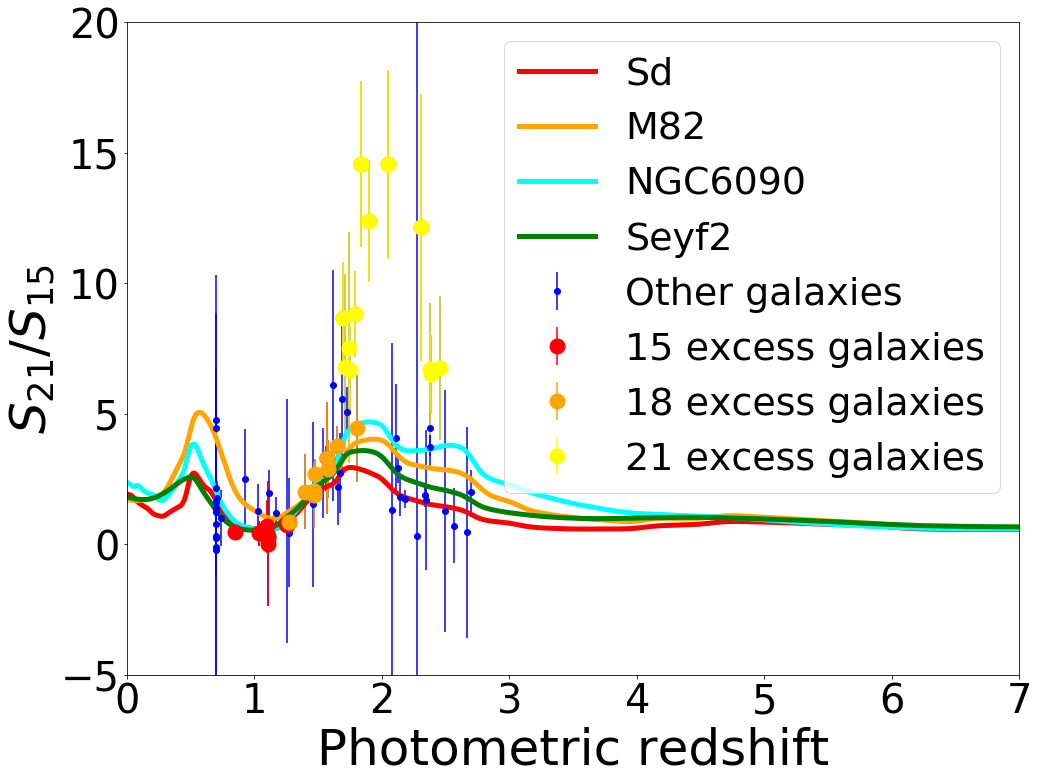

In [52]:
galaxy_21_15=pd.read_csv('/home/leolin/Desktop/MIRI_SED/JW_color_21_15.txt')


obs['f21_f15']=obs['jwst.miri.F2100W']/obs['jwst.miri.F1500W']
# ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
obs['f21_f15_err']=np.sqrt(((obs['jwst.miri.F2100W_err']/obs['jwst.miri.F2100W']))**2+((obs['jwst.miri.F1500W_err'])/obs['jwst.miri.F1500W'])**2)*obs['jwst.miri.F2100W_err']/obs['jwst.miri.F1500W_err']

x_pah15=sed0925['best.universe.redshift'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15=obs['f21_f15'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah15_err=obs['f21_f15_err'][cr_pah15][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

x_pah18=sed0925['best.universe.redshift'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah18=obs['f21_f15'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_pah18_err=obs['f21_f15_err'][cr_pah18][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

x_pah21=sed0925['best.universe.redshift'][cr_pah21]
y_pah21=obs['f21_f15'][cr_pah21]
y_pah21_err=obs['f21_f15_err'][cr_pah21]

x_all=sed0925['best.universe.redshift'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
y_all=obs['f21_f15'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=obs['f21_f15_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

# x_pah=ceers['z'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah=ceers['f15_f10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# x_pah_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah_err=ceers['f15_f10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# sed0to3[['best.reduced_chi_square','best.universe.redshift']][cr_pah15]>0)&((obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]

plt.figure(figsize=(16,12))
plt.errorbar(x_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah15,y_pah15,yerr=y_pah15_err,fmt='o',markersize=15,color='r',label='15 excess galaxies')
plt.errorbar(x_pah18,y_pah18,yerr=y_pah18_err,fmt='o',markersize=15,color='orange',label='18 excess galaxies')
plt.errorbar(x_pah21,y_pah21,yerr=y_pah21_err,fmt='o',markersize=15,color='yellow',label='21 excess galaxies')

plt.plot(galaxy_21_15['rshft'],galaxy_21_15['Sd'],label='Sd',color='red',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['M82'],label='M82',color='orange',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['N6090'],label='NGC6090',color='cyan',linewidth=5)
plt.plot(galaxy_21_15['rshft'],galaxy_21_15['Seyf2'],label='Seyf2',color='green',linewidth=5)
plt.xlim(0,10)
plt.legend(fontsize=38)
plt.xlim([0,6])
plt.ylim([-5,20])
plt.xlabel('Photometric redshift',fontsize=50)
plt.ylabel('$S_{21}/S_{15}$',fontsize=50)
plt.xticks([0,1,2,3,4,5,6,7],fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('JImmy_CEERS_z_F21_F15_1002.png')

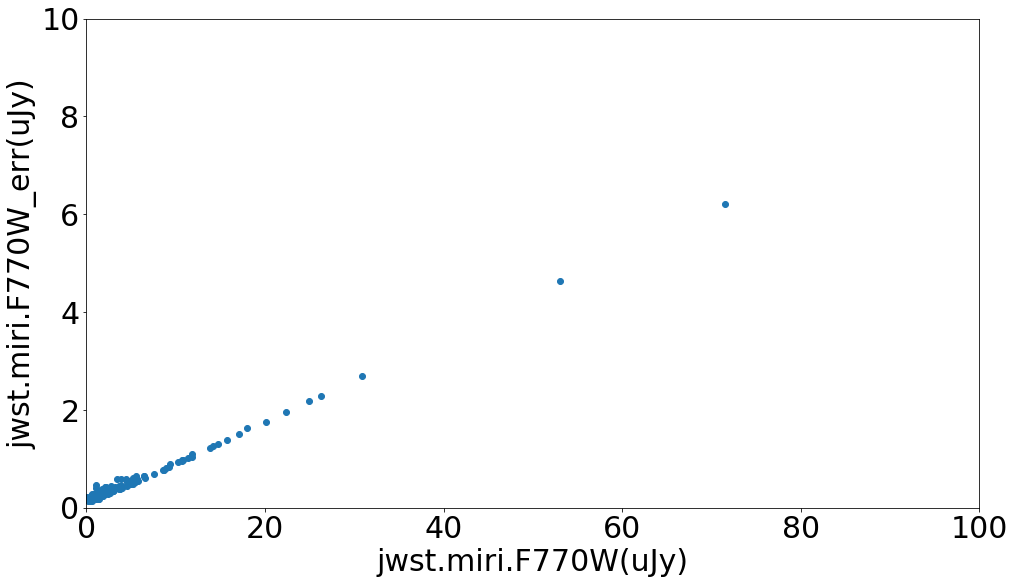

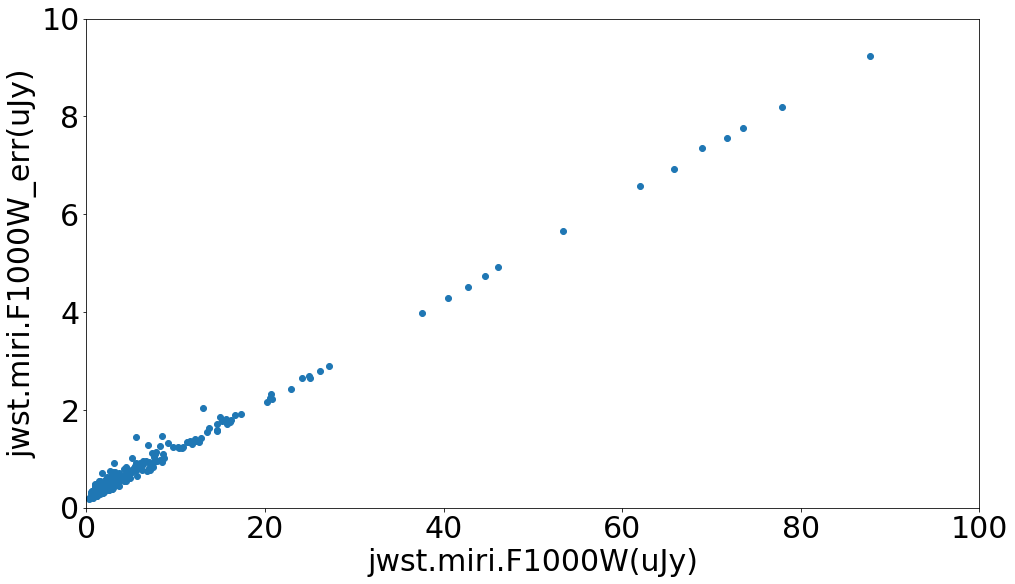

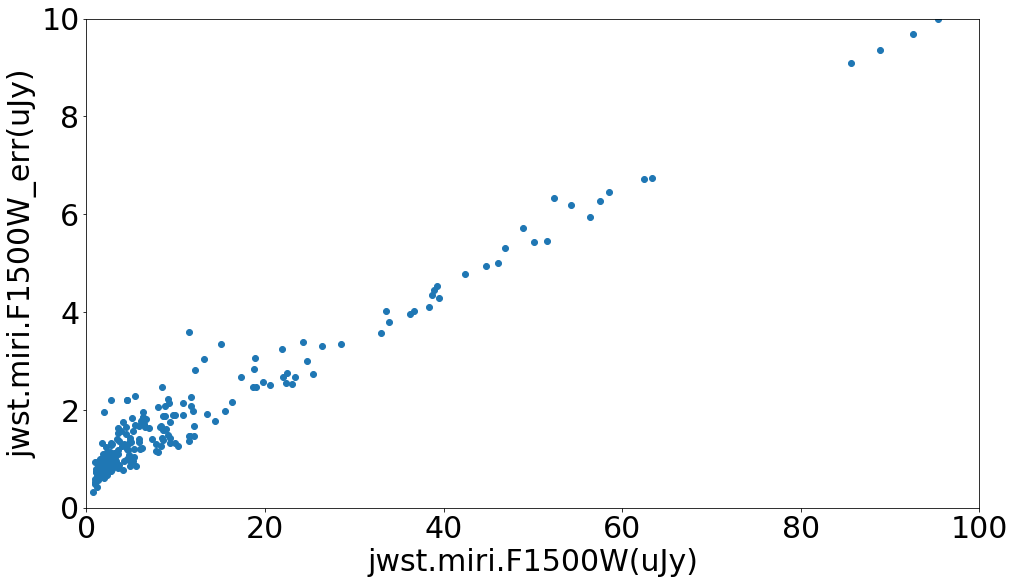

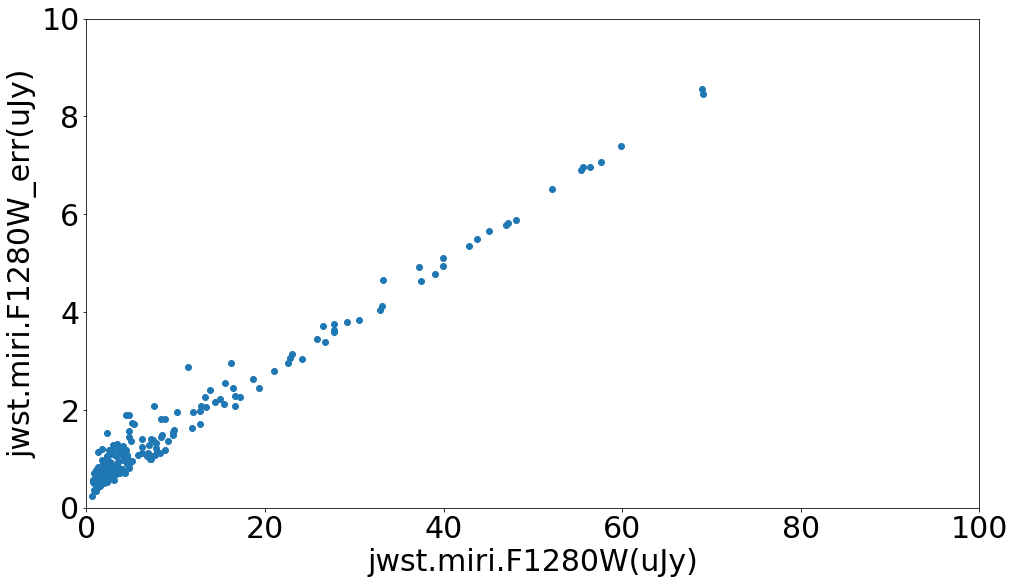

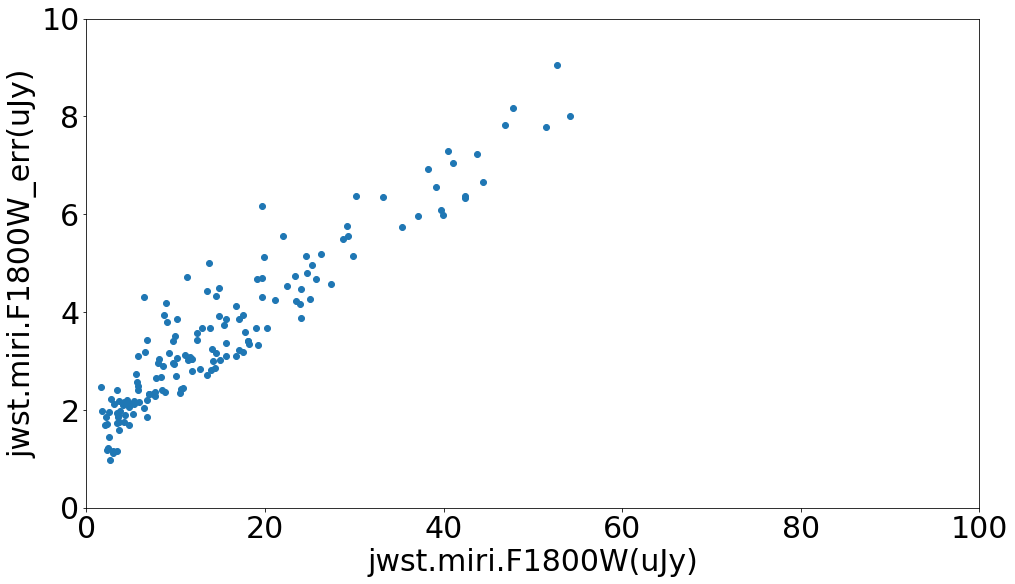

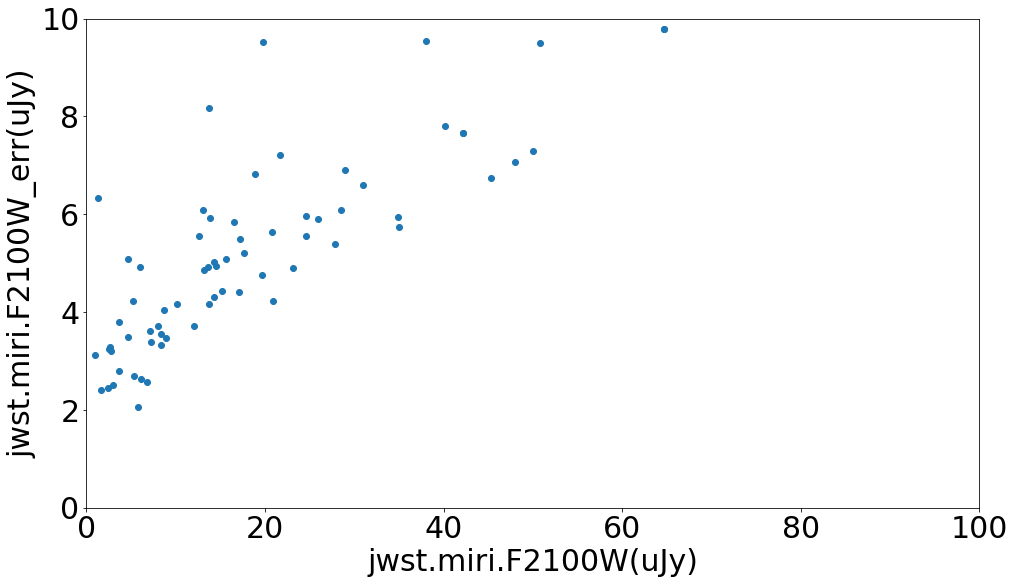

In [57]:
###plot the flux density vs error for Jimmy 4 fields

for i in range(6):
    plt.figure(figsize=(16,9))
    # plt.scatter(ceers[col[2*i]]*1000,ceers[col[2*i+1]]*1000)
    plt.scatter(obs[col[2*i]][cr15]*1000,obs[col[2*i+1]][cr15]*1000)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlabel(col[2*i]+'(uJy)',fontsize=30)
    plt.ylabel(col[2*i+1]+'(uJy)',fontsize=30)
    plt.xlim([0,100])
    plt.ylim([0,10])
    plt.savefig(f'jimmy_flux_vs_error_{col[2*i]}.png')

In [8]:
agn=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0706_Daryl_AGN_templates/results.txt')

In [9]:
agn['best.agn.fracAGN']

0     0.000
1     0.000
2     0.025
3     0.000
4     0.000
5     0.000
6     0.025
7     0.000
8     0.000
9     0.000
10    0.000
11    0.000
12    0.000
Name: best.agn.fracAGN, dtype: float64

In [40]:
dust_ex=pd.read_csv('/home/leolin/Desktop/MIRI_SED/dust_extinction_curve_R25.csv')
A7=dust_ex['Curve1'].iloc[78]
A10=(dust_ex['Curve1'].iloc[89]+dust_ex['Curve1'].iloc[90])/2
A15=dust_ex['Curve1'].iloc[99]
A18=dust_ex['Curve1'].iloc[102]


print(A7,A10,A15,A18)

0.020475 0.056 0.025377 0.033717000000000004


In [58]:
agn[['id','best.agn.beta', 'best.agn.fracAGN', 'best.agn.gamma',
       'best.agn.opening_angle', 'best.agn.psy', 'best.agn.r_ratio',
       'best.agn.tau', 'best.attenuation.Av_BC', 'best.attenuation.Av_ISM','best.agn.agn_luminosity','bayes.dust.luminosity']]

id  best.agn.beta  best.agn.fracAGN  best.agn.gamma  \
0    59           -0.5             0.000               4   
1    64           -0.5             0.000               4   
2    66           -0.5             0.025               4   
3    72           -0.5             0.000               4   
4   113           -0.5             0.000               4   
5   118           -0.5             0.000               4   
6   136           -0.5             0.025               4   
7   145           -0.5             0.000               4   
8   178           -0.5             0.000               4   
9   187           -0.5             0.000               4   
10  218           -0.5             0.000               4   
11  225           -0.5             0.000               4   
12  250           -0.5             0.000               4   

    best.agn.opening_angle  best.agn.psy  best.agn.r_ratio  best.agn.tau  \
0                      100         0.001                60           0.3   
1                      100         0.001                60           0.3   
2                      100         0.001                60           6.0   
3                      100         0.001                60           0.3   
4                      100         0.001                60           0.3   
5                      100         0.001                60           0.3   
6                      100         0.001                60           6.0   
7                      100         0.001                60           0.3   
8                      100         0.001                60           0.3   
9                      100         0.001                60           0.3   
10                     100         0.001                60           0.3   
11                     100         0.001                60           0.3   
12                     100         0.001                60           0.3   

    best.attenuation.Av_BC  best.attenuation.Av_ISM  best.agn.agn_luminosity  \
0                 0.274201                 0.215443             0.000000e+00   
1                 0.590748                 0.464159             0.000000e+00   
2                 2.742008                 2.154435             3.980589e+35   
3                 1.272727                 1.000000             0.000000e+00   
4                 2.742008                 2.154435             0.000000e+00   
5                 0.127273                 0.100000             0.000000e+00   
6                 1.272727                 1.000000             1.752901e+35   
7                 0.590748                 0.464159             0.000000e+00   
8                 2.742008                 2.154435             0.000000e+00   
9                 2.742008                 2.154435             0.000000e+00   
10                1.272727                 1.000000             0.000000e+00   
11                0.590748                 0.464159             0.000000e+00   
12                0.590748                 0.464159             0.000000e+00   

    bayes.dust.luminosity  
0            1.627309e+37  
1            1.331514e+37  
2            1.614477e+38  
3            2.943275e+37  
4            1.461498e+38  
5            1.225638e+36  
6            8.084948e+37  
7            4.398445e+36  
8            1.016773e+38  
9            2.200788e+38  
10           1.963560e+37  
11           1.479075e+37  
12           5.785595e+36

Put three files into one by samllest best_chi_square value

In [70]:
import shutil
import os
for i in range(len(sed1012[cr_pah&(z1|z15|z2)])):
    # 參數值
    # parameters = {
    #     '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1': sed0to1['best.reduced_chi_square'].iloc[i],
    #     '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z1to2': sed1to2['best.reduced_chi_square'].iloc[i],
    #     '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z2to3': sed2to3['best.reduced_chi_square'].iloc[i]
    # }

    # # 找出最小參數值
    # min_parameter = min(parameters.values())
    # # 找出最小參數值所對應的資料夾
    # min_folder = [folder for folder, value in parameters.items() if value == min_parameter][0]
    # # print(min_folder,min_parameter)
    # # 資料夾路徑
    # folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922'
    # source_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922'
    # destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id'
    source_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_1012'
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_1012/pah'
    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    # source_file = os.path.join(source_folder, sed0to1['id'].iloc[i]+'_best_model.pdf')
    # destination_file = os.path.join(destination_folder,sed0to1['id'].iloc[i]+'_'+str(i)+'_best_model.pdf')

    source_file = os.path.join(source_folder, obs['id'][cr_pah&(z1|z15|z2)].iloc[i]+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah&(z1|z15|z2)].iloc[i]+'_'+str(obs[cr_pah&(z1|z15|z2)].index[i])+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)

In [89]:
### put best chi-square pdf and fits files into 15 18 21 folder
for i in range(len(obs[cr_pah15])):
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id'
    source_folder = folder_path
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id/pah15'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, obs['id'][cr_pah15].iloc[i]+'_'+str(obs[cr_pah15].index[i])+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah15].iloc[i]+'cr_pah & z')
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id'
    source_folder = folder_path
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id/pah18'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, obs['id'][cr_pah18].iloc[i]+'_'+str(obs[cr_pah18].index[i])+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah18].iloc[i]+'_'+str(obs[cr_pah18].index[i])+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)

for i in range(len(obs[cr_pah21])):
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id'
    source_folder = folder_path
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z1to3_0922/id/pah21'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, obs['id'][cr_pah21].iloc[i]+'_'+str(obs[cr_pah21].index[i])+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah21].iloc[i]+'_'+str(obs[cr_pah21].index[i])+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)

In [67]:
# Put three files into one by samllest best_chi_square value

import shutil
import os
for i in range(len(sed0to1)):
    # 參數值
    parameters = {
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1': sed0to1['best.reduced_chi_square'].iloc[i],
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z1to2': sed1to2['best.reduced_chi_square'].iloc[i],
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z2to3': sed2to3['best.reduced_chi_square'].iloc[i]
    }

    # 找出最小參數值
    min_parameter = min(parameters.values())
    # 找出最小參數值所對應的資料夾
    min_folder = [folder for folder, value in parameters.items() if value == min_parameter][0]
    # print(min_folder,min_parameter)
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1'
    source_folder = os.path.join(folder_path, min_folder)
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, sed0to1['id'].iloc[i]+'_best_model.fits')
    destination_file = os.path.join(destination_folder,sed0to1['id'].iloc[i]+'_best_model.fits')

    # 複製檔案
    shutil.copy(source_file, destination_file)


for i in range(len(sed0to1)):
    # 參數值
    parameters = {
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1': sed0to1['best.reduced_chi_square'].iloc[i],
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z1to2': sed1to2['best.reduced_chi_square'].iloc[i],
        '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z2to3': sed2to3['best.reduced_chi_square'].iloc[i]
    }

    # 找出最小參數值
    min_parameter = min(parameters.values())
    # 找出最小參數值所對應的資料夾x=sedav['best.attenuation.Av_ISM'][cr_pah&(z1|z15|z2)]
    min_folder = [folder for folder, value in parameters.items() if value == min_parameter][0]
    # print(min_folder,min_parameter)
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1'77	CANDELS_EGS_F160W_J142018.5+525836.6
    source_folder = os.path.join(folder_path, min_folder)
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, sed0to1['id'].iloc[i]+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,sed0to1['id'].iloc[i]+'_'+str(i)+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)



# print(f"將 {min_folder} 資料夾中的 1.fits 檔案複製到目標資料夾中")


### put three results into one csv file

sed0to3=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to1/results.txt')

for i in range(len(sed0to1)):
    parameters = {
        '0': sed0to1['best.reduced_chi_square'].iloc[i],
        '1': sed1to2['best.reduced_chi_square'].iloc[i],
        '2': sed2to3['best.reduced_chi_square'].iloc[i]
    }
    min_parameter = min(parameters.values())
    min_folder = [folder for folder, value in parameters.items() if value == min_parameter][0]x=sedav['best.attenuation.Av_ISM'][cr_pah&(z1|z15|z2)]
    # print(type(min_folder),min_parameter)
    if min_folder =='0':
        sed0to3.iloc[i]=sed0to1.iloc[i]
    elif min_folder =='1':
        sed0to3.iloc[i]=sed1to2.iloc[i]
    elif min_folder =='2':
        sed0to3.iloc[i]=sed2to3.iloc[i]
    
    # print(sed0to3.iloc[i])x_all,y_all,

In [72]:
obs[cr_pah15].index[1]

55

In [77]:
### put best chi-square pdf and fits files into 15 18 21 folder
for i in range(len(obs[cr_pah15])):
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3'
    source_folder = folder_path
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah/pah15'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, obs['id'][cr_pah15].iloc[i]+'_'+str(obs[cr_pah15].index[i])+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah15].iloc[i]+'_'+str(obs[cr_pah15].index[i])+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)

for i in range(len(obs[cr_pah18])):
    # 資料夾路徑
    folder_path = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3'
    source_folder = folder_path
    destination_folder = '/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah/pah18'

    # 複製最小參數值資料夾中的 1.fits 檔案到目標資料夾
    source_file = os.path.join(source_folder, obs['id'][cr_pah18].iloc[i]+'_'+str(obs[cr_pah18].index[i])+'_best_model.pdf')
    destination_file = os.path.join(destination_folder,obs['id'][cr_pah18].iloc[i]+'_'+str(obs[cr_pah18].index[i])+'_best_model.pdf')

    # 複製檔案
    shutil.copy(source_file, destination_file)
'best.dust.luminosity'

In [78]:
# ### put three results into one file
x_all,y_all,
#     # print(type(min_folder),min_parameter)
#     if min_folder =='0':
#         sed0to3.iloc[i]=sed0to1.iloc[i]
#     elif min_folder =='1':
#         sed0to3.iloc[i]=sed1to2.iloc[i]
#     elif min_folder =='2':
#         sed0to3.iloc[i]=sed2to3.iloc[i]
    
#     # print(sed0to3.iloc[i])
# sed0to3.to_csv('/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3/results.csv')
# # print(sed0to3)

In [16]:
obs['F10_F7']=obs['jwst.miri.F1000W']/obs['jwst.miri.F770W']
obs['F15_F7']=obs['jwst.miri.F1500W']/obs['jwst.miri.F770W']
obs['F15_F10']=obs['jwst.miri.F1500W']/obs['jwst.miri.F1000W']
obs['F18_F10']=obs['jwst.miri.F1800W']/obs['jwst.miri.F1000W']
obs['F18_F15']=obs['jwst.miri.F1800W']/obs['jwst.miri.F1500W']
obs['F18_F12']=obs['jwst.miri.F1800W']/obs['jwst.miri.F1280W']
obs['F21_F10']=obs['jwst.miri.F2100W']/obs['jwst.miri.F1000W']
obs['F21_F15']=obs['jwst.miri.F2100W']/obs['jwst.miri.F1500W']


obs['F10_F7_err']=obs['F10_F7']*np.sqrt((obs['jwst.miri.F1000W_err']/obs['jwst.miri.F1000W'])**2+(obs['jwst.miri.F770W_err']/obs['jwst.miri.F770W'])**2)
obs['F15_F7_err']=obs['F15_F7']*np.sqrt((obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1500W'])**2+(obs['jwst.miri.F770W_err']/obs['jwst.miri.F770W'])**2)
obs['F15_F10_err']=obs['F15_F10']*np.sqrt((obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1500W'])**2+(obs['jwst.miri.F1000W_err']/obs['jwst.miri.F1000W'])**2)
obs['F18_F10_err']=obs['F18_F10']*np.sqrt((obs['jwst.miri.F1800W_err']/obs['jwst.miri.F1800W'])**2+(obs['jwst.miri.F1000W_err']/obs['jwst.miri.F1000W'])**2)
obs['F18_F15_err']=obs['F18_F15']*np.sqrt((obs['jwst.miri.F1800W_err']/obs['jwst.miri.F1800W'])**2+(obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1500W'])**2)
obs['F18_F12_err']=obs['F18_F12']*np.sqrt((obs['jwst.miri.F1800W_err']/obs['jwst.miri.F1800W'])**2+(obs['jwst.miri.F1280W_err']/obs['jwst.miri.F1280W'])**2)
obs['F21_F10_err']=obs['F21_F10']*np.sqrt((obs['jwst.miri.F2100W_err']/obs['jwst.miri.F2100W'])**2+(obs['jwst.miri.F1000W_err']/obs['jwst.miri.F1000W'])**2)
obs['F21_F15_err']=obs['F21_F15']*np.sqrt((obs['jwst.miri.F2100W_err']/obs['jwst.miri.F2100W'])**2+(obs['jwst.miri.F1500W_err']/obs['jwst.miri.F1500W'])**2)


In [47]:
data=sed0925


cr21=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)
cr18=(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1000W_err']>0)
cr7=(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)
cr15=(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1000W_err']>0)

cr_pah=(cr18&(obs['F18_F12']>10**0.8))|(cr21&(obs['F21_F15']>10**0.8))|(cr15&(obs['F15_F10']>10**0.8))
cr_pah15=cr15&(obs['F15_F10']>10**0.8)
cr_pah18=cr18&(obs['F18_F12']>10**0.8)
cr_pah21=cr21&(obs['F21_F15']>10**0.8)

z1=(data['best.universe.redshift']>0.75)&(data['best.universe.redshift']<=1.25)
z15=(data['best.universe.redshift']>1.25)&(data['best.universe.redshift']<=1.75)
z2=(data['best.universe.redshift']>1.75)

# agn_tom=[1, 12, 33, 36, 50, 70, 89, 99, 103, 112, 115, 120, 123, 138, 164, 179, 194, 210, 212, 235, 276, 317, 328, 344, 354, 368, 456, 459, 491, 521]
agn_tom=[296, 344, 365, 445, 0, 1, 12, 33, 63, 78, 99, 101, 108, 112, 123, 177, 210, 211, 235, 249, 260, 306, 328, 341, 342, 345, 354, 443, 448, 453, 454, 455, 459, 463, 464, 466, 473, 477, 481, 487, 491, 495]


pah_ind=data[cr_pah&(z1|z15|z2)].index.tolist()
weird=[253,298,346]
pah=[i for i in pah_ind if i not in weird]


print(len(obs[cr18&(obs['F18_F12']>10**0.8)]))
print(len(obs[cr15&(obs['F15_F10']>10**0.8)]))


pah_ind=sed0925[cr_pah&(z1|z15|z2)].index.tolist()
pah_ind15=sed0925[cr_pah&z1].index.tolist()
pah_ind18=sed0925[cr_pah&z15].index.tolist()
pah_ind21=sed0925[cr_pah&z2].index.tolist()
weird=[253,298,346,177]
pah=[i for i in pah_ind if i not in weird]
pah15=[i for i in pah_ind15 if i not in weird]
pah18=[i for i in pah_ind18 if i not in weird]
pah21=[i for i in pah_ind21 if i not in weird]


39
25


In [48]:
len(pah15),len(pah18),len(pah21)

(19, 30, 13)

In [45]:
len(pah_ind15),len(pah_ind18),len(pah_ind21)

(22, 30, 15)

In [29]:
sed0925['best.universe.redshift'].iloc[pah21]

38     2.31
41     1.81
46     1.90
58     2.05
76     1.84
89     1.77
138    2.39
220    1.79
258    2.46
271    2.38
303    1.85
432    2.36
433    1.79
Name: best.universe.redshift, dtype: float64

In [19]:
sed0925['best.universe.redshift'][cr_pah&z2]

38     2.31
41     1.81
46     1.90
58     2.05
76     1.84
89     1.77
138    2.39
177    2.50
220    1.79
253    1.86
258    2.46
271    2.38
303    1.85
432    2.36
433    1.79
Name: best.universe.redshift, dtype: float64

In [40]:
egs_id_pah=[obs[obs['id']==egs_id[i]].index.values[0] for i in range(10)]
# for i in range(12):
#     print(obs[obs['id']==egs_id[i]].index)
egs_id_pah
    

[52, 55, 57, 61, 100, 121, 167, 170, 197, 203]

In [64]:
ceers[['jwst.miri.F770W','jwst.miri.F1000W','jwst.miri.F1280W','jwst.miri.F1500W','jwst.miri.F1800W','jwst.miri.F2100W']].iloc[index]

jwst.miri.F770W  jwst.miri.F1000W  jwst.miri.F1280W  jwst.miri.F1500W  \
59          0.003452          0.003096          0.023652          0.037548   
64          0.001204          0.000745          0.003456          0.007204   
66          0.011925          0.010002          0.050012          0.118253   
72          0.002932          0.002355          0.013922          0.028602   
113         0.004703          0.004820          0.013585          0.036804   
136         0.007931          0.010093          0.028720          0.078931   
178         0.008136          0.006696          0.020886          0.044307   
187         0.007384          0.006375          0.018661          0.048550   
218         0.002486          0.001666          0.010175          0.019465   
225         0.001021          0.000872          0.004504          0.010224   

     jwst.miri.F1800W  jwst.miri.F2100W  
59           0.031136          0.014408  
64           0.005970          0.010116  
66           0.099520          0.015864  
72           0.029403          0.007394  
113          0.211840          0.057720  
136          0.146535          0.033048  
178          0.094339          0.028735  
187          0.108598          0.030709  
218          0.016741          0.003562  
225          0.006996          0.014321

In [65]:
obs[['jwst.miri.F770W','jwst.miri.F1000W','jwst.miri.F1280W','jwst.miri.F1500W','jwst.miri.F1800W','jwst.miri.F2100W']].iloc[egs_id_pah]

jwst.miri.F770W  jwst.miri.F1000W  jwst.miri.F1280W  jwst.miri.F1500W  \
52          0.014205          0.012135          0.069104          0.149200   
55          0.002039          0.001388          0.006888          0.014427   
57          0.026258          0.020266          0.114678          0.258948   
61          0.008962          0.006230          0.039917          0.088852   
100         0.010700          0.012856          0.030510          0.096117   
121         0.020107          0.020743          0.057599          0.163023   
167         0.022391          0.015687          0.047270          0.123733   
170         0.014691          0.011837          0.033138          0.095417   
197         0.005455          0.002964          0.019306          0.038322   
203         0.004560          0.004576          0.016670          0.033835   

     jwst.miri.F1800W  jwst.miri.F2100W  
52           0.096524          0.064635  
55           0.014524          0.010116  
57           0.258928          0.064653  
61           0.089874          0.028500  
100        -99.000000        -99.000000  
121          0.344331          0.128995  
167          0.267797          0.093376  
170          0.220355          0.083313  
197          0.044407          0.000998  
203          0.025242          0.014321

In [137]:
ic=obs[cr_pah].index.values
print(ic)

[ 13  32  38  41  42  46  52  55  57  58  61  74  76  89 100 121 128 138
 167 170 177 180 197 203 220 224 237 238 245 252 253 258 271 272 274 295
 298 299 300 303 307 316 317 319 333 335 346 347 350 362 422 428 432 433
 436 437 438 471 472 474 480 484 497 501 503 506 507 508]


In [38]:
obs[['jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F770W','jwst.miri.F770W_err','F10_F7','F10_F7_err']].iloc[[81,240]]

jwst.miri.F1000W  jwst.miri.F1000W_err  jwst.miri.F770W  \
81           0.001024              0.000447         0.000093   
240          0.008241              0.001266         0.000359   

     jwst.miri.F770W_err     F10_F7  F10_F7_err  
81              0.000218  10.958340   26.075096  
240             0.000192  22.974801   12.822858

No handles with labels found to put in legend.


1         7.772984
2         4.759008
4         1.236168
8      5734.013644
9         4.914608
          ...     
267       2.352148
271      16.370372
272      12.674432
273      10.224208
274       9.842460
Name: jwst.miri.F1000W, Length: 124, dtype: float64


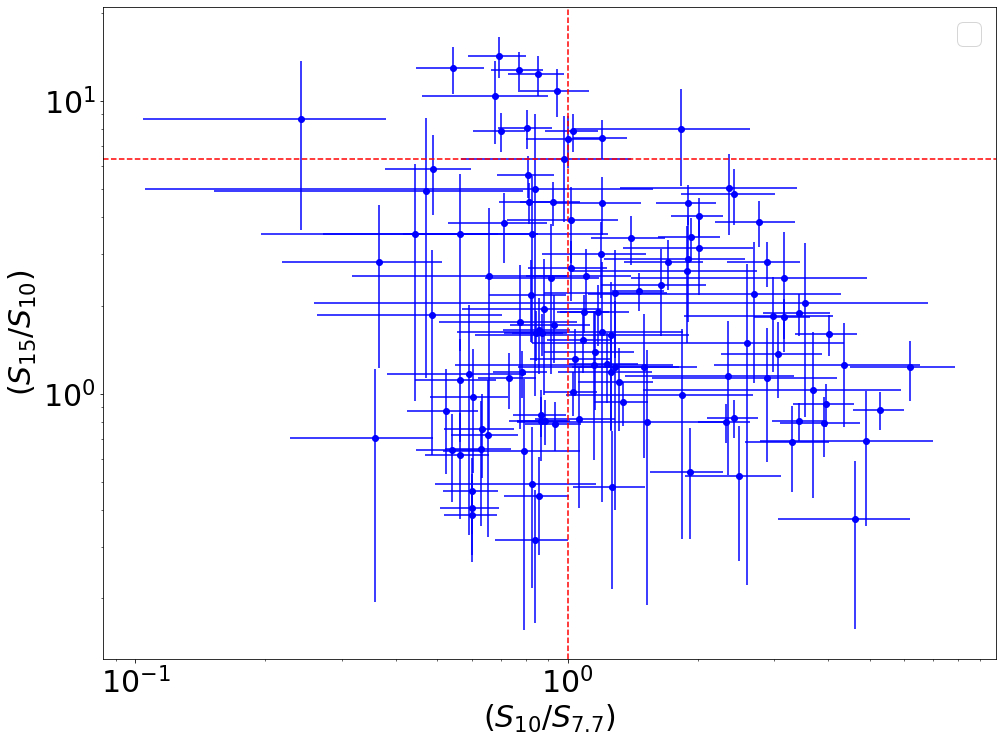

In [47]:
x_pah=obs['F10_F7'][cr_pah15]
y_pah=obs['F15_F10'][cr_pah15]
x_pah_err=obs['F10_F7_err'][cr_pah15]
y_pah_err=obs['F15_F10_err'][cr_pah15]
# cr7=(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']<0)
# cr15=(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)

x_all=obs['F10_F7'][cr7]
y_all=obs['F15_F10'][cr7]
x_all_err=obs['F10_F7_err'][cr7]
y_all_err=obs['F15_F10_err'][cr7]

x_up= obs['jwst.miri.F1000W'][cr7]/(0.25/1000)
y_up= obs['F15_F10'][cr7]
y_up_err=obs['F15_F10_err'][cr7]

print(x_up)

plt.figure(figsize=(16,12))
# plt.errorbar(x_all,y_all,fmt='o',color='b',label='Other galaxies')
# plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_all[x_all<10],y_all[x_all<10],yerr=y_all_err[x_all<10],xerr=x_all_err[x_all<10],fmt='o',color='b',label='')
# plt.errorbar(x_up,y_up,xerr=-1,yerr=y_up_err,fmt='o',color='b',label='')
# plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='r',label='PAH galaxies')
plt.legend(fontsize=30)
# plt.axvline(0.75,c='r',ls='--')
plt.axhline(10**0.8,c='r',ls='--')
plt.axvline(1,c='r',ls='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('($S_{10}/S_{7.7}$)',fontsize=30)
plt.ylabel('($S_{15}/S_{10}$)',fontsize=30)
plt.savefig('jimmy_CEERS_ccplot_F15_F7_0911.png')

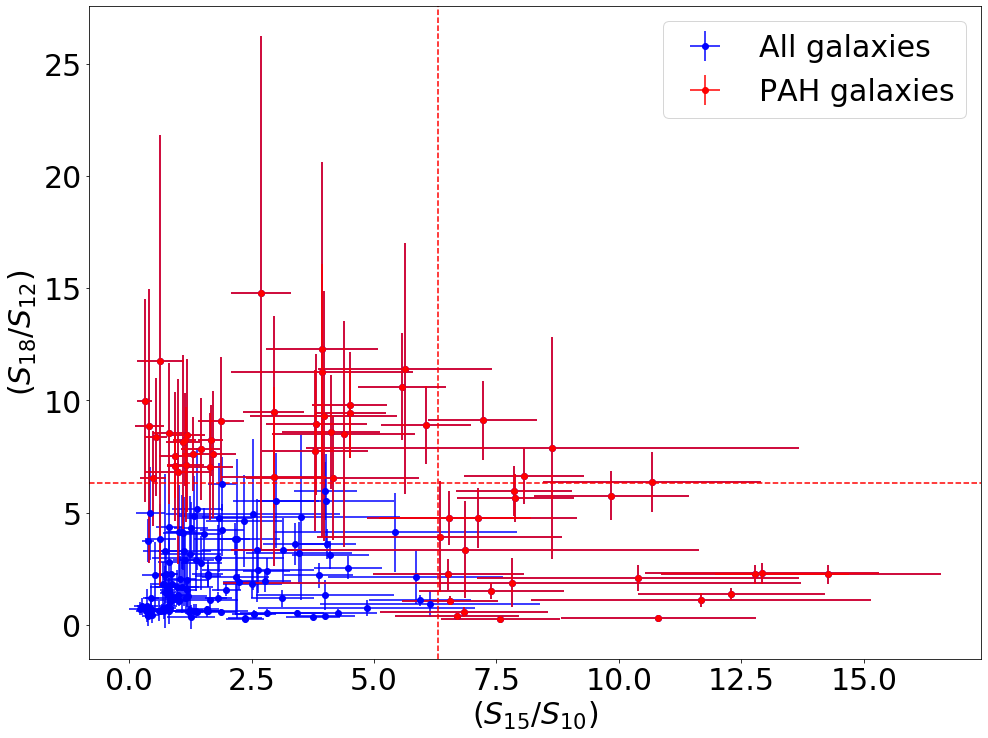

In [49]:
cr21=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)
cr18=(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1000W_err']>0)
x_all=obs['F15_F10'][cr18]
y_all=obs['F18_F12'][cr18]
x_all_err=obs['F15_F10_err'][cr18]
y_all_err=obs['F18_F12_err'][cr18]


x_pah=obs['F15_F10'][cr_pah18|cr_pah15]
y_pah=obs['F18_F12'][cr_pah18|cr_pah15]
x_pah_err=obs['F15_F10_err'][cr_pah18|cr_pah15]
y_pah_err=obs['F18_F12_err'][cr_pah18|cr_pah15]

# print(x_all[x_all>10**0.8])
# print(y_all[y_all>10**0.8])

plt.figure(figsize=(16,12))


# plt.errorbar(x_all,y_all,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='b',label='All galaxies')
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='r',label='PAH candidates')
plt.legend(fontsize=30)
# plt.axvline(0.75,c='r',ls='--')
plt.axhline(10**0.8,c='r',ls='--')
plt.axvline(10**0.8,c='r',ls='--')

plt.xlabel('($S_{15}/S_{10}$)',fontsize=30)
plt.ylabel('($S_{18}/S_{12}$)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.savefig('jimmy_CEERS_ccplot_F15_F7_0911.png')
# z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
# z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
# z2=(sed0925['best.universe.redshift']>1.75)
plt.savefig('jimmy_CEERS_ccplot_F18_F10_0116.png')

In [91]:
# cr_pah=(cr18&(obs['F18_F12']>10**0.8))|(cr21&(obs['F21_F15']>10**0.8))|(cr15&(obs['F15_F10']>10**0.8))

obs[['id','jwst.miri.F770W','jwst.miri.F770W_err','jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1280W','jwst.miri.F1280W_err',
'jwst.miri.F1500W','jwst.miri.F1500W_err','jwst.miri.F1800W','jwst.miri.F1800W_err','jwst.miri.F2100W','jwst.miri.F2100W_err']][cr_pah].to_csv('jimmy_pah_color_selection.csv')


In [45]:
obs[cr_pah21]

id  redshift  cfht.megacam.u  \
13   CANDELS_EGS_F160W_J142043.3+530247.4        -1        0.000031   
32   CANDELS_EGS_F160W_J142042.8+530260.0        -1        0.000039   
38   CANDELS_EGS_F160W_J142042.1+530301.5        -1        0.000112   
42   CANDELS_EGS_F160W_J142040.5+530256.7        -1        0.000006   
46   CANDELS_EGS_F160W_J142042.4+530315.6        -1        0.000827   
58   CANDELS_EGS_F160W_J142037.7+530251.1        -1        0.000071   
76   CANDELS_EGS_F160W_J142038.8+530319.7        -1        0.000091   
138  CANDELS_EGS_F160W_J142032.6+530320.2        -1        0.000111   
220  CANDELS_EGS_F160W_J142018.3+525937.7        -1       -0.000044   
252  CANDELS_EGS_F160W_J142017.2+530004.5        -1        0.000094   
253  CANDELS_EGS_F160W_J142017.2+530005.3        -1       -0.000002   
258  CANDELS_EGS_F160W_J142016.7+530005.7        -1        0.000007   
271  CANDELS_EGS_F160W_J142011.7+525933.5        -1        0.000016   

     cfht.megacam.u_err  cfht.megacam.g  cfht.megacam.g_err  cfht.megacam.r  \
13             0.000013        0.000047            0.000012        0.000077   
32             0.000010        0.000082            0.000010        0.000081   
38             0.000015        0.000306            0.000017        0.000362   
42             0.000009       -0.000001            0.000007        0.000018   
46             0.000029        0.001330            0.000034        0.001522   
58             0.000011        0.000200            0.000015        0.000249   
76             0.000013        0.000138            0.000013        0.000151   
138            0.000013        0.000224            0.000013        0.000313   
220            0.000010       -0.000006            0.000007        0.000014   
252            0.000014        0.000181            0.000014        0.000211   
253            0.000012        0.000024            0.000011        0.000023   
258            0.000010        0.000033            0.000008        0.000033   
271            0.000010        0.000098            0.000012        0.000185   

     cfht.megacam.r_err  cfht.megacam.iold  cfht.megacam.iold_err  ...  \
13             0.000014           0.000088               0.000019  ...   
32             0.000012           0.000140               0.000016  ...   
38             0.000021           0.000442               0.000026  ...   
42             0.000009           0.000011               0.000011  ...   
46             0.000040           0.001800               0.000051  ...   
58             0.000018           0.000350               0.000024  ...   
76             0.000015           0.000222               0.000020  ...   
138            0.000018           0.000389               0.000023  ...   
220            0.000010           0.000048               0.000014  ...   
252            0.000018           0.000337               0.000025  ...   
253            0.000013           0.000069               0.000018  ...   
258            0.000009           0.000067               0.000013  ...   
271            0.000017           0.000215               0.000021  ...   

     jwst.miri.F1800W_err  jwst.miri.F2100W_err    F10_F7   F15_F10  \
13               0.001951              0.004180  1.232036  1.267189   
32               0.001870              0.005670  1.505799  1.235847   
38               0.003755              0.004590  0.791867  0.638163   
42               0.002031              0.004636  0.564169  1.110790   
46               0.003251              0.010295  0.859964  1.645803   
58               0.002021              0.004985  1.268417  0.480618   
76               0.003304              0.006097  1.916073  0.542194   
138              0.002031              0.004168  1.173034  1.902574   
220              0.002466              0.004904  1.340489  0.935888   
252              0.002276              0.005700  0.931682  1.722201   
253              0.002276              0.005700  0.841686  0.316935   
258              0.002043              0.004703 

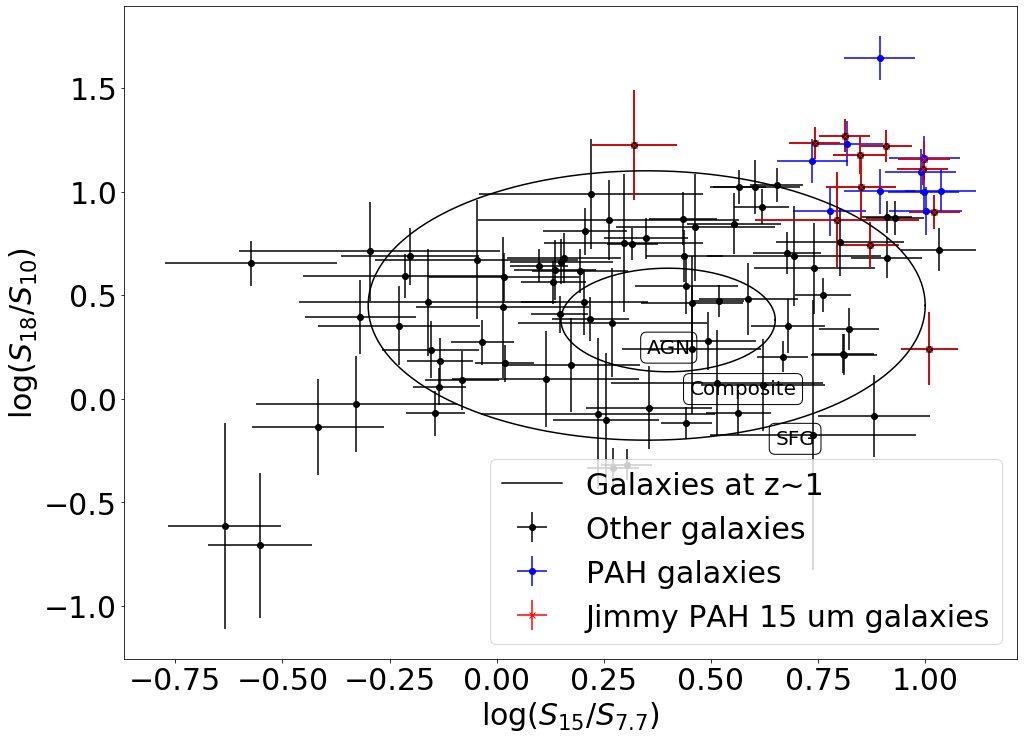

In [93]:
ceers['F10_F7']=np.log10(ceers['jwst.miri.F1000W']/ceers['jwst.miri.F770W'])
ceers['F15_F10']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F1000W'])
ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F15_F10_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))

ceers['F15_F7']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F770W'len(pah)
x_pah_err=[ceers['F15_F7_err'].loc[index[i]] for i in range(len(index))]
y_pah_err=[ceers['F18_F10_err'].loc[index[i]] for i in range(len(index))]

# x_all=ceers['F15_F7'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all=ceers['F18_F10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F15_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all_err=ceers['F18_F10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]


x_all=np.log10(obs['F15_F7'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
y_all=np.log10(obs['F18_F10'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
x_all_err=obs['F15_F7_err'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F15_F7'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/np.log(10)
y_all_err=obs['F18_F10_err'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F18_F10'][(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/np.log(10)




plt.figure(figsize=(16,12))
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 0.25
 
inx = radius * np.cos( theta )+0.4
iny = radius * np.sin( theta )+0.38

radius = 0.65 
outx = radius * np.cos( theta )+0.35
outy = radius * np.sin( theta )+0.45
 
plt.plot( inx, iny,c='black',label='Galaxies at z~1')z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)

plt.plot( outx, outy,c='black')




plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='black',label='Other galaxies')
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='b',label='PAH galaxies')
plt.errorbar(np.log10(obs['F15_F7'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]),
np.log10(obs['F18_F10'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]),
xerr=obs['F15_F7_err'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]/obs['F15_F7'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]/np.log(10),
yerr=obs['F18_F10_err'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]/obs['F18_F10'][cr_pah15&(obs['jwst.miri.F770W_err']>0)&(obs['jwst.miri.F1800W_err']>0)]/np.log(10),
fmt='x',color='r',label='Jimmy PAH 15 um galaxies')
plt.legend(fontsize=30)
# plt.axvline(0.75,c='r',ls='--')
# plt.axhline(0.8,c='r',ls='--')
# plt.xlabel('log(F10/F7.7)',fontsize=30)
# plt.ylabel('log(F15/F10)',fontsize=30)
plt.xlabel('log($S_{15}/S_{7.7}$)',fontsize=30)
plt.ylabel('log($S_{18}/S_{10}$)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
font = {'color':  'black',
        'size': 20
        }
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(0.35,0.22,'AGN', fontdict=font , bbox=box)
plt.text(0.45,0.02,'Composite', fontdict=font , bbox=box)
plt.text(0.65,-0.22,'SFG', fontdict=font , bbox=box)

# plt.savefig('CEERS_ccplot.eps',format='eps')z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)

plt.savefig('CEERS_ccplot_18_7_0911.png')

/home/leolin/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


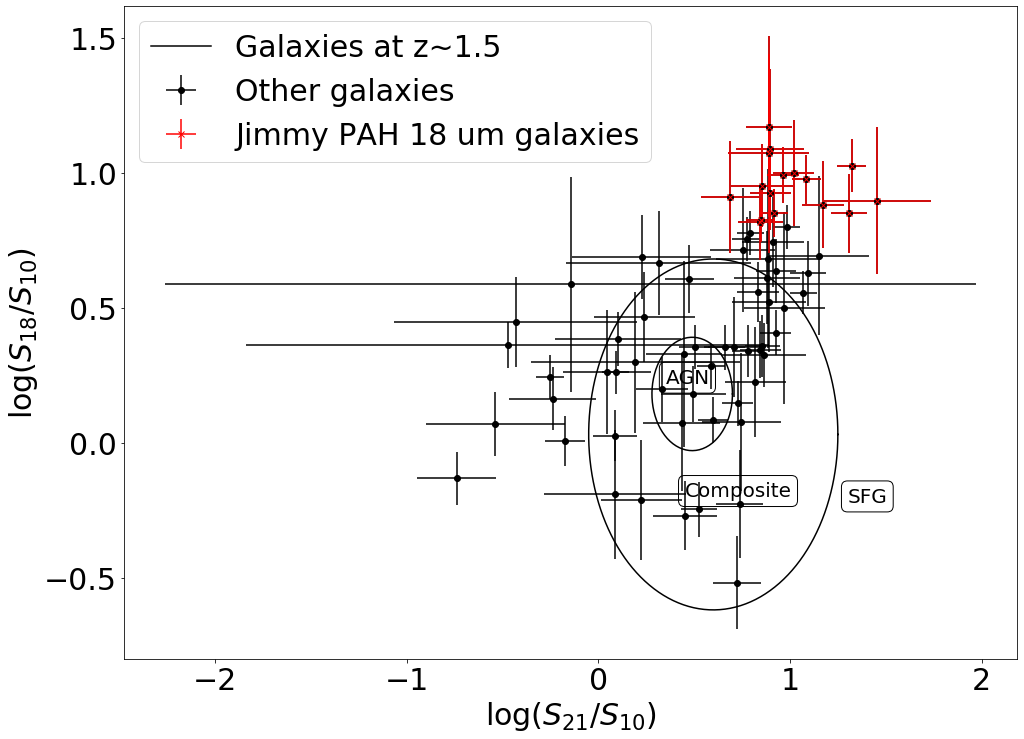

In [94]:

cr=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)

x_all=np.log10(obs['F21_F10'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
y_all=np.log10(obs['F18_F12'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
x_all_err=obs['F21_F10_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F21_F10'][cr]/np.log(10)
y_all_err=obs['F18_F12_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F18_F12'][cr]/np.log(10)
z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)

cr=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)


plt.figure(figsize=(16,12))
theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 0.21
 
inx = radius * np.cos( theta )+0.49
iny = radius * np.sin( theta )+0.18

radius = 0.65 
outx = radius * np.cos( theta )+0.60
outy = radius * np.sin( theta )+0.03
 
plt.plot( inx, iny,c='black',label='Galaxies at z~1.5')
plt.plot( outx, outy,c='black')




plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='black',label='Other galaxies')
# plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='b',label='PAH galaxies')
plt.errorbar(np.log10(obs['F21_F10'][cr_pah18&cr]),
np.log10(obs['F18_F12'][cr_pah18&cr]),
xerr=obs['F21_F10_err'][cr_pah18&cr]/obs['F21_F10'][cr_pah18&cr]/np.log(10),
yerr=obs['F18_F12_err'][cr_pah18&cr]/obs['F18_F12'][cr_pah18&cr]/np.log(10),
fmt='x',color='r',label='Jimmy PAH 18 um galaxies')
plt.legend(fontsize=30)
# plt.axvline(0.75,c='r',ls='--')
# plt.axhline(0.8,c='r',ls='--')
# plt.xlabel('log(F10/F7.7)',fontsize=30)
# plt.ylabel('log(F15/F10)',fontsize=30)
plt.xlabel('log($S_{21}/S_{10}$)',fontsize=30)
plt.ylabel('log($S_{18}/S_{10}$)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
font = {'color':  'black',
        'size': 20
        }
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(0.35,0.22,'AGN', fontdict=font , bbox=box)
plt.text(0.45,-0.2,'Composite', fontdict=font , bbox=box)
plt.text(1.3,-0.22,'SFG', fontdict=font , bbox=box)

# plt.savefig('CEERS_ccplot.eps',format='eps')
plt.savefig('CEERS_ccplot_21_10_0911.png')

/home/leolin/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


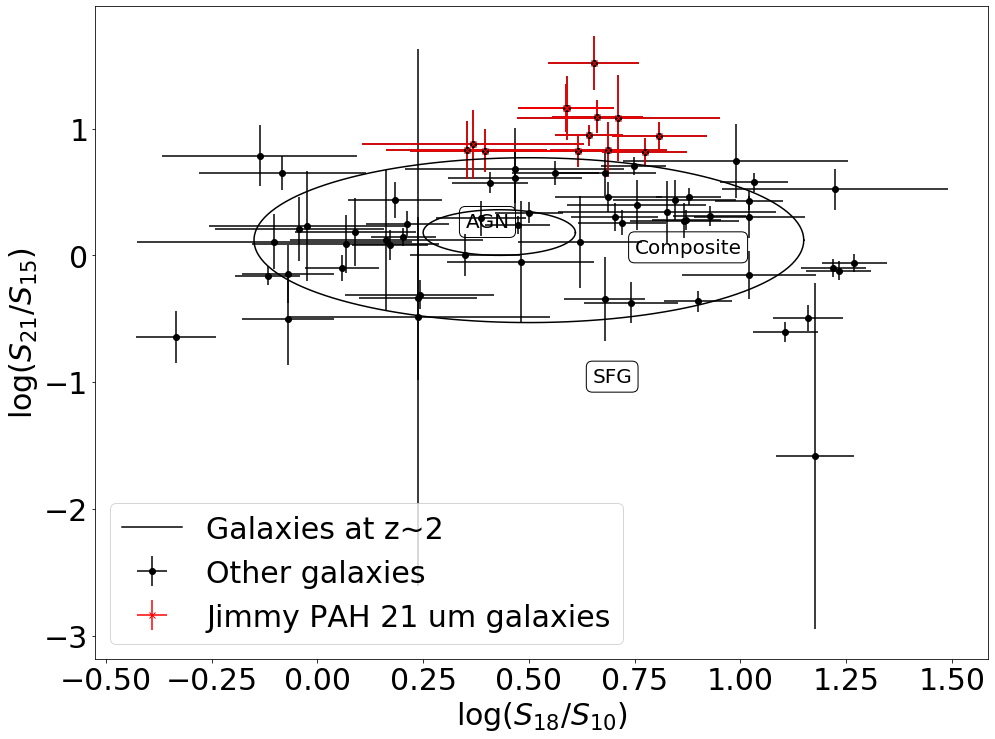

In [95]:

cr=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)

x_all=np.log10(obs['F18_F10'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
y_all=np.log10(obs['F21_F15'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)])
x_all_err=obs['F18_F10_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F18_F10'][cr]/np.log(10)
y_all_err=obs['F21_F15_err'][(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)]/obs['F21_F15'][cr]/np.log(10)

# cr=(obs['jwst.miri.F2100W_err']>0)&(obs['jwst.miri.F1280W_err']>0)&(obs['jwst.miri.F1800W_err']>0)&(obs['jwst.miri.F1500W_err']>0)&(obs['jwst.miri.F1000W_err']>0)&(obs['jwst.miri.F770W_err']>0)

len(pah)
plt.legend(fontsize=30)
# plt.axvline(0.75,c='r',ls='--')
# plt.axhline(0.8,c='r',ls='--')
# plt.xlabel('log(F10/F7.7)',fontsize=30)
# plt.ylabel('log(F15/F10)',fontsize=30)z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)

plt.xlabel('log($S_{18}/S_{10}$)',fontsize=30)
plt.ylabel('log($S_{21}/S_{15}$)',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
font = {'color':  'black',
        'size': 20
        }
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(0.35,0.22,'AGN', fontdict=font , bbox=box)
plt.text(0.75,0.02,'Composite', fontdict=font , bbox=box)
plt.text(0.65,-1,'SFG', fontdict=font , bbox=box)

# plt.savefig('CEERS_ccplot.eps',format='eps')
plt.savefig('CEERS_ccplot_21_15_0911.png')

In [96]:
obs[['id','jwst.miri.F770W','jwst.miri.F770W_err','jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1280W','jwst.miri.F1280W_err',
'jwst.miri.F1500W','jwst.miri.F1500W_err','jwst.miri.F1800W','jwst.miri.F1800W_err','jwst.miri.F2100W','jwst.miri.F2100W_err','F15_F10']][cr_pah15]

id  jwst.miri.F770W  \
52   CANDELS_EGS_F160W_J142040.3+530306.6         0.014205   
55   CANDELS_EGS_F160W_J142037.9+530249.5         0.002039   
57   CANDELS_EGS_F160W_J142038.3+530254.9         0.026258   
61   CANDELS_EGS_F160W_J142038.5+530306.1         0.008962   
100  CANDELS_EGS_F160W_J142039.1+530351.7         0.010700   
121  CANDELS_EGS_F160W_J142034.8+530329.6         0.020107   
128  CANDELS_EGS_F160W_J142033.6+530323.4         0.004905   
167  CANDELS_EGS_F160W_J142022.8+525859.5         0.022391   
170  CANDELS_EGS_F160W_J142018.2+525825.4         0.014691   
177  CANDELS_EGS_F160W_J142018.5+525836.6         0.000477   
180  CANDELS_EGS_F160W_J142022.4+525918.1         0.000783   
197  CANDELS_EGS_F160W_J142020.3+525925.1         0.005455   
203  CANDELS_EGS_F160W_J142016.5+525859.9         0.004560   
237  CANDELS_EGS_F160W_J142016.7+525944.2         0.002481   
298  CANDELS_EGS_F160W_J141901.8+525009.7       -99.000000   
317  CANDELS_EGS_F160W_J141902.5+524950.0       -99.000000   
319  CANDELS_EGS_F160W_J141900.0+524923.4       -99.000000   
333  CANDELS_EGS_F160W_J141902.9+524903.7       -99.000000   
346  CANDELS_EGS_F160W_J141904.7+524854.7       -99.000000   
347  CANDELS_EGS_F160W_J141906.5+524910.4       -99.000000   
422  CANDELS_EGS_F160W_J141915.3+524922.0       -99.000000   
438  CANDELS_EGS_F160W_J141918.3+524928.8       -99.000000   
472  CANDELS_EGS_F160W_J141919.3+524847.8       -99.000000   
484  CANDELS_EGS_F160W_J141921.9+524839.3       -99.000000   
503  CANDELS_EGS_F160W_J141925.1+524851.1       -99.000000   
507  CANDELS_EGS_F160W_J141925.0+524836.3       -99.000000   
508  CANDELS_EGS_F160W_J141925.5+524838.5       -99.000000   

     jwst.miri.F770W_err  jwst.miri.F1000W  jwst.miri.F1000W_err  \
52              0.001270          0.012135              0.001399   
55              0.000285          0.001388              0.000404   
57              0.002287          0.020266              0.002172   
61              0.000821          0.006230              0.000766   
100             0.000958          0.012856              0.001431   
121             0.001761          0.020743              0.002223   
128             0.000542          0.004641              0.000696   
167             0.001963          0.015687              0.001704   
170             0.001295          0.011837              0.001307   
177             0.000163          0.000874              0.000243   
180             0.000260          0.000770              0.000204   
197             0.000530          0.002964              0.000447   
203             0.000518          0.004576              0.000761   
237             0.000346          0.000601              0.000332   
298           -99.370367          0.000460              0.000300   
317           -99.370367          0.026121              0.002805   
319           -99.370367          0.004584              0.000787   
333           -99.370367          0.002645              0.000617   
346           -99.370367          0.000666              0.000334   
347           -99.370367          0.001883              0.000510   
422           -99.370367          0.006326              0.000957   
438           -99.370367          0.003014              0.000663   
472           -99.370367          0.003028              0.000666   
484           -99.370367          0.020680              0.002335   
503           -99.370367          0.001842              0.000354   
507           -99.370367          0.011306              0.001354   
508           -99.370367          0.010294              0.001248   

     jwst.miri.F1280W  jwst.miri.F1280W_err  jwst.miri.F1500W  \
52           0.069104              0.008459          0.149200   
55           0.006888              0.001118          0.014427   
57           0.114678              0.013971          0.258948   
61           0.039917              0.004933          0.088852   
100          0.030510              0.003834          0.096117   
121    

In [116]:

redshift=data['best.universe.redshift'].iloc[pah]
sfr=data['bayes.sfh.sfr'].iloc[pah]
sfr_err=data['bayes.sfh.sfr_err'].iloc[pah]
M_star=data['bayes.stellar.m_star'].iloc[pah]
M_star_err=data['bayes.stellar.m_star_err'].iloc[pah]

# print(len(obs[pah]))

redshift15=data['best.universe.redshift'].iloc[pah15]
sfr15=data['bayes.sfh.sfr'].iloc[pah15]
sfr15_err=data['bayes.sfh.sfr_err'].iloc[pah15]
M_star15=data['bayes.stellar.m_star'].iloc[pah15]
M_star15_err=data['bayes.stellar.m_star_err'].iloc[pah15]

redshift18=data['best.universe.redshift'].iloc[pah18]
sfr18=data['bayes.sfh.sfr'].iloc[pah18]
sfr18_err=data['bayes.sfh.sfr_err'].iloc[pah18]
M_star18=data['bayes.stellar.m_star'].iloc[pah18]
M_star18_err=data['bayes.stellar.m_star_err'].iloc[pah18]


redshift21=data['best.universe.redshift'].iloc[pah21]
sfr21=data['bayes.sfh.sfr'].iloc[pah21]
sfr21_err=data['bayes.sfh.sfr_err'].iloc[pah21]
M_star21=data['bayes.stellar.m_star'].iloc[pah21]
M_star21_err=data['bayes.stellar.m_star_err'].iloc[pah21]

print(len(redshift),len(sfr),len(M_star))


62 62 62


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

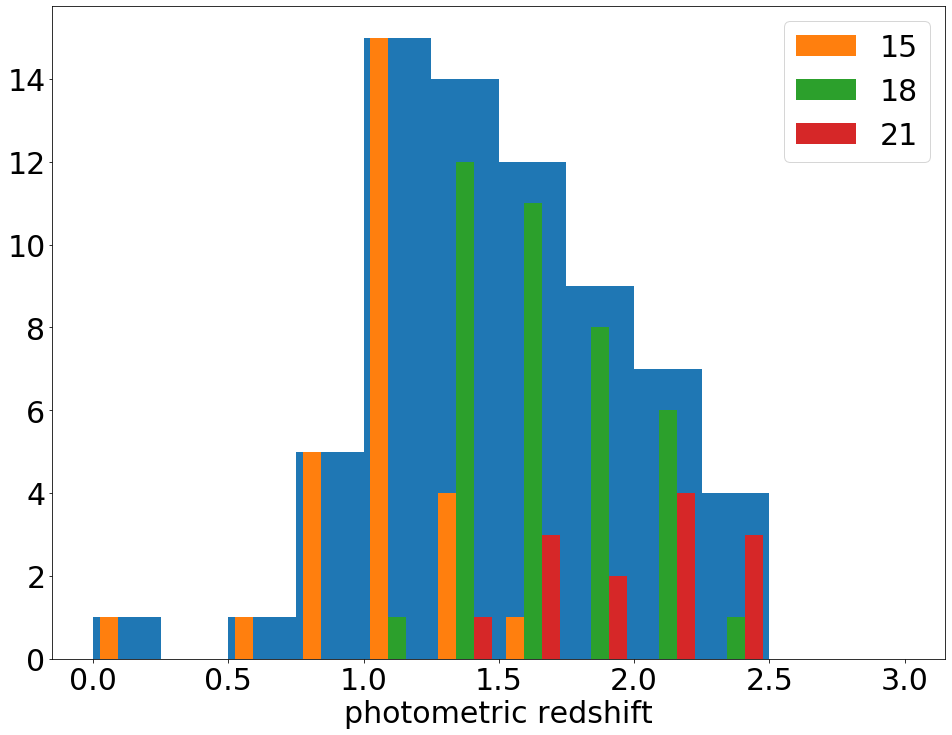

In [114]:
plt.figure(figsize=(16,12))
bin=np.linspace(0,3,13)
plt.hist(x=redshift,bins=bin)
plt.hist([redshift15,redshift18,redshift21],bins=bin,label=['15','18','21'])
# plt.hist(x=redshift_15,color='blue')
# plt.hist(x=redshift_18,color='yellow')
# plt.hist(x=redshift_21,color='red')
plt.legend(fontsize=30)
plt.xlabel('photometric redshift',fontsize=30)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.savefig('jimmy_redsfhit_distribution_0914.jpg')

In [118]:
sed0to3[cr_pah15&cr_pah21]['best.universe.redshift']

Series([], Name: best.universe.redshift, dtype: float64)

In [119]:
sed0to3[cr_pah21&cr_pah18]['best.universe.redshift']

38     2.02
46     1.73
58     2.04
76     2.05
220    1.79
252    1.72
253    1.46
Name: best.universe.redshift, dtype: float64

In [117]:
sed0to3[cr_pah15&cr_pah18]['best.universe.redshift']

170    1.27
237    1.57
319    1.29
484    1.15
Name: best.universe.redshift, dtype: float64

In [201]:
print(sed0to3['best.universe.redshift'][cr_pah]==1.75)

13     False
14     False
32      True
38     False
41     False
       ...  
501    False
503    False
506     True
507    False
508    False
Name: best.universe.redshift, Length: 69, dtype: bool


In [203]:
len(sed0to3['id'][cr_pah&z1]),len(sed0to3['id'][cr_pah&z15]),len(sed0to3['id'][cr_pah&z2]),len(sed0to3['id'][cr_pah])

(21, 31, 15, 69)

In [50]:
sed0to3['best.universe.redshift'][cr_pah&z2]

38     2.02
41     2.03
46     1.73
58     2.04
76     2.05
89     1.76
138    2.39
220    1.79
253    1.46
258    2.48
271    2.36
303    1.84
432    2.14
433    2.36
Name: best.universe.redshift, dtype: float64

In [51]:
nep=pd.read_csv('/home/leolin/Desktop/MIRI_SED/NEP_SPIRE_mspec_lums.csv',index_col=0)
print(nep.columns)
print(nep[['zspec','LIR','SFR','Mstar']].iloc[242:250])
nep_sfr=nep['SFR'].iloc[242:248]
nep_esfr=nep['eSFR'].iloc[242:248]
nep_mass=nep['Mstar'].iloc[242:248]
nep_emass=nep['eMstar'].iloc[242:248]

Index(['zspec', 'idnum', 'spec_id_name', 'R.A.', 'Dec.', 'flg', 'field', 'fn',
       'class', 'OII3727', 'hbeta', 'oIII4959', 'oIII5007', 'oI6300',
       'nII6548', 'halpha', 'nII6584', 'sII6716', 'sII6731', 'loglir', 'smpid',
       'L08', 'eL08', 'L12', 'eL12', 'L250', 'eL250', 'L350', 'eL350', 'LIR',
       'dLIR', 'Ldust', 'eLdst', 'SFR', 'eSFR', 'Mstar', 'eMstar', 'Mdust',
       'eMdust', 'fmuSFH', 'efmuSFH', 'fmuIR', 'efmuIR', 'Tc', 'eTc', 'Tw',
       'eTw'],
      dtype='object')
      zspec    LIR     SFR  Mstar
n                                
243  0.7510  11.67   38.88  10.90
244  0.7721  11.52   22.88  10.97
245  0.8166  12.11  132.40  10.93
246  0.8173  11.59   38.91  10.58
247  0.8437  11.84   53.98  10.63
248  0.8558  11.93   81.79  10.79


In [115]:
sed0925['bayes.stellar.m_star']

0      4.527365e+10
1      3.398621e+09
2      2.516207e+09
3      2.654116e+09
4      1.866660e+09
           ...     
568    3.547791e+10
569    3.447542e+10
570    2.218209e+10
571    1.790928e+10
572    7.635293e+09
Name: bayes.stellar.m_star, Length: 573, dtype: float64

In [117]:

def calculate_Mass(sed, cr_pah, redshift):
    Mass=np.log10(sed['bayes.stellar.m_star'].iloc[cr_pah])
    Mass_err=(np.log10(sed['bayes.stellar.m_star'].iloc[cr_pah]+sed['bayes.stellar.m_star_err'].iloc[cr_pah])-np.log10(sed['bayes.stellar.m_star'].iloc[cr_pah]))

    return Mass,Mass_err

##########################################################################################################################################

M15, M15_err= calculate_Mass(sed0925,pah15,z1)
M18, M18_err= calculate_Mass(sed0925,pah18,z15)
M21, M21_err= calculate_Mass(sed0925,pah21,z2)

s15=np.log10(sfr15)
s15_err=np.log10(sfr15+sfr15_err)-np.log10(sfr15)

s18=np.log10(sfr18)
s18_err=np.log10(sfr18+sfr18_err)-np.log10(sfr18)

s21=np.log10(sfr21)
s21_err=np.log10(sfr21+sfr21_err)-np.log10(sfr21)

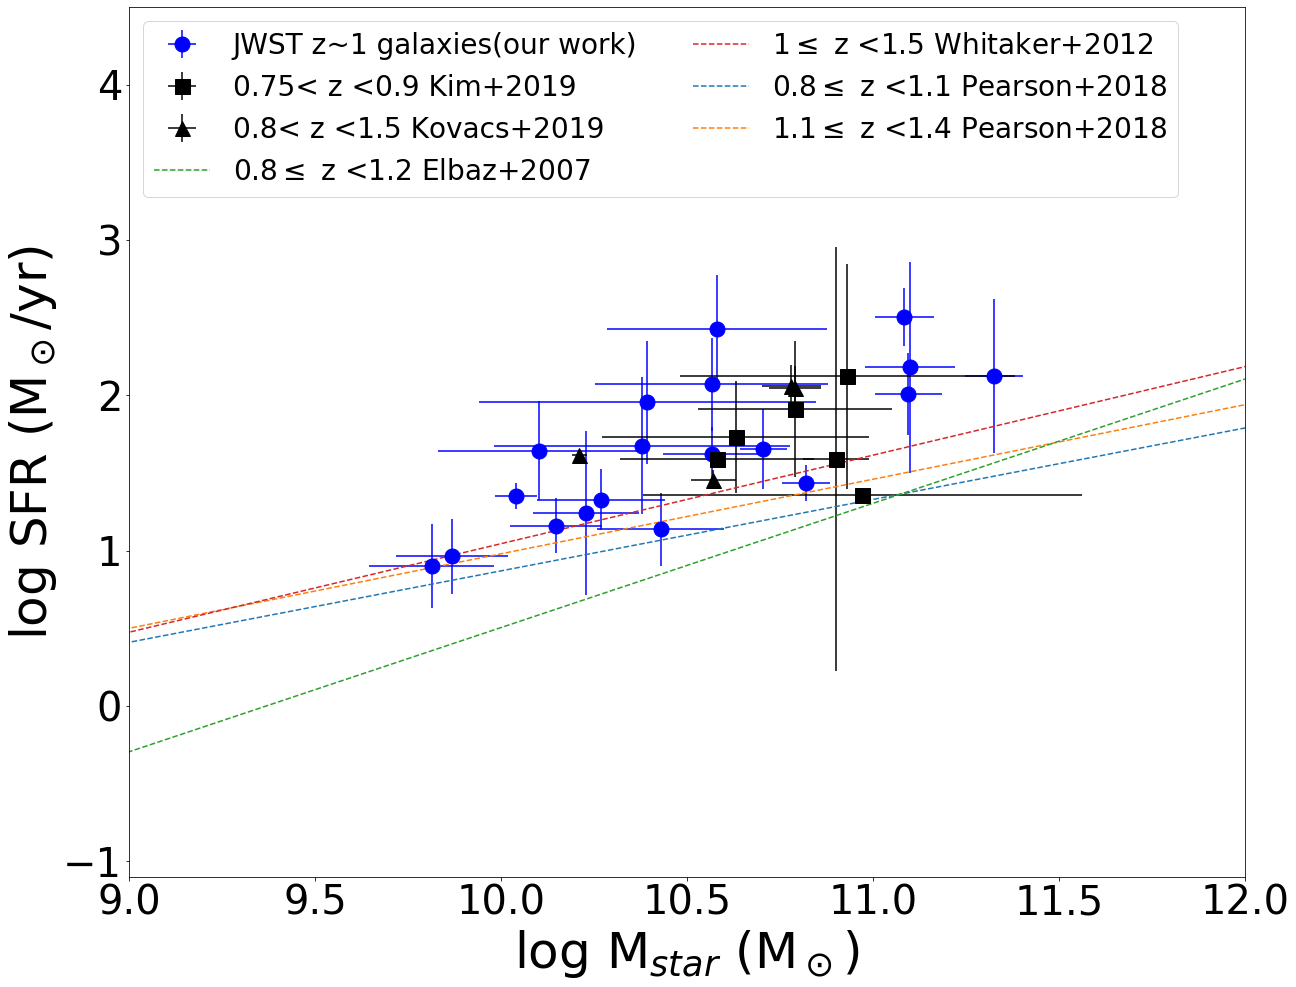

In [137]:
m0=0.5
a0=1.5
a1=0.3
m1=0.36
a2=2.5

M=sedceers_2['bayes.stellar.m_star'].iloc[good_fit].values
z=sedceers_2['best.universe.redshift'].iloc[good_fit].values

r=np.log10(1+z)
m=np.log10(M)-9
# print(np.max([0,m-m1-(a2*r)]))
SFR_MS=np.array([m[i]-m0+(a0*r[i])-a1*((np.max([0,m[i]-m1-(a2*r[i])])**2)) for i in range(len(M))])
# print(SFR_MS)

z=1

alpha=0.70-0.13*z
beta=0.38+1.14*z-0.19*z**2


x=M
y=sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values

x0=np.linspace(8.5,12,1000)
y0=0.46*(x0-10.5)+1.10
y1=0.48*(x0-10.5)+1.22

y2=0.8*(x0-10)+np.log10(3.2)

y3=alpha*(x0-10.5)+beta

x_err=sedceers_2['bayes.stellar.m_star_err'].iloc[good_fit].values/M
y_err=sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit].values/sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values/np.log(10)



plt.figure(figsize=(20,16))

# plt.errorbar(np.log10(M_star),np.log10(sfr),xerr=[M_star_err[i]/M_star[i]/np.log(10) for i in range(len(M_star))],yerr=[sfr_err[i]/sfr[i]/np.log(10) for i in range(len(sfr))],
# fmt='o',color='green',label='new catalog')
plt.errorbar(M15,s15,xerr=M15_err,yerr=s15_err,
fmt='o',markersize=15,color='blue',label='JWST z~1 galaxies(our work)')
# plt.errorbar(np.log10(M_star_18),np.log10(sfr_18),xerr=[M_star_18_err[i]/M_star_18[i]/np.log(10) for i in range(len(M_star_18))],yerr=[sfr_18_err[i]/sfr_18[i]/np.log(10) for i in range(len(sfr_18))],
# fmt='^',markersize=15,color='green',label='new catalog_18')
# plt.errorbar(np.log10(M_star_21),np.log10(sfr_21),xerr=[M_star_21_err[i]/M_star_21[i]/np.log(10) for i in range(len(M_star_21))],yerr=[sfr_21_err[i]/sfr_21[i]/np.log(10) for i in range(len(sfr_21))],
# fmt='^',markersize=15,color='red',label='new catalog_21')
##########################################################################################
nep=pd.read_csv('/home/leolin/Desktop/MIRI_SED/NEP_SPIRE_mspec_lums.csv',index_col=0)
# print(nep.columns)
# print(nep[['zspec','LIR','SFR','Mstar']].iloc[242:250])
nep_sfr=nep['SFR'].iloc[242:248]
nep_esfr=nep['eSFR'].iloc[242:248]
nep_mass=nep['Mstar'].iloc[242:248]
nep_emass=nep['eMstar'].iloc[242:248]
########################################################################################
am=[10.79,10.78,10.57,10.21]
amerr=[0.07,0.08,0.06,0.02]
asfr=[111.38,115.46,28.64,41.19]
asfrerr=[35.63,35.12,4.01,2.09]
##########################################################################################

plt.errorbar(nep_mass,np.log10(nep_sfr),xerr=nep_emass,yerr=nep_esfr/nep_sfr,fmt='s',markersize=15,color='black',label='0.75< z <0.9 Kim+2019')
plt.errorbar(am,np.log10(asfr),xerr=amerr,yerr=[asfrerr[i]/asfr[i]/np.log(10) for i in range(len(asfr))],fmt='^',markersize=15,color='black',label='0.8< z <1.5 Kovacs+2019')
# plt.errorbar(np.log10(x),np.log10(y),xerr=x_err,yerr=y_err,fmt='o',markersize=15,color='r',label='Our work')
plt.plot(x0,y0,'--',label='0.8$\leq$ z <1.1 Pearson+2018')
plt.plot(x0,y1,'--',label='1.1$\leq$ z <1.4 Pearson+2018')

plt.plot(x0,y2,'--',label='0.8$\leq$ z <1.2 Elbaz+2007')

plt.plot(x0,y3,'--',label='1$\leq$ z <1.5 Whitaker+2012')


plt.xlabel('log M$_{star}$ (M$_\odot$)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=25,loc=2)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# plt.text(x00-0.85,y00,text1,fontsize=30)
# plt.text(x11-0.65,y11+0.15,text2,fontsize=30)
plt.xlim([9,12])
plt.ylim([-1.1,4.5])
handles, labels = plt.gca().get_legend_handles_labels() 
order = [4,5,6,2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2,fontsize=28,loc=2)
plt.savefig('Mass_vs_SFR (main sequence)_z1_0116.png')
# plt.legend(fontsize=30)
# plt.axis('equal')
# plt.savefig('Mass_vs_SFR (main sequence)_jimmy0619.png')
# plt.savefig('Mass_vs_SFR (main sequence).png')

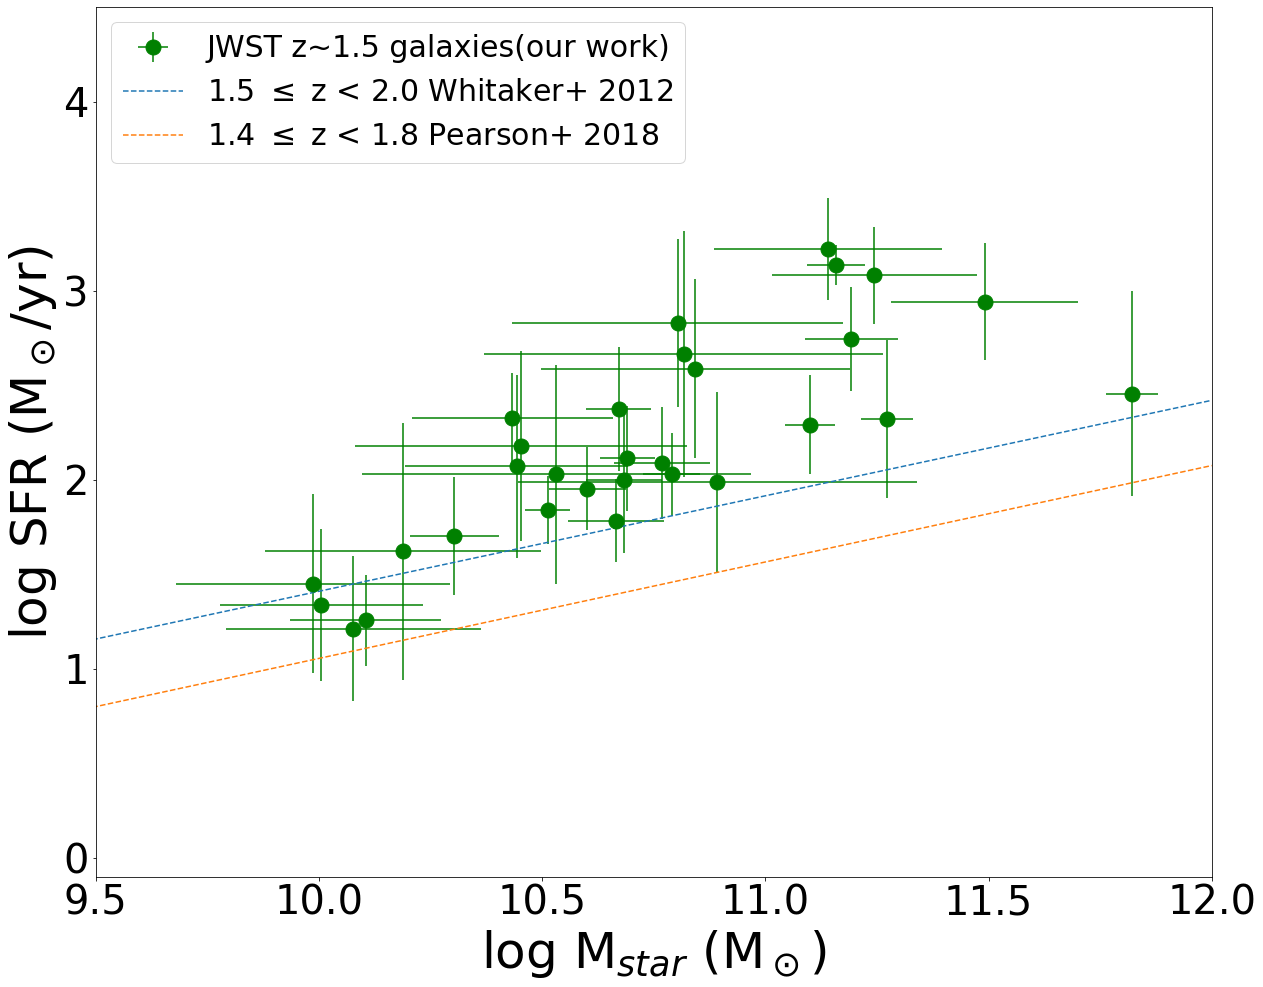

In [149]:
m0=0.5
a0=1.5
a1=0.3
m1=0.36
a2=2.5

M=sedceers_2['bayes.stellar.m_star'].iloc[good_fit].values
z=sedceers_2['best.universe.redshift'].iloc[good_fit].values

r=np.log10(1+z)
m=np.log10(M)-9
# print(np.max([0,m-m1-(a2*r)]))
SFR_MS=np.array([m[i]-m0+(a0*r[i])-a1*((np.max([0,m[i]-m1-(a2*r[i])])**2)) for i in range(len(M))])
# print(SFR_MS)

###########################################
z=1     #Whitaker+2012 MS
z=1.5
alpha=0.70-0.13*z
beta=0.38+1.14*z-0.19*z**2
##########################################

x=M
y=sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values

x0=np.linspace(8.5,12,1000)
y0=0.46*(x0-10.5)+1.10
y1=0.48*(x0-10.5)+1.22

y2=0.8*(x0-10)+np.log10(3.2)

y3=alpha*(x0-10.5)+beta


y4=alpha*(x0-10.5)+beta
y5=0.51*(x0-10.5)+1.31

x_err=sedceers_2['bayes.stellar.m_star_err'].iloc[good_fit].values/M
y_err=sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit].values/sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values/np.log(10)



plt.figure(figsize=(20,16))

# plt.errorbar(np.log10(M_star),np.log10(sfr),xerr=[M_star_err[i]/M_star[i]/np.log(10) for i in range(len(M_star))],yerr=[sfr_err[i]/sfr[i]/np.log(10) for i in range(len(sfr))],
# fmt='o',color='green',label='new catalog')
# plt.errorbar(M15,s15,xerr=M15_err,yerr=s15_err,
# fmt='o',markersize=15,color='blue',label='JWST z~1 galaxies(our work)')
plt.errorbar(M18,s18,xerr=M18_err,yerr=s18_err,
fmt='o',markersize=15,color='green',label='JWST z~1.5 galaxies(our work)')

##########################################################################################
nep=pd.read_csv('/home/leolin/Desktop/MIRI_SED/NEP_SPIRE_mspec_lums.csv',index_col=0)
# print(nep.columns)
# print(nep[['zspec','LIR','SFR','Mstar']].iloc[242:250])
nep_sfr=nep['SFR'].iloc[242:248]
nep_esfr=nep['eSFR'].iloc[242:248]
nep_mass=nep['Mstar'].iloc[242:248]
nep_emass=nep['eMstar'].iloc[242:248]
########################################################################################
am=[10.79,10.78,10.57,10.21]
amerr=[0.07,0.08,0.06,0.02]
asfr=[111.38,115.46,28.64,41.19]
asfrerr=[35.63,35.12,4.01,2.09]
##########################################################################################

# plt.errorbar(nep_mass,np.log10(nep_sfr),xerr=nep_emass,yerr=nep_esfr/nep_sfr,fmt='s',markersize=15,color='black',label='0.75< z <0.9 Kim+2019')
# plt.errorbar(am,np.log10(asfr),xerr=amerr,yerr=[asfrerr[i]/asfr[i]/np.log(10) for i in range(len(asfr))],fmt='^',markersize=15,color='black',label='0.8< z <1.5 Kovacs+2019')
# plt.errorbar(np.log10(x),np.log10(y),xerr=x_err,yerr=y_err,fmt='o',markersize=15,color='r',label='Our work')
# plt.plot(x0,y0,'--',label='0.8$\leq$ z <1.1 Pearson+2018')
# plt.plot(x0,y1,'--',label='1.1$\leq$ z <1.4 Pearson+2018')
# plt.plot(x0,y2,'--',label='0.8$\leq$ z <1.2 Elbaz+2007')
# plt.plot(x0,y3,'--',label='1$\leq$ z <1.5 Whitaker+2012')

plt.plot(x0,y4,'--',label='1.5 $\leq$ z < 2.0 Whitaker+ 2012')
plt.plot(x0,y5,'--',label='1.4 $\leq$ z < 1.8 Pearson+ 2018')

plt.xlabel('log M$_{star}$ (M$_\odot$)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=25,loc=2)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# plt.text(x00-0.85,y00,text1,fontsize=30)
# plt.text(x11-0.65,y11+0.15,text2,fontsize=30)
plt.xlim([9.5,12])
plt.ylim([-0.1,4.5])
handles, labels = plt.gca().get_legend_handles_labels() 
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=30,loc=2)
plt.savefig('Mass_vs_SFR (main sequence)_z15_0116.png')
# plt.legend(fontsize=30)
# plt.axis('equal')
# plt.savefig('Mass_vs_SFR (main sequence)_jimmy0619.png')
# plt.savefig('Mass_vs_SFR (main sequence).png')

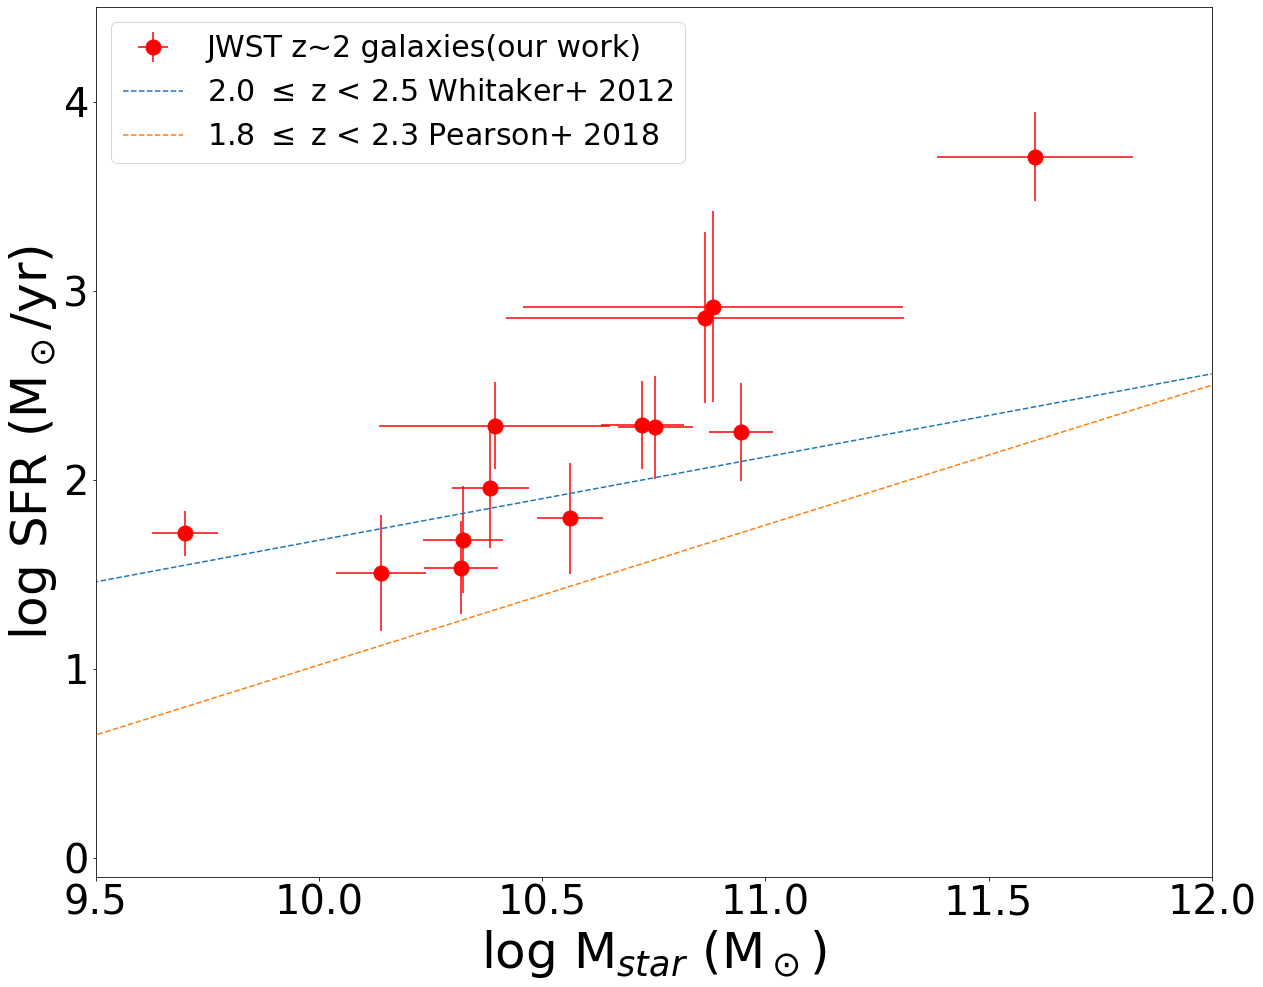

In [148]:
m0=0.5
a0=1.5
a1=0.3
m1=0.36
a2=2.5

M=sedceers_2['bayes.stellar.m_star'].iloc[good_fit].values
z=sedceers_2['best.universe.redshift'].iloc[good_fit].values

r=np.log10(1+z)
m=np.log10(M)-9
# print(np.max([0,m-m1-(a2*r)]))
SFR_MS=np.array([m[i]-m0+(a0*r[i])-a1*((np.max([0,m[i]-m1-(a2*r[i])])**2)) for i in range(len(M))])
# print(SFR_MS)

###########################################
z=1     #Whitaker+2012 MS
z=1.5
z=2.0
alpha=0.70-0.13*z
beta=0.38+1.14*z-0.19*z**2
##########################################

x=M
y=sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values

x0=np.linspace(8.5,12,1000)
y0=0.46*(x0-10.5)+1.10
y1=0.48*(x0-10.5)+1.22

y2=0.8*(x0-10)+np.log10(3.2)

y3=alpha*(x0-10.5)+beta


y4=alpha*(x0-10.5)+beta
y5=0.51*(x0-10.5)+1.31

y6=alpha*(x0-10.5)+beta
y7=0.74*(x0-10.5)+1.39

x_err=sedceers_2['bayes.stellar.m_star_err'].iloc[good_fit].values/M
y_err=sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit].values/sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values/np.log(10)



plt.figure(figsize=(20,16))

# plt.errorbar(np.log10(M_star),np.log10(sfr),xerr=[M_star_err[i]/M_star[i]/np.log(10) for i in range(len(M_star))],yerr=[sfr_err[i]/sfr[i]/np.log(10) for i in range(len(sfr))],
# fmt='o',color='green',label='new catalog')
# plt.errorbar(M15,s15,xerr=M15_err,yerr=s15_err,
# fmt='o',markersize=15,color='blue',label='JWST z~1 galaxies(our work)')
# plt.errorbar(M18,s18,xerr=M18_err,yerr=s18_err,
# fmt='o',markersize=15,color='green',label='JWST z~1.5 galaxies(our work)')
plt.errorbar(M21,s21,xerr=M21_err,yerr=s21_err,
fmt='o',markersize=15,color='red',label='JWST z~2 galaxies(our work)')

##########################################################################################
nep=pd.read_csv('/home/leolin/Desktop/MIRI_SED/NEP_SPIRE_mspec_lums.csv',index_col=0)
# print(nep.columns)
# print(nep[['zspec','LIR','SFR','Mstar']].iloc[242:250])
nep_sfr=nep['SFR'].iloc[242:248]
nep_esfr=nep['eSFR'].iloc[242:248]
nep_mass=nep['Mstar'].iloc[242:248]
nep_emass=nep['eMstar'].iloc[242:248]
########################################################################################
am=[10.79,10.78,10.57,10.21]
amerr=[0.07,0.08,0.06,0.02]
asfr=[111.38,115.46,28.64,41.19]
asfrerr=[35.63,35.12,4.01,2.09]
##########################################################################################

# plt.errorbar(nep_mass,np.log10(nep_sfr),xerr=nep_emass,yerr=nep_esfr/nep_sfr,fmt='s',markersize=15,color='black',label='0.75< z <0.9 Kim+2019')
# plt.errorbar(am,np.log10(asfr),xerr=amerr,yerr=[asfrerr[i]/asfr[i]/np.log(10) for i in range(len(asfr))],fmt='^',markersize=15,color='black',label='0.8< z <1.5 Kovacs+2019')
# plt.errorbar(np.log10(x),np.log10(y),xerr=x_err,yerr=y_err,fmt='o',markersize=15,color='r',label='Our work')
# plt.plot(x0,y0,'--',label='0.8$\leq$ z <1.1 Pearson+2018')
# plt.plot(x0,y1,'--',label='1.1$\leq$ z <1.4 Pearson+2018')
# plt.plot(x0,y2,'--',label='0.8$\leq$ z <1.2 Elbaz+2007')
# plt.plot(x0,y3,'--',label='1$\leq$ z <1.5 Whitaker+2012')

# plt.plot(x0,y4,'--',label='1.5 $\leq$ z < 2.0 Whitaker+ 2012')
# plt.plot(x0,y5,'--',label='1.4 $\leq$ z < 1.8 Pearson+ 2018')

plt.plot(x0,y6,'--',label='2.0 $\leq$ z < 2.5 Whitaker+ 2012')
plt.plot(x0,y7,'--',label='1.8 $\leq$ z < 2.3 Pearson+ 2018')

plt.xlabel('log M$_{star}$ (M$_\odot$)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=25,loc=2)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# plt.text(x00-0.85,y00,text1,fontsize=30)
# plt.text(x11-0.65,y11+0.15,text2,fontsize=30)
plt.xlim([9.5,12])
plt.ylim([-0.1,4.5])
handles, labels = plt.gca().get_legend_handles_labels() 
order = [2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=30,loc=2)
plt.savefig('Mass_vs_SFR (main sequence)_z2_0116.png')
# plt.legend(fontsize=30)
# plt.axis('equal')
# plt.savefig('Mass_vs_SFR (main sequence)_jimmy0619.png')
# plt.savefig('Mass_vs_SFR (main sequence).png')

In [176]:
DL15=cosmo.luminosity_distance(sed0to3['best.universe.redshift'][cr_pah15].tolist())

pah_luminosity_pah15=[]
for i in range(len(sed0to3[cr_pah15])):
    # myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/{str(a)}_best_model.fits')
    myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah/'+sed0to3['id'][cr_pah15].iloc[i]+'_best_model.fits')
    data=myfile[1].data
    wl=data['wavelength']
    flux=data['Fnu']
    peak=[]
    for j,b in enumerate(wl):
        if (b > 10000) & (b<20000):
            peak.append(flux[j])
    # print(np.max(peak))
    fd=np.max(peak)
    print(fd)
    energy=fd*(10**-3)*(9*10**7)*(DL15[i].value**2)/7.7
    pah_luminosity_pah15.append(energy)
    z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)


0.29333468738175467
0.03309079546271844
0.5041204476566598
0.1607256844384498
0.21838888724097447
0.5540544191206858
0.07985160053983173
0.3982143067479382
0.3165697246516772
0.01698966529389112
0.009316891354896772
0.08625164783424967
0.06814504265438691
0.028579794428070092
0.007531924420384228
0.34855608184418796
0.1708022532802472
0.05627390713416127
0.005716654252765432
0.07861800277919696
0.06226796975574366
0.036258851342879705
0.05749738306347213
0.4639964824845514
0.07846610592593108
0.14590987281456108
0.3311687025349156
[168862401287.44064, 21856871011.274895, 332977658726.62976, 110957885005.905, 171359471548.07556, 500790078102.4795, 28887303269.28998, 367040513705.21625, 291787392845.27747, 132966466.37824897, 6862869612.823862, 58248793761.27599, 38311022145.70654, 44482266545.448784, 4234434553.55372, 169180803015.65756, 163635719187.8624, 35534336057.93568, 1896745551.2064376, 22428750854.112057, 18890810271.595425, 14261105420.026648, 47015225034.598076, 334536709603.

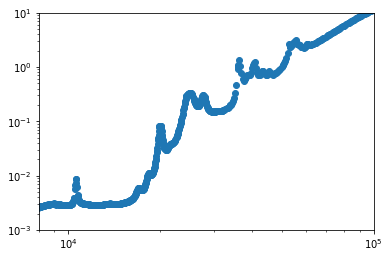

In [63]:
myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/z0to3/'+sed0to3['id'][cr_pah&z2].iloc[0]+'_best_model.fits')
data=myfile[1].data
wl=data['wavelength']
flux=data['Fnu']
    # peak=[]
    # for j,b in enumerate(wl):
    #     if (b > 15000) & (b<20000):
    #         peak.append(flux[j])
    # # print(np.max(peak))

# peak=np.max(flux[])
plt.scatter(wl,flux)
plt.xlim([8000,100000])
plt.ylim([0.001,10])
plt.yscale('log')
plt.xscale('log')z1=(sed0925['best.universe.redshift']>0.75)&(sed0925['best.universe.redshift']<=1.25)
z15=(sed0925['best.universe.redshift']>1.25)&(sed0925['best.universe.redshift']<=1.75)
z2=(sed0925['best.universe.redshift']>1.75)


Fixed Slope: 1.0
Intercept: -0.5929582946553577
Intercept Error: 0.05794462637046726


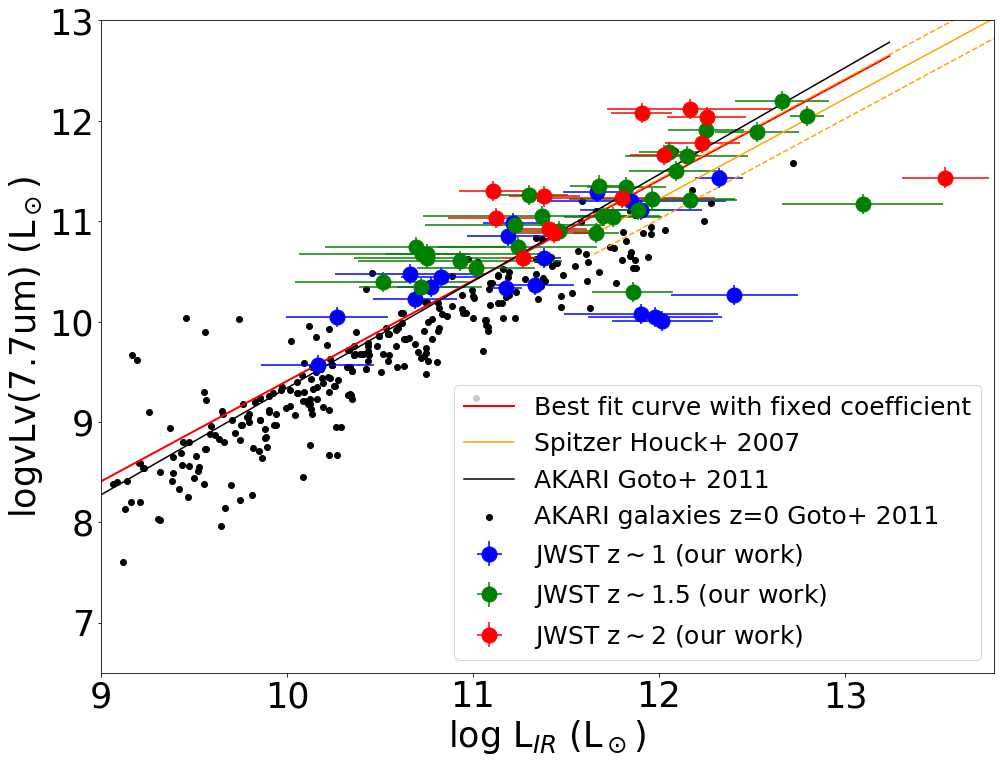

In [199]:

from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

##############################################################################

line=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/line.csv')
dash2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/dashline2.csv')
redpoint=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/redpoint.csv')

dash2=dash2.drop(0,axis=0)
tomo=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/Tomo_AKARI.csv')

# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0427_ceers17_qpah/results.txt')
# sedceers_dust=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0929_ceers16_qpah/results.txt')


# index=sedceers_2['id'][sedceers_2['best.reduced_chi_square']<6].values
# good_fit=[sedceers_2[sedceers_2['id']==i].index.values[0] for i in index]

DL=cosmo.luminosity_distance(sedceers_2['best.universe.redshift'].iloc[good_fit].tolist())



##########################################################################################################################################
x=[298,333,436,484,508,335,13,272,432]



data=sed0925
z1=(data['best.universe.redshift']>0.75)&(data['best.universe.redshift']<=1.25)
z15=(data['best.universe.redshift']>1.25)&(data['best.universe.redshift']<=1.75)
z2=(data['best.universe.redshift']>1.75)



##################################################################################################################################################

def calculate_pah_luminosity(sed, cr_pah, redshift, wl_range):
    pah_luminosity = []
    pah_lu_err = []
    DL=cosmo.luminosity_distance(sed['best.universe.redshift'].iloc[cr_pah].tolist())
    for i in range(len(sed.iloc[cr_pah])):
        model_file = fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_1012/' + sed['id'].iloc[cr_pah[i]] + '_best_model.fits')
        data = model_file[1].data
        wl = data['wavelength']
        flux = data['Fnu']

        peak = [flux[j] for j, b in enumerate(wl) if wl_range[0] < b < wl_range[1]]
        fd = np.max(peak)
        
        energy = fd * (10 ** -3) * (9 * 10 ** 7) * (DL[i].value ** 2) / 7.7
        # energy_cigale = fd * (10 ** -3) * (9 * 10 ** 7) * ((DL_cigale[i] * 3.24078e-23) ** 2) / 7.7

        pah_luminosity.append(energy)
        pah_lu_err.append(1 / 10)

    return pah_luminosity, pah_lu_err


def calculate_IR_luminosity(sed, cr_pah, redshift):
    IR_luminosity=np.log10(sed['best.dust.luminosity'].iloc[cr_pah]*2.613*10**-27)
    IR_luminosity_err=(np.log10(sed['bayes.dust.luminosity'].iloc[cr_pah]*2.613*10**-27+sed['bayes.dust.luminosity_err'].iloc[cr_pah]*2.613*10**-27)-np.log10(sed['bayes.dust.luminosity'].iloc[cr_pah]*2.613*10**-27))

    return IR_luminosity,IR_luminosity_err

##########################################################################################################################################

LIR15, LIR15_err= calculate_IR_luminosity(sed0925,pah15,z1)
LIR18, LIR18_err= calculate_IR_luminosity(sed0925,pah18,z15)
LIR21, LIR21_err= calculate_IR_luminosity(sed0925,pah21,z2)

L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])
L_pah18,L_pah18_err= calculate_pah_luminosity(sed0925,pah18,z15,[10000,20000])
L_pah21,L_pah21_err= calculate_pah_luminosity(sed0925,pah21,z2,[10000,30000])

plt.figure(figsize=(16,12))
plt.errorbar(LIR15,np.log10(L_pah15),yerr=L_pah15_err,xerr=LIR15_err,
fmt='o',markersize=15,label='JWST z$\sim$1 (our work)',color='blue')

plt.errorbar(LIR18,np.log10(L_pah18),yerr=L_pah18_err,xerr=LIR18_err,
fmt='o',markersize=15,label='JWST z$\sim$1.5 (our work)',color='green')

plt.errorbar(LIR21,np.log10(L_pah21),yerr=L_pah21_err,xerr=LIR21_err,
fmt='o',markersize=15,label='JWST z$\sim$2 (our work)',color='red')

x=np.linspace(9,14.3,1000)
y=x-0.78
# yfit=func1(popt, x)
print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)

plt.plot(x[:800],fixed_slope*x[:800]+intercept, 'r', lw=2, label='Best fit curve with fixed coefficient')
# plt.plot(x[:550],popt_cons[1]*x[:550]+popt_cons[0],'--',c='red',label='Best fit curve with fixed coefficient')
# plt.plot(x[:550],popt[1]*x[:550]+popt[0], 'r', lw=2, label='Best fit curve with free parameters')
plt.plot(x[500:],y[500:],color='orange',label='Spitzer Houck+ 2007')
plt.plot(x[500:],y[500:]+0.2,'--',color='orange')
plt.plot(x[500:],y[500:]-0.2,'--',color='orange')
plt.scatter(tomo['Point'],tomo['x'],c='black',label='AKARI galaxies z=0 Goto+ 2011')
plt.plot(x[:800],x[:800]/0.94-np.log10(20),c='black',label='AKARI Goto+ 2011')
# plt.ylim([0,4])
plt.legend(fontsize=25)
plt.xlabel('log L$_{IR}$ (L$_\odot$)',fontsize=35)
plt.ylabel('logvLv(7.7um) (L$_\odot$)',fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [9,8,7,6,5,4,1,0,2,3]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25)


plt.xlim([9,13.8])
plt.ylim(6.5,13)


# plt.savefig('Jimmy_LIR_to_Lpah_0914.png')
# plt.savefig('Jimmy_LIR_to_Lpah_1002.png')
# plt.savefig('Jimmy_LIR_to_Lpah_1003.png')
# plt.savefig('Jimmy_LIR_to_Lpah_1016.png')
plt.savefig('Jimmy_LIR_to_Lpah_0116.png')

In [175]:
len(x),len(y),len(noise_x),len(noise_y)

(62, 62, 62, 62)

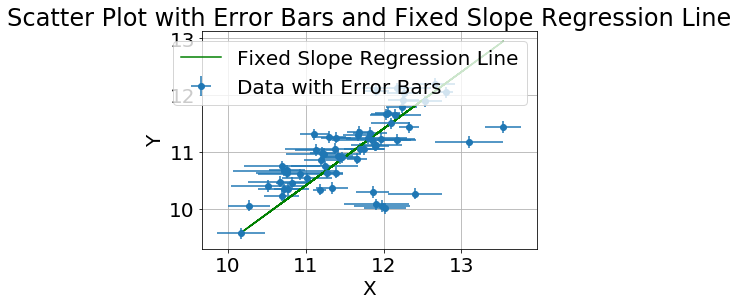

Fixed Slope: 1.0
Intercept: -0.5929582946553577
Intercept Error: 0.05794462637046726


In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

# Generating example data
x=pd.concat([LIR15,LIR18,LIR21],axis=0)
y=np.log10(L_pah15+L_pah18+L_pah21)
noise_x=pd.concat([LIR15_err,LIR18_err,LIR21_err],axis=0)
noise_y=L_pah15_err+L_pah18_err+L_pah21_err

x = np.array(x)
y = np.array(y)
x_error =  np.array(noise_x)
y_error = np.array(noise_y)


# Define the model for the regression (linear model: y = a*x + b)
def fixed_slope_model(B, x, fixed_slope):
    return fixed_slope * x + B[0]

# Create a Data object with x and y data, and corresponding x and y errors
data = odr.RealData(x, y, sx=x_error, sy=y_error)

# Create a Model object with the custom fixed slope model function
fixed_slope = 1.0  # Set the fixed slope value here
model = odr.Model(fixed_slope_model, extra_args=(fixed_slope,))

# Perform the orthogonal distance regression
odr_result = odr.ODR(data, model, beta0=[0]).run()

# Extract the intercept parameter and its standard error
intercept = odr_result.beta[0]
intercept_error = odr_result.sd_beta[0]

# Plotting
plt.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', label='Data with Error Bars')
plt.plot(x, fixed_slope * x + intercept, 'g', label='Fixed Slope Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Error Bars and Fixed Slope Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)


In [76]:
len(sfr15_err),len(L_pah15)

(19, 19)

In [80]:
type(sfr15)

pandas.core.series.Series

In [99]:
sfr15,sfr15_err

(52      41.829455
 55       9.181357
 57     101.823725
 61      45.092370
 121    318.109010
 128     22.397541
 180     44.083115
 197     13.717942
 203     21.342814
 316    117.682520
 317    133.912755
 333    266.400922
 347     47.352833
 422     14.512696
 438      7.952460
 471     90.401805
 472     17.568883
 507     27.260363
 508    151.739837
 Name: bayes.sfh.sfr, dtype: float64,
 52      20.909844
 55       6.819274
 57      84.950884
 61      36.524096
 121    170.971654
 128      4.766163
 180     47.312058
 197      9.949907
 203     12.245045
 316    117.028502
 317    285.158224
 333    327.772167
 347     82.900604
 422      7.181913
 438      6.909706
 471    134.189794
 472     41.739911
 507      8.205709
 508    573.875934
 Name: bayes.sfh.sfr_err, dtype: float64)

In [98]:
[sfr15_err.iloc[i]/sfr15.iloc[i] for i in range(len(sfr15))]

[0.49988325053791965,
 0.742730484074138,
 0.8342936197203378,
 0.8099839401018252,
 0.5374624692563238,
 0.21279848789046468,
 1.0732467082094523,
 0.7253207121728368,
 0.5737315319394353,
 0.9944425212773482,
 2.129432881416084,
 1.230371740209707,
 1.750700007690008,
 0.4948710544831558,
 0.8688765787393213,
 1.4843707331688893,
 2.3757862833630323,
 0.30101247587810565,
 3.7819727830320486]

Fixed Slope: 1.0
Intercept: -42.611973416905904
Intercept Error: 0.05738418526896685


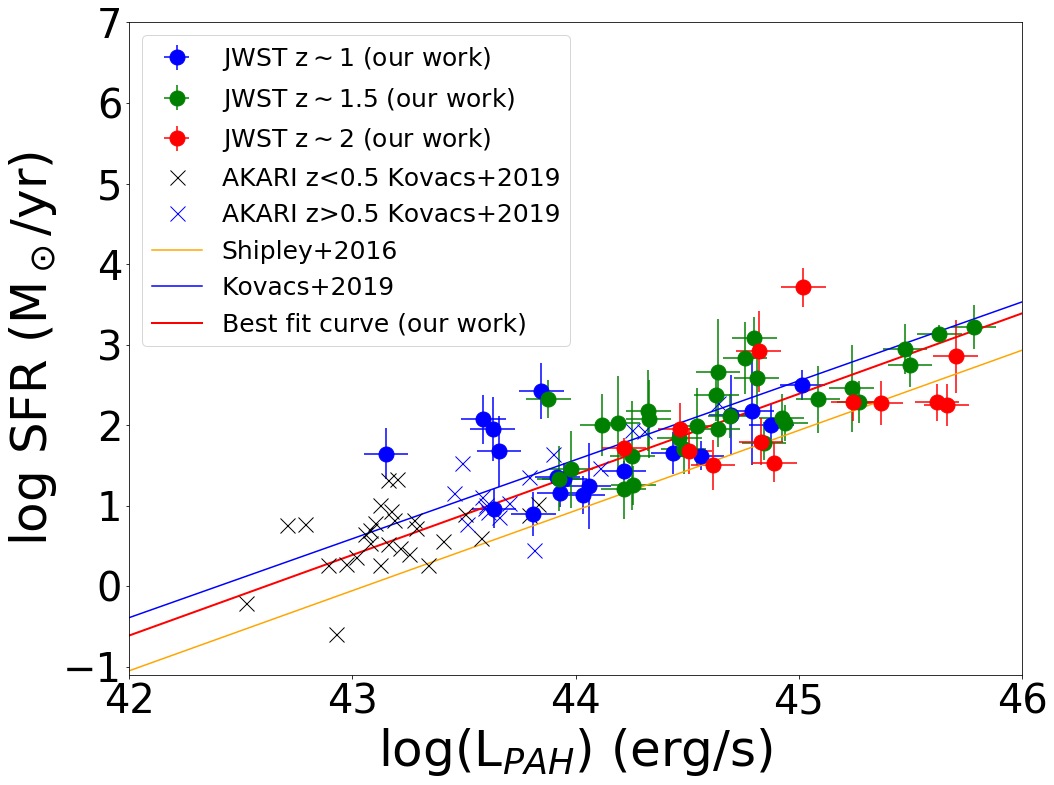

In [220]:
dot1=pd.read_csv('ceers/pah_sfr_points_1.csv')
dot2=pd.read_csv('ceers/pah_sfr_points_2.csv')

Lpah15=[np.log10(i*3.846*10**33) for i in L_pah15]
Lpah15_err=[0.1 for i in Lpah15]
s15=np.log10(sfr15)
# s15_err=sfr15_err/sfr15/np.log(10)
s15_err=np.log10(sfr15+sfr15_err)-np.log10(sfr15)

Lpah18=[np.log10(i*3.846*10**33) for i in L_pah18]
Lpah18_err=[0.1 for i in Lpah18]
s18=np.log10(sfr18)
s18_err=np.log10(sfr18+sfr18_err)-np.log10(sfr18)
# s18_err=sfr18_err/sfr18/np.log(10)

Lpah21=[np.log10(i*3.846*10**33) for i in L_pah21]
Lpah21_err=[0.1 for i in Lpah21]
s21=np.log10(sfr21)
s21_err=np.log10(sfr21+sfr21_err)-np.log10(sfr21)
# s21_err=sfr21_err/sfr21/np.log(10)

x0=np.linspace(41.3,46,1000) 
y0=-41.55+0.98*x0
y1=-42.84+0.995*x0

plt.figure(figsize=(16,12))


x=np.linspace(9,14.3,1000)
y=x-0.78
# yfit=func1(popt, x)
print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)

plt.plot(x0[:1000],fixed_slope*x0[:1000]+intercept, 'r', lw=2, label='Best fit curve (our work)')
plt.errorbar(Lpah15,s15,xerr=Lpah15_err,yerr=s15_err,fmt='o',markersize=15,color='blue' ,label='JWST z$\sim$1 (our work)')
plt.errorbar(Lpah18,s18,xerr=Lpah18_err,yerr=s18_err,fmt='o',markersize=15,color='green' ,label='JWST z$\sim$1.5 (our work)')
plt.errorbar(Lpah21,s21,xerr=Lpah21_err,yerr=s21_err,fmt='o',markersize=15,color='red' ,label='JWST z$\sim$2 (our work)')


plt.plot(x0,y0,c='blue',markersize=15,label='Kovacs+2019')
plt.plot(x0,y1,c='orange',markersize=15,label='Shipley+2016')
# plt.plot(x0,func(x0,*popt_cons),c='red',label='Fixed coeffient')
# plt.plot(x0,func(x0,*popt),'--',c='red',label='Not fixed coeffient')
plt.plot(dot1['x'],dot1['point1'],'x',markersize=15,color='black',label='AKARI z<0.5 Kovacs+2019')
plt.plot(dot2['x'],dot2['point1'],'x',markersize=15,color='blue',label='AKARI z>0.5 Kovacs+2019')
plt.xlabel('log(L$_{PAH}$) (erg/s)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=30,loc=2)
plt.xticks([42,43,44,45,46],fontsize=40)
plt.yticks(fontsize=40)
plt.xlim([42,46])
plt.ylim([-1.1,7])
handles, labels = plt.gca().get_legend_handles_labels()
order = [5,6,7,3,4,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25,loc=2)
# plt.legend(fontsize=20)

# plt.savefig('L_PAH_SFR_0818.png')
# plt.savefig('PAH luminosity to SFR 0105.png')
plt.savefig('L_PAH_SFR_0116.png')


In [202]:
pd.concat([s15,s18,s21],axis=0)

52     1.621482
55     0.962907
57     2.007849
61     1.654103
121    2.502576
         ...   
258    2.276472
271    2.289770
303    1.957328
432    2.857739
433    2.915476
Name: bayes.sfh.sfr, Length: 62, dtype: float64

In [206]:
Lpah15_err

[0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1]

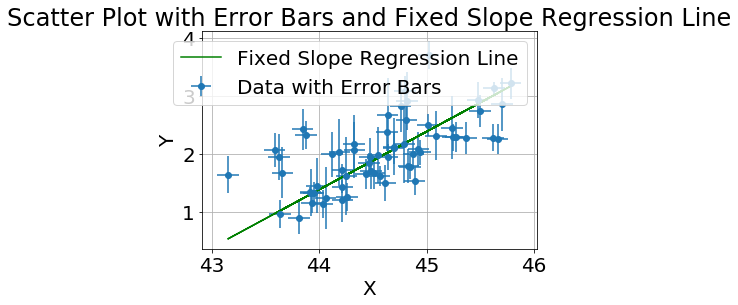

Fixed Slope: 1.0
Intercept: -42.611973416905904
Intercept Error: 0.05738418526896685


In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

# Generating example data
x=Lpah15+Lpah18+Lpah21
y=pd.concat([s15,s18,s21],axis=0)
noise_x=Lpah15_err+Lpah18_err+Lpah21_err
noise_y=pd.concat([s15_err,s18_err,s21_err],axis=0)
x = np.array(x)
y = np.array(y)
x_error =  np.array(noise_x)
y_error = np.array(noise_y)


# Define the model for the regression (linear model: y = a*x + b)
def fixed_slope_model(B, x, fixed_slope):
    return fixed_slope * x + B[0]

# Create a Data object with x and y data, and corresponding x and y errors
data = odr.RealData(x, y, sx=x_error, sy=y_error)

# Create a Model object with the custom fixed slope model function
fixed_slope = 1.0  # Set the fixed slope value here
model = odr.Model(fixed_slope_model, extra_args=(fixed_slope,))

# Perform the orthogonal distance regression
odr_result = odr.ODR(data, model, beta0=[0]).run()

# Extract the intercept parameter and its standard error
intercept = odr_result.beta[0]
intercept_error = odr_result.sd_beta[0]

# Plotting
plt.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', label='Data with Error Bars')
plt.plot(x, fixed_slope * x + intercept, 'g', label='Fixed Slope Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Error Bars and Fixed Slope Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)


(array([120., 186., 107.,   0.,  69.,  36.,   0.,  28.,  12.,  15.]),
 array([0.1 , 0.44, 0.78, 1.12, 1.46, 1.8 , 2.14, 2.48, 2.82, 3.16, 3.5 ]),
 <a list of 10 Patch objects>)

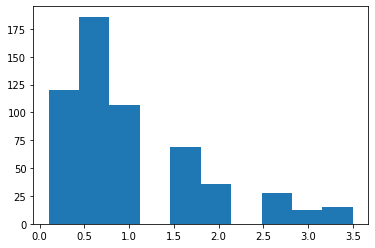

In [80]:
plt.hist(x=sed1013[col[2]])
# plt.hist(x=sed1012[col[2]])


In [73]:
sed0925[col].iloc[[436,484,508,13,272,432]],sed0925[col].iloc[[298,333,335]]

(     best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_ISM  \
 436                 1.106306                    1.64                      1.9   
 484                 0.530866                    1.39                      1.7   
 508                 0.385188                    1.25                      1.9   
 13                  2.241569                    1.75                      2.7   
 272                 0.873277                    1.58                      1.7   
 432                 1.870565                    2.36                      0.9   
 
      best.attenuation.Av_BC  
 436                2.418182  
 484                2.163636  
 508                2.418182  
 13                 3.436364  
 272                2.163636  
 432                1.145455  ,
      best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_ISM  \
 298                 0.260527                    1.03                      1.3   
 333                 0.412540             

In [149]:
# pah_weird=[298,333,436,484,508,335,13,272,432]
test=[46,335,436,100,333,316,471,347,501,298]
pah_weird=[46,335,100,333,316,471,347,501,298]
col=['best.reduced_chi_square','best.universe.redshift','best.attenuation.Av_ISM','best.attenuation.Av_BC']
col=['best.reduced_chi_square','best.universe.redshift','best.attenuation.Av_ISM','best.attenuation.slope_ISM','best.attenuation.slope_BC']
pd.concat([sed0to3[col].iloc[pah_weird],sedav[col].iloc[pah_weird],sed0925[col].iloc[pah_weird]],axis=1)
pd.concat([sed0to3[col].iloc[pah_weird],sed0925[col].iloc[pah_weird]],axis=1)

best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_ISM  \
46                  1.071951                    1.73                 0.774264   
335                 9.140037                    1.68                 5.994843   
100                 1.978609                    1.20                 1.291550   
333                 0.504663                    1.10                 3.593814   
316                 0.390435                    1.31                 0.166810   
471                 0.461774                    1.27                 0.464159   
347                 0.235444                    1.00                 0.166810   
501                 0.982898                    1.68                 0.774264   
298                 0.263692                    1.03                 1.291550   

     best.attenuation.slope_ISM  best.attenuation.slope_BC  \
46                         -0.1                         -1   
335                        -0.1                         -3   
100                        -1.0                         -1   
333                        -0.1                         -1   
316                        -1.0                         -3   
471                        -1.0                         -1   
347                        -1.0                         -3   
501                        -1.0                        -10   
298                        -0.1                         -1   

     best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_ISM  \
46                  0.871485                    1.90                      3.7   
335                 9.742879                    1.54                      4.1   
100                 0.944587                    1.01                      4.1   
333                 0.412540                    1.09                      3.3   
316                 0.394145                    1.16                      1.7   
471                 0.433836                    1.13                      2.1   
347                 0.236240                    0.79                      2.5   
501                 0.750550                    1.31                      1.9   
298                 0.260527                    1.03                      1.3   

     best.attenuation.slope_ISM  best.attenuation.slope_BC  
46                         -0.1                       -0.1  
335                        -0.1                       -3.0  
100                        -0.5                       -0.1  
333                        -0.1                       -1.0  
316                        -0.1                       -1.0  
471                        -0.5                       -0.1  
347                        -0.1                       -3.0  
501                        -0.5                       -3.0  
298                        -0.1                       -1.0

In [61]:
sed1012['best.universe.redshift'][cr_pah&z1]

52     1.05
55     1.05
57     1.12
61     1.12
128    0.84
180    1.11
197    1.11
203    1.05
298    1.08
317    0.99
333    1.19
346    1.20
347    0.95
422    0.82
438    0.90
472    1.23
503    0.80
507    0.83
508    1.25
Name: best.universe.redshift, dtype: float64

(array([1., 0., 0., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.79 , 0.827, 0.864, 0.901, 0.938, 0.975, 1.012, 1.049, 1.086,
        1.123, 1.16 ]),
 <a list of 10 Patch objects>)

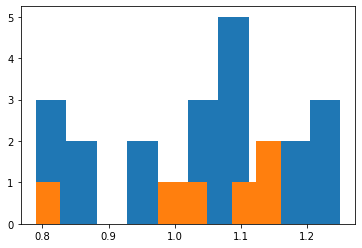

In [130]:
test=[46,335,436,100,333,316,471,347,501,298]
col=['best.universe.redshift']
plt.hist(x=sed0925['best.universe.redshift'][cr_pah&z1])
plt.hist(x=sed0925['best.universe.redshift'].iloc[test])

(array([1., 1., 3., 0., 1., 0., 0., 1., 1., 2.]),
 array([1.3 , 1.58, 1.86, 2.14, 2.42, 2.7 , 2.98, 3.26, 3.54, 3.82, 4.1 ]),
 <a list of 10 Patch objects>)

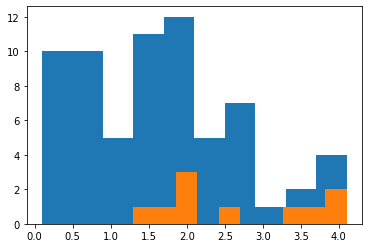

In [150]:
plt.hist(x=sed0925['best.attenuation.Av_ISM'][cr_pah&(z1|z15|z2)])
plt.hist(x=sed0925['best.attenuation.Av_ISM'].iloc[test])

In [151]:
sed0925[col][(sed0925['best.attenuation.Av_ISM']>3)&cr_pah&(z1|z15|z2)]

best.reduced_chi_square  best.universe.redshift  best.attenuation.Av_ISM  \
46                  0.871485                    1.90                      3.7   
100                 0.944587                    1.01                      4.1   
167                 1.322356                    1.26                      3.5   
238                 0.769262                    1.48                      3.1   
333                 0.412540                    1.09                      3.3   
335                 9.742879                    1.54                      4.1   
506                 0.953845                    1.75                      4.1   

     best.attenuation.slope_ISM  best.attenuation.slope_BC  
46                         -0.1                       -0.1  
100                        -0.5                       -0.1  
167                        -0.5                      -10.0  
238                        -0.5                      -10.0  
333                        -0.1                       -1.0  
335                        -0.1                       -3.0  
506                        -0.5                      -10.0

In [67]:
df_pah=pd.DataFrame()L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])

In [101]:
sed0925.iloc[test].to_csv('weird_PAH_1006.csv')

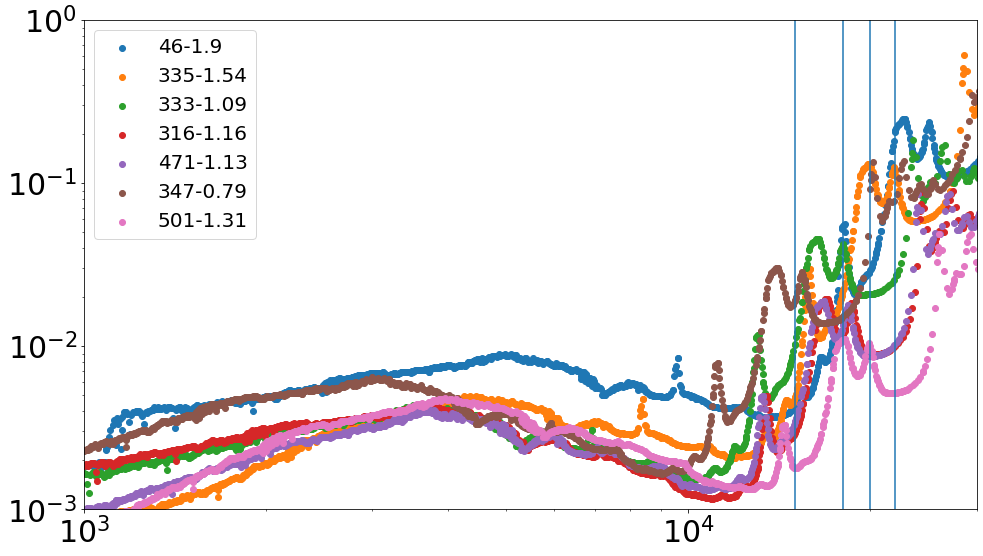

In [153]:
test=[46,335,333,316,471,347,501]
plt.figure(figsize=(16,9))
for i in test:
    myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/jimmy_4f/pah_Av_z07to27_0925/'+sed0925['id'].iloc[i]+'_best_model.fits')
    data=myfile[1].data
    wl=data['wavelength']
    flux=data['Fnu']
    # peak=[]
    # for j,b in enumerate(wl):
    #     if (b > 15000) & (b<20000):
    #         peak.append(flux[j])
    # # print(np.max(peak))

# peak=np.max(flux[])
    # plt.scatter(wl,flux,label=f'{i}-'+str(sed0to3['best.universe.redshift'][cr_pah&z1].iloc[i]))
    plt.scatter(wl,flux,label=f'{i}-'+str(sed0925['best.universe.redshift'].iloc[i]))
plt.axvline(15000)
plt.axvline(18000)
plt.axvline(20000)
plt.axvline(22000)
plt.xlim([1000,30000])
plt.ylim([0.001,1])
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(fontsize=20)
plt.savefig('spectrum_1006.png')

In [241]:
np.log10(sed0to3['best.dust.luminosity'][cr_pah&z15]*2.613*10**-27)

32     10.826882
42     11.211351
46     11.965475
74     11.150587
121    10.934288
167    12.290423
170    12.192191
224    10.492485
237    10.729216
238    12.012087
245    11.951066
252    11.177932
253    12.151887
274    10.733123
295    11.325287
299    10.770327
300    12.161519
316    10.500484
319    11.147779
335    13.678451
350    10.459275
362    11.018187
428    11.288085
437    12.662164
471    10.421609
474    10.516575
480    11.307849
497    11.213266
501    11.478434
Name: best.dust.luminosity, dtype: float64

In [208]:
s=pd.DataFrame(np.log10(pah_luminosity_pah15))
test=pd.DataFrame([sed0to3['best.universe.redshift'][cr_pah&z15].tolist(),np.log10(sed0to3['best.dust.luminosity'][cr_pah&z15]*2.613*10**-27).tolist(),np.log10(pah_luminosity_pah18)]).T
test.columns=['z','x','y']
test

z          x          y
0   1.56  11.031941  10.848897
1   1.75  10.826827  10.452721
2   1.73  11.214424  10.373826
3   1.62  13.135697  11.308363
4   1.49  11.454685  11.370023
5   1.26  12.428128  11.711844
6   1.27  12.289013  11.576982
7   1.27  12.190220  11.477335
8   1.39  10.486043  10.695778
9   1.57  10.729420  10.662571
10  1.48  12.095099  11.424907
11  1.64  11.951876  11.712398
12  1.72  11.179513  10.913133
13  1.43  12.148360  10.369427
14  1.60  10.698887  10.942182
15  1.48  10.741198  10.746635
16  1.62  11.326410  11.259425
17  1.47  10.770337  10.576534
18  1.75  12.163494  11.309865
19  1.31  10.500516  10.389391
20  1.29  11.138765  11.226305
21  1.68  13.650274  11.553529
22  1.32  10.443284  10.331937
23  1.27  11.018434  10.337540
24  1.74  11.272542  11.098670
25  1.74  12.653507  12.123475
26  1.27  10.422236  10.304647
27  1.36  10.516783  10.660110
28  1.73  11.307653  11.132103
29  1.68  11.478291  10.663426
30  1.75  12.452058  11.594743

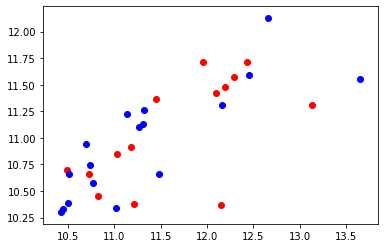

In [209]:
plt.scatter(test['x'][:14],test['y'][:14],c='r')
plt.scatter(test['x'][14:],test['y'][14:],c='b')

In [161]:
s=pd.DataFrame(np.log10(pah_luminosity_pah15))
test=pd.DataFrame([sed0to3['best.universe.redshift'][cr_pah15].tolist(),np.log10(sed0to3['best.dust.luminosity'][cr_pah15]*2.613*10**-27).tolist(),np.log10(pah_luminosity_pah15)]).T
test.columns=['z','x','y']
test

z          x          y
0   1.05  11.245256  11.009959
1   1.11  10.343557  10.124579
2   1.11  11.599021  11.305077
3   1.13  10.897810  10.826872
4   1.19  11.969530  11.002398
5   1.26  12.428128  11.469161
6   0.87  10.927453  10.460707
7   1.27  12.289013  11.337567
8   1.27  12.190220  11.236729
9   0.17   9.118697   7.666523
10  1.16  10.235363   9.620085
11  1.12  11.041236  10.544576
12  1.04  10.481215  10.369129
13  1.57  10.729420   9.685133
14  1.04  11.569931   9.204771
15  0.98  11.330627  11.162910
16  1.29  11.138765  10.995955
17  1.09  12.506091   9.962519
18  0.84  11.203429   9.278009
19  0.79  11.944785   9.933167
20  0.81  11.083644  10.276251
21  0.90  10.201333  10.154153
22  1.21  10.608188  10.456737
23  1.15  13.458240  10.928415
24  0.71  11.536819   9.582771
25  0.81  10.874401  10.646071
26  1.13  13.306542  10.770945

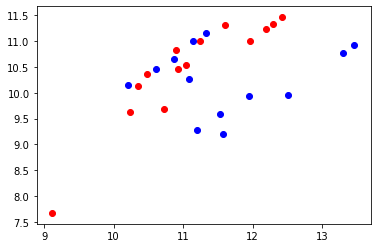

In [166]:
plt.scatter(test['x'][:14],test['y'][:14],c='r')
plt.scatter(test['x'][14:],test['y'][14:],c='b')

In [156]:
sed0to3['best.universe.redshift'][cr_pah15].tolist()

[1.05,
 1.11,
 1.11,
 1.13,
 1.19,
 1.26,
 0.87,
 1.27,
 1.27,
 0.17,
 1.16,
 1.12,
 1.04,
 1.57,
 1.04,
 0.98,
 1.29,
 1.09,
 0.84,
 0.79,
 0.81,
 0.9,
 1.21,
 1.15,
 0.71,
 0.81,
 1.13]

In [123]:
import astropy 
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
cosmo.luminosity_distance(4)
# DL=cosmo.luminosity_distance(train250z['z'])
# df_DL=pd.DataFrame(DL)
# print(df_DL)
# df_DL.set_index(train250z.index,inplace=True)

# f=10**((train250-8.9)/-2.5)
# L=f.mul((4*np.pi*df_DL**2).values,axis='index')

# targetf=10**((target250-8.9)/-2.5)
# targetL=targetf.mul((4*np.pi*df_DL**2).values,axis='index')

# modz=np.array([0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0])
# modDL=cosmo.luminosity_distance(modz)
# df_modDL=pd.DataFrame(modDL)
# print(df_modDL)
# # df_modDL

<Quantity 35842.353288 Mpc>

In [83]:
from astropy.io import fits
# filename=fits.util.get_testdata_filepath('/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/64_best_model.fits')
# hdul=fits.open(filename)
myfile=fits.open('/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/64_best_model.fits')

In [158]:
# solid=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/solidline.csv')
# dash1=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/dashline1.csv')


line=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/line.csv')
dash2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/dashline2.csv')
redpoint=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/redpoint.csv')

dash2=dash2.drop(0,axis=0)

In [8]:

from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
sed0to3['best.dust.luminosity'][cr_pah&z2]

<Quantity 5172.18037663 Mpc>

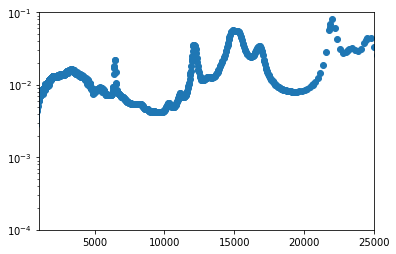

In [208]:
myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/59_best_model.fits')
data=myfile[1].data
wl=data['wavelength']
flux=data['Fnu']
L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])

# peak=np.max(flux[])
plt.scatter(wl,flux)
plt.xlim([1000,25000])
plt.ylim([0.0001,0.1])
plt.yscale('log')

In [19]:
sedceers_2['id'][(sedceers_2['best.reduced_chi_square']<9)&(sedceers_2['best.reduced_chi_square']>0)].values

array([ 59,  64,  66,  72, 113, 136, 178, 187, 218, 225])

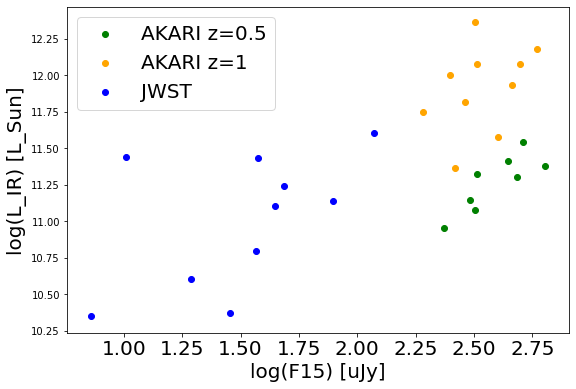

In [20]:
AKARI_IR=np.array([35,14,20,26,21,12,9,24])
AKARI_F15=np.array([514,303,485,441,325,318,236,637])
sed0to3['best.dust.luminosity'][cr_pah&z2]
AKARI_IR_1=np.array([86,23,120,230,150,56,120,38,100,66])
AKARI_F15_1=np.array([461,262,499,318,588,192,327,400,250,290])


index=sedceers_2['id'][(sedceers_2['best.reduced_chi_square']<9)&(sedceers_2['best.reduced_chi_square']>0)].values
good_fit=[sedceers_2[sedceers_2['id']==i].index.values[0] for i in index]
plt.figure(figsize=(9,6))
plt.scatter(np.log10(AKARI_F15),np.log10(AKARI_IR*10**10),label='AKARI z=0.5',color='green')
plt.scatter(np.log10(AKARI_F15_1),np.log10(AKARI_IR_1*10**10),label='AKARI z=1',color='orange')
plt.scatter(np.log10(ceers['jwst.miri.F1500W'].iloc[index]*1000),np.log10(sedceers_2['best.dust.luminosity'].iloc[good_fit]/(3.827e+26)),label='JWST',color='blue')
plt.legend(fontsize=20)
plt.xlabel('log(F15) [uJy]',fontsize=20)
plt.ylabel('log(L_IR) [L_Sun]',fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(fontsize=20)
plt.savefig('AKARI_JWST_F15_LIR.png')

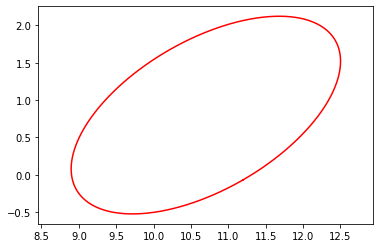

In [37]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.arange(0, 2*np.pi, 0.01)

a = 1
b = 2

x00=10.7
y00=0.8
xpos = a*np.cos(theta)L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])

In [11]:
nep=pd.read_csv('/home/leolin/Desktop/MIRI_SED/NEP_SPIRE_mspec_lums.csv',index_col=0)
print(nep.columns)
print(nep[['zspec','LIR','SFR','Mstar']].iloc[242:250])
nep_sfr=nep['SFR'].iloc[242:248]
nep_esfr=nep['eSFR'].iloc[242:248]
nep_mass=nep['Mstar'].iloc[242:248]
nep_emass=nep['eMstar'].iloc[242:248]

Index(['zspec', 'idnum', 'spec_id_name', 'R.A.', 'Dec.', 'flg', 'field', 'fn',
       'class', 'OII3727', 'hbeta', 'oIII4959', 'oIII5007', 'oI6300',
       'nII6548', 'halpha', 'nII6584', 'sII6716', 'sII6731', 'loglir', 'smpid',
       'L08', 'eL08', 'L12', 'eL12', 'L250', 'eL250', 'L350', 'eL350', 'LIR',
       'dLIR', 'Ldust', 'eLdst', 'SFR', 'eSFR', 'Mstar', 'eMstar', 'Mdust',
       'eMdust', 'fmuSFH', 'efmuSFH', 'fmuIR', 'efmuIR', 'Tc', 'eTc', 'Tw',
       'eTw'],
      dtype='object')
      zspec    LIR     SFR  Mstar
n                                
243  0.7510  11.67   38.88  10.90
244  0.7721  11.52   22.88  10.97
245  0.8166  12.11  132.40  10.93
246  0.8173  11.59   38.91  10.58
247  0.8437  11.84   53.98  10.63
248  0.8558  11.93   81.79  10.79


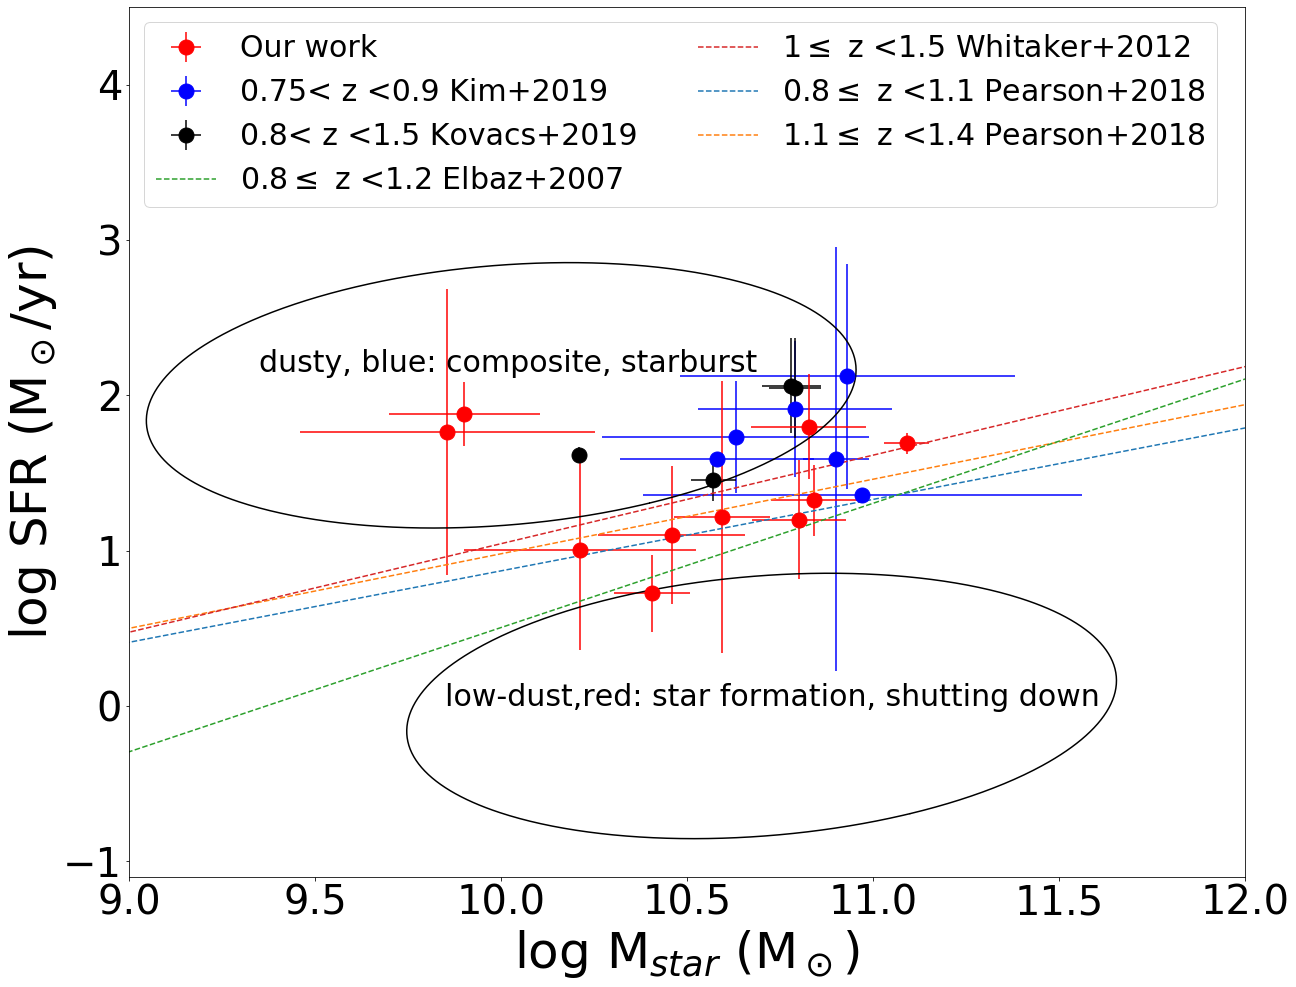

In [23]:
m0=0.5
a0=1.5
a1=0.3
m1=0.36
a2=2.5

# plt.xlim(-2, 4)
# plt.ylim(-1, 3)

# plt.show()



M=sedceers_2['bayes.stellar.m_star'].iloc[good_fit].values
z=sedceers_2['best.universe.redshift'].iloc[good_fit].values

r=np.log10(1+z)
m=np.log10(M)-9
# print(np.max([0,m-m1-(a2*r)]))
SFR_MS=np.array([m[i]-m0+(a0*r[i])-a1*((np.max([0,m[i]-m1-(a2*r[i])])**2)) for i in range(len(M))])
# print(SFR_MS)

z=1

alpha=0.70-0.13*z
beta=0.38+1.14*z-0.19*z**2


x=M
y=sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values

x0=np.linspace(8.5,12,1000)
y0=0.46*(x0-10.5)+1.10
y1=0.48*(x0-10.5)+1.22

y2=0.8*(x0-10)+np.log10(3.2)

y3=alpha*(x0-10.5)+beta

x_err=sedceers_2['bayes.stellar.m_star_err'].iloc[good_fit].values/M
y_err=sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit].values/sedceers_2['bayes.sfh.sfr'].iloc[good_fit].values

theta = np.arange(0, 2*np.pi, 0.01)

a = 1.6/2
b = 2/2

x00=10.7
y00=0
x11=10
y11=2.0

xpos = a*np.cos(theta)
ypos = b*np.sin(theta)
L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])


plt.figure(figsize=(20,16))

# plt.errorbar(np.log10(M_star),np.log10(sfr),xerr=[M_star_err[i]/M_star[i]/np.log(10) for i in range(len(M_star))],yerr=[sfr_err[i]/sfr[i]/np.log(10) for i in range(len(sfr))],
# fmt='o',color='green',label='new catalog')
# plt.errorbar(np.log10(M_star_15),np.log10(sfr_15),xerr=[M_star_15_err[i]/M_star_15[i]/np.log(10) for i in range(len(M_star_15))],yerr=[sfr_15_err[i]/sfr_15[i]/np.log(10) for i in range(len(sfr_15))],
# fmt='^',markersize=15,color='blue',label='Jimmy PAH 15 um galaxies')
# plt.errorbar(np.log10(M_star_18),np.log10(sfr_18),xerr=[M_star_18_err[i]/M_star_18[i]/np.log(10) for i in range(len(M_star_18))],yerr=[sfr_18_err[i]/sfr_18[i]/np.log(10) for i in range(len(sfr_18))],
# fmt='^',markersize=15,color='green',label='new catalog_18')
# plt.errorbar(np.log10(M_star_21),np.log10(sfr_21),xerr=[M_star_21_err[i]/M_star_21[i]/np.log(10) for i in range(len(M_star_21))],yerr=[sfr_21_err[i]/sfr_21[i]/np.log(10) for i in range(len(sfr_21))],
# fmt='^',markersize=15,color='red',label='new catalog_21')

am=[10.79,10.78,10.57,10.21]
amerr=[0.07,0.08,0.06,0.02]
asfr=[111.38,115.46,28.64,41.19]
asfrerr=[35.63,35.12,4.01,2.09]

plt.errorbar(nep_mass,np.log10(nep_sfr),xerr=nep_emass,yerr=nep_esfr/nep_sfr,fmt='o',markersize=15,color='blue',label='0.75< z <0.9 Kim+2019')
plt.errorbar(am,np.log10(asfr),xerr=amerr,yerr=[asfrerr[i]/asfr[i] for i in range(len(asfr))],fmt='o',markersize=15,color='black',label='0.8< z <1.5 Kovacs+2019')
plt.errorbar(np.log10(x),np.log10(y),xerr=x_err,yerr=y_err,fmt='o',markersize=15,color='r',label='Our work')
plt.plot(x0,y0,'--',label='0.8$\leq$ z <1.1 Pearson+2018')
plt.plot(x0,y1,'--',label='1.1$\leq$ z <1.4 Pearson+2018')

plt.plot(x0,y2,'--',label='0.8$\leq$ z <1.2 Elbaz+2007')

plt.plot(x0,y3,'--',label='1$\leq$ z <1.5 Whitaker+2012')
# plot the circle
plt.plot(x00+new_xpos,y00+new_ypos, 'black')
plt.plot(x11+new_xpos,y11+new_ypos, 'black')


plt.xlabel('log M$_{star}$ (M$_\odot$)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=25,loc=2)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.text(x00-0.85,y00,text1,fontsize=30)
plt.text(x11-0.65,y11+0.15,text2,fontsize=30)
plt.xlim([9,12])
plt.ylim([-1.1,4.5])
handles, labels = plt.gca().get_legend_handles_labels() 
order = [6,4,5,2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],ncol=2,fontsize=30,loc=2)
# plt.axis('equal')
# plt.savefig('Mass_vs_SFR (main sequence)_jimmy0619.png')
plt.savefig('Mass_vs_SFR (main sequence).png')

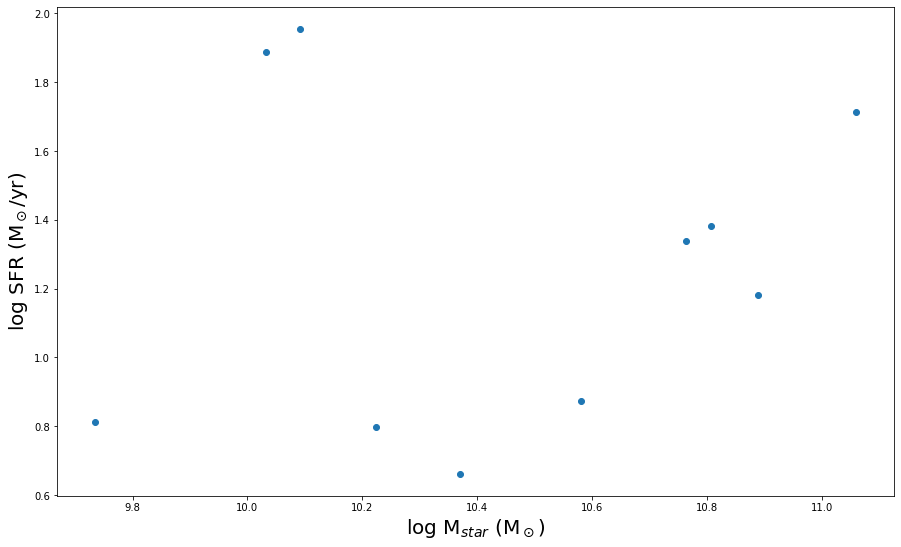

In [49]:
x=sedceers_2['best.stellar.m_star'].iloc[good_fit]
y=sedceers_2['best.sfh.sfr'].iloc[good_fit]

plt.figure(figsize=(15,9))
plt.errorbar(np.log10(x),np.log10(y),fmt='o')L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])

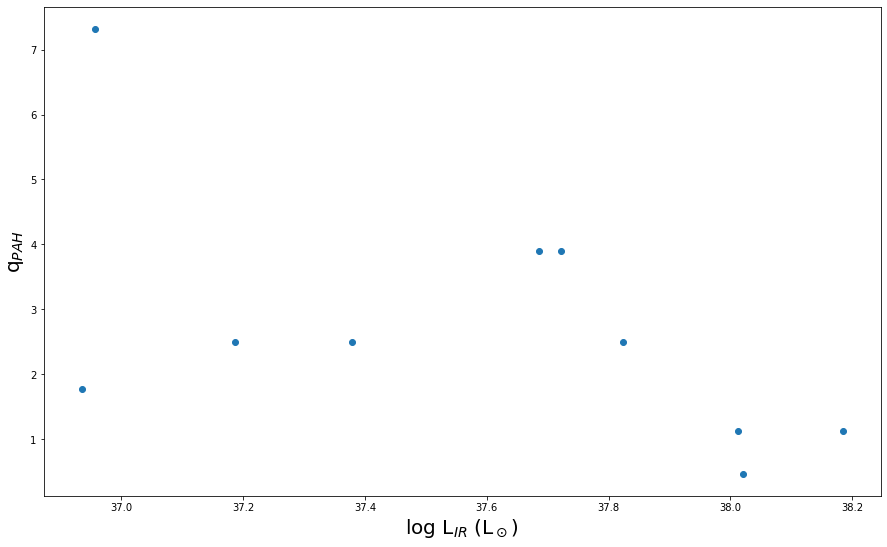

In [43]:

x=sedceers_2['best.dust.luminosity'].iloc[good_fit]
y=sedceers_2['best.dust.qpah'].iloc[good_fit]

plt.figure(figsize=(15,9))
plt.errorbar(np.log10(x),y,fmt='o')
plt.xlabel('log L$_{IR}$ (L$_\odot$)',fontsize=20)L_pah15,L_pah15_err= calculate_pah_luminosity(sed0925,pah15,z1,[10000,15000])
plt.ylabel('q$_{PAH}$',fontsize=20)
plt.savefig('LIR_vs_qpah.png')

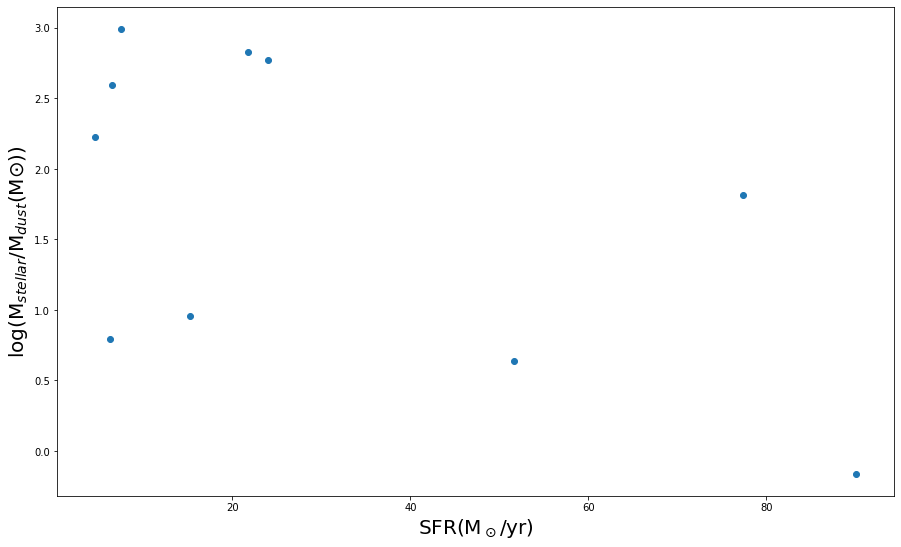

In [44]:
y=sedceers_2['best.stellar.m_star'].iloc[good_fit]/(sedceers_2['best.dust.mass'].iloc[good_fit]/(2*10**30)).astype('float')
plt.figure(figsize=(15,9))
plt.errorbar(sedceers_2['best.sfh.sfr'].iloc[good_fit],np.log10(y),fmt='o')
plt.xlabel('SFR(M$_\odot$/yr)',fontsize=20)
plt.ylabel('log(M$_{stellar}$/M$_{dust}$(M$\odot$))',fontsize=20)
plt.savefig('SFR_vs_Mass.png')

In [9]:
# [64,72,113,136,178,187,218,225]
index=sedceers_2['id'][sedceers_2['best.reduced_chi_square']<9].values
good_fit=[sedceers_2[sedceers_2['id']==i].index.values[0] for i in index]
print(sedceers_2[['id','best.reduced_chi_square','best.universe.redshift','best.dust.qpah','best.dust.luminosity','best.dust.mass','best.stellar.m_star']].iloc[good_fit])
# np.log10(pah_luminosity)

     id  best.reduced_chi_square  best.universe.redshift  best.dust.qpah  \
0    59                 8.180074                    1.09            1.12   
1    64                 1.371578                    1.08            1.77   
2    66                 7.277954                    1.11            1.12   
3    72                 3.889486                    1.11            7.32   
4   113                 2.386376                    1.02            2.50   
6   136                 4.441284                    1.18            3.90   
8   178                 5.731394                    1.24            3.90   
9   187                 2.622455                    1.21            2.50   
10  218                 3.124567                    1.10            2.50   
11  225                 4.931644                    0.79            0.47   

    best.dust.luminosity  best.dust.mass  best.stellar.m_star  
0           1.029872e+38    3.571931e+40         1.234667e+10  
1           8.603785e+36    2.75696

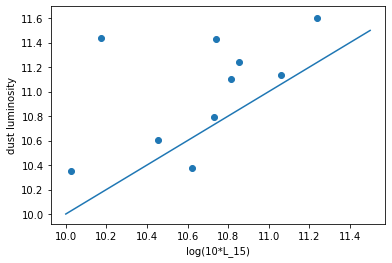

In [274]:
plt.scatter(1+np.log10(ceers['jwst.miri.F1500W'].iloc[index]*(10**-3)*(9*10**7)*(DL[i].value**2)/15),np.log10(sedceers_2['best.dust.luminosity'].loc[good_fit]/(3.827e+26)))
plt.plot([10,11.5],[10,11.5])
plt.xlabel('log(10*L_15)')
plt.ylabel('dust luminosity')
plt.savefig('0927_luminosity_comparison.png')

In [269]:
1+np.log10(ceers['jwst.miri.F1500W'].iloc[index]*(10**-3)*(9*10**7)*(DL[i].value**2)/15)

59     10.740270
64     10.023230
66     11.238495
72     10.622085
113    10.731583
136    11.062931
178    10.812159
187    10.851869
218    10.454935
225    10.175292
Name: jwst.miri.F1500W, dtype: float64

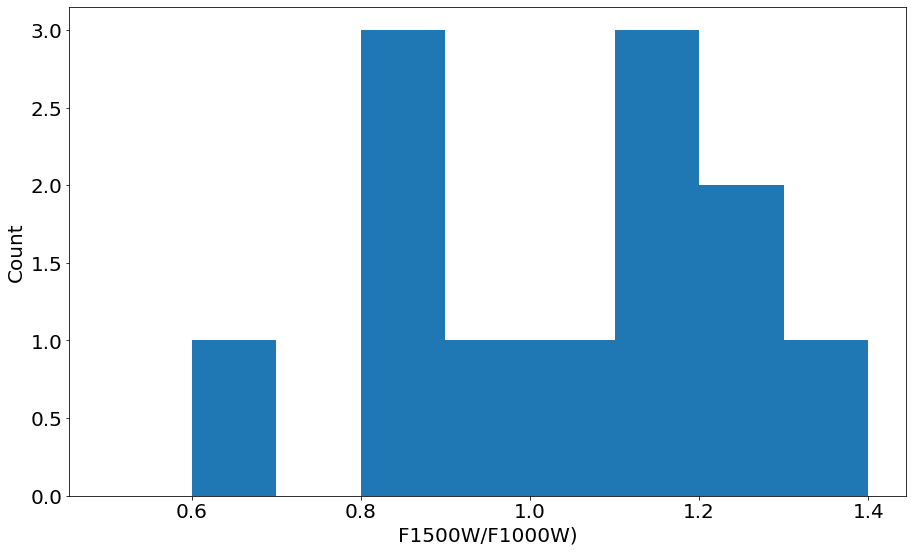

In [104]:



color_hist=ceers[(sedceers_20['best.universe.redshift']<1.4)&(sedceers_20['best.universe.redshift']>0.5)]

plt.figure(figsize=(15,9))

plt.hist(color_hist['jwst.miri.F1500W']/color_hist['jwst.miri.F1000W'],bins=[0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4])
# plt.legend(fontsize=20)
plt.xlabel('F1500W/F1000W)',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('F1500-F1000 distribution at z~1.png')

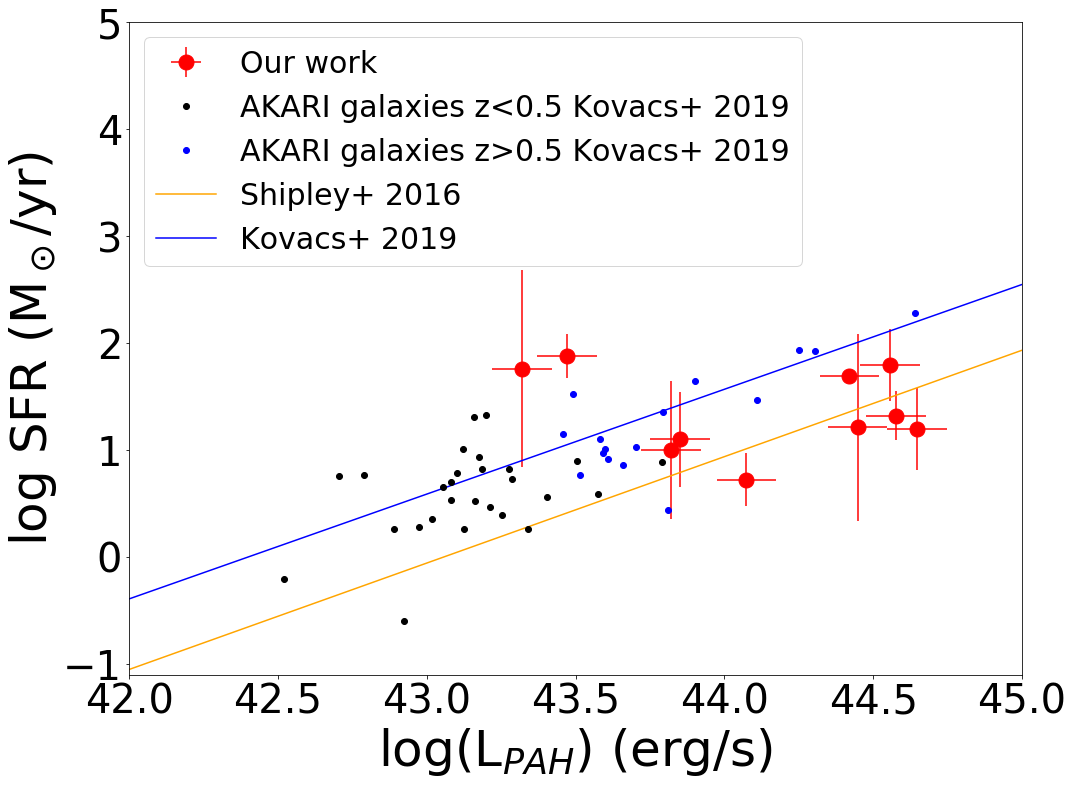

In [43]:
dot1=pd.read_csv('ceers/pah_sfr_points_1.csv')
dot2=pd.read_csv('ceers/pah_sfr_points_2.csv')
x=[i*3.846*10**33 for i in pah_luminosity]
y=sedceers_2['bayes.sfh.sfr'].iloc[good_fit]

x_err=[0.1 for i in x]
y_err=sedceers_2['bayes.sfh.sfr_err'].iloc[good_fit]/sedceers_2['bayes.sfh.sfr'].iloc[good_fit]


# from scipy.optimize import curve_fit

# def func(x, a, b):
#   return a + b * x 

# xf =np.log10(x)
# yf = np.log10(y)

# print(np.polyfit(xf, yf, 1))

# popt, _ = curve_fit(func, xf, yf)
# print(popt)

# popt_cons, _ = curve_fit(func, xf, yf, bounds=([-np.inf, 0.995,], [np.inf, 1.001]))
# print(popt_cons)

# xnew = np.linspace(xf[0], xf[-1], 1000)

# plt.plot(xf, yf, 'bo')
# plt.plot(xnew, func(xnew, *popt), 'k-')
# plt.plot(xnew, func(xnew, *popt_cons), 'r-')
# plt.show()


# #Degree of the fitting polynomial
# deg = 1
# # Parameters from the fit of the polynomial
# p = np.polyfit(np.log10(x), np.log10(y), deg)
# m = p[0]  # Gradient
# c = p[1]  # y-intercept
# print(m,c,p)


x0=np.linspace(41.3,45,1000) 
y0=-41.55+0.98*x0
y1=-42.84+0.995*x0

plt.figure(figsize=(16,12))
plt.errorbar(np.log10(x),np.log10(y),xerr=x_err,yerr=y_err,fmt='o',markersize=15,color='red' ,label='Our work')
plt.plot(x0,y0,c='blue',markersize=15,label='Kovacs+ 2019')
plt.plot(x0,y1,c='orange',markersize=15,label='Shipley+ 2016')
# plt.plot(x0,func(x0,*popt_cons),c='red',label='Fixed coeffient')
# plt.plot(x0,func(x0,*popt),'--',c='red',label='Not fixed coeffient')
plt.plot(dot1['x'],dot1['point1'],'o',color='black',label='AKARI galaxies z<0.5 Kovacs+ 2019')
plt.plot(dot2['x'],dot2['point1'],'o',color='blue',label='AKARI galaxies z>0.5 Kovacs+ 2019')
plt.xlabel('log(L$_{PAH}$) (erg/s)',fontsize=50)
plt.ylabel('log SFR (M$_\odot$/yr)',fontsize=50)
# plt.legend(fontsize=30,loc=2)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.xlim([42,45])
plt.ylim([-1.1,5])
handles, labels = plt.gca().get_legend_handles_labels()
order = [4,2,3,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=30,loc=2)

plt.savefig('L_PAH_SFR_0818.png')
# plt.savefig('PAH luminosity to SFR 0105.png')



In [87]:
fd=np.array([9.2,6.9,10.3,9.8,15.1,13.0,16.4,27.8,12.3])
fd1=np.array([7.9,5.9,8.4,8.4,12.9,10.5,14.2,24.1,8.7])
DL=np.array([1355,468,842,105,100,713,730,143,319])

energy=[np.log10(fd[i]*(10**-3)*(9*10**7)*(DL[i]**2)/7.7*3.8*10**33) for i in range(len(fd))]
energy1=[np.log10(fd1[i]*(10**-3)*(9*10**7)*(DL[i]**2)/7.7*3.8*10**33) for i in range(len(fd))]
print(energy,energy1)


[44.87520179865006, 43.82687617776916, 44.51099678858812, 42.681140054716025, 42.826512328176825, 44.46765779289422, 44.58902494917226, 43.40225225173185, 43.74502185843741] [44.80904106259494, 43.75887909867404, 44.42243884994483, 42.61419326508541, 42.758125091182904, 44.37490373965732, 44.52646944550762, 43.34022449838864, 43.594635999616635]


In [76]:
print(type(DL[0]))

<class 'astropy.units.quantity.Quantity'>


In [80]:

DL=cosmo.luminosity_distance(sedceers_2['best.universe.redshift'].iloc[good_fit].tolist()).value
DL[0]

6120.757452057448

Fixed Slope: 1.0
Intercept: -0.6606243270151655
Intercept Error: 0.14900067815943535


(6.5, 13)

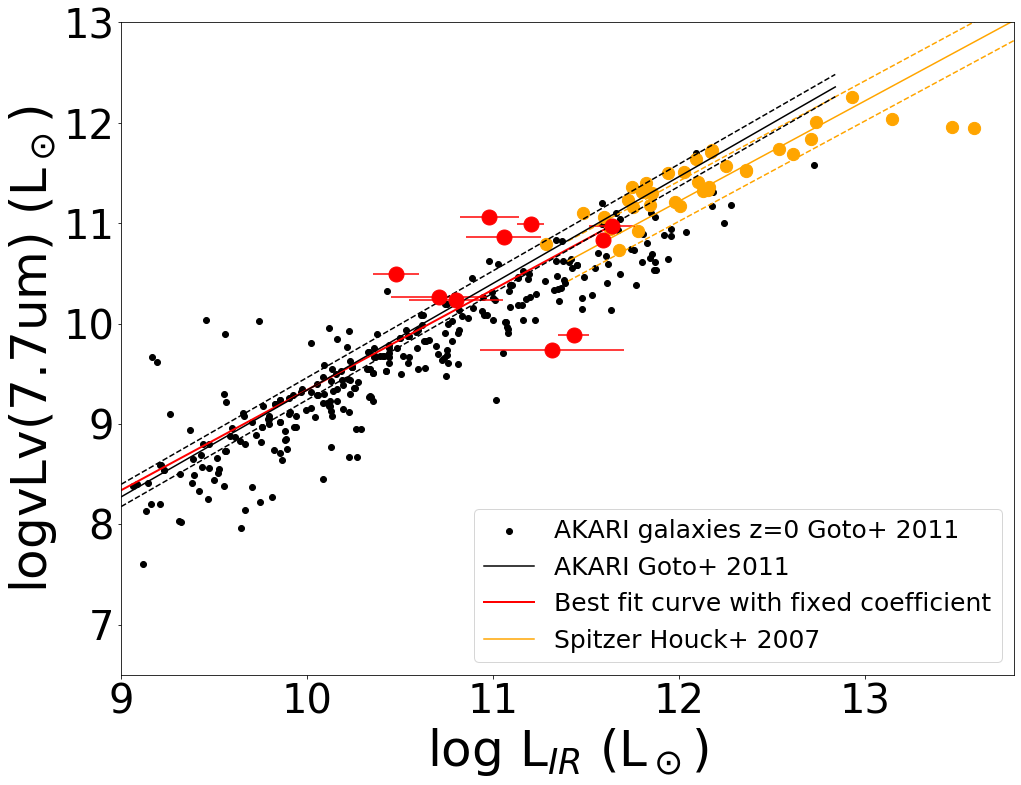

In [192]:
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)


# solid=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/solidline.csv')
# dash1=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/dashline1.csv')


line=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/line.csv')
dash2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/dashline2.csv')
redpoint=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/redpoint.csv')

dash2=dash2.drop(0,axis=0)
tomo=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/Tomo_AKARI.csv')

# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/results.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0926_ceers14_qpah/results.txt')
# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0926_ceers15_qpah/results.txt')
sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0817_ceers17_qpah/results.txt')
sedceers_dust=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0929_ceers16_qpah/results.txt')
# index=[59,64,66,72,113,136,178,187,218,225]
# good_fit=[0,1,2,3,4,6,8,9,10,11]

index=sedceers_2['id'][sedceers_2['best.reduced_chi_square']<6].values
good_fit=[sedceers_2[sedceers_2['id']==i].index.values[0] for i in index]

DL=cosmo.luminosity_distance(sedceers_2['best.universe.redshift'].iloc[good_fit].tolist()).value
# DL=[sedceers_2['best.universe.luminosity_distance'].iloc[good_fit[i]]*3.24e-23 for i in range(10)]

pah_luminosity=[]
for i,a in enumerate(good_fit):
    # myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/{str(a)}_best_model.fits')
    myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/0817_ceers17_qpah/{str(index[i])}_best_model.fits')
    data=myfile[1].data
    wl=data['wavelength']
    flux=data['Fnu']
    peak=[]
    for j,b in enumerate(wl):
        if i >9:
            if (b > 10000) & (b<15000):
                peak.append(flux[j])
        else:
            if (b > 10000) & (b<20000):
                 peak.append(flux[j])
    # print(np.max(peak))
    fd=np.max(peak)
    # print(fd)
    energy=fd*(10**-3)*(9*10**7)*(DL[i]**2)/7.7
    pah_luminosity.append(energy)
    
pah_lu_err=[]
for i in pah_luminosity:
    pah_lu_err.append(1/10/np.log(10))
# peak=np.max(flux[])
# plt.scatter(wl,flux)
# plt.xlim([1000,20000])
# plt.ylim([0.0001,0.1])
# plt.yscale('log')
plt.figure(figsize=(16,12))
# plt.scatter(np.log10(sedceers_2['best.dust.luminosity'].iloc[good_fit]*2.613*10**-27),np.log10(pah_luminosity),label='JWST (our work)',color='red')
# plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='r',label='PAH selected ')

plt.errorbar(np.log10(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27),np.log10(pah_luminosity),
yerr=pah_lu_err,xerr=(sedceers_2['bayes.dust.luminosity_err'].iloc[good_fit]/sedceers_2['bayes.dust.luminosity'].iloc[good_fit]/np.log(10)),fmt='o',markersize=15,label='JWST z$\sim$1 (our work)',color='red')
# plt.scatter(1+np.log10(ceers['jwst.miri.F1500W'].iloc[index]*(10**-3)*(9*10**7)*(DL[i].value**2)/15),np.log10(pah_luminosity),label='JWST')

x=np.linspace(9,13.8,1000)
y=x-0.78
# yfit=func1(popt, x)
print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)

plt.plot(x[:550],fixed_slope*x[:550]+intercept, 'r', lw=2, label='Best fit curve with fixed coefficient')
# plt.plot(x[:550],fixed_slope*x[:550]+intercept+intercept_error, '--',c='r', lw=2)
# plt.plot(x[:550],fixed_slope*x[:550]+intercept-intercept_error, '--',c='r', lw=2)
# plt.plot(x[:550],popt_cons[1]*x[:550]+popt_cons[0],'--',c='red',label='Best fit curve with fixed coefficient')
# plt.plot(x[:550],popt[0]*x[:550]+popt[1], 'r', lw=2, label='Best fit curve with free parameters')
# print(popt_cons)
# print(popt)
plt.plot(x[500:],y[500:],color='orange',label='Spitzer Houck+ 2007')
plt.plot(x[500:],y[500:]+0.2,'--',color='orange')
plt.plot(x[500:],y[500:]-0.2,'--',color='orange')
plt.scatter(tomo['Point'],tomo['x'],c='black',label='AKARI galaxies z=0 Goto+ 2011')
plt.plot(x[:800],x[:800]/0.94-np.log10(20),c='black',label='AKARI Goto+ 2011')
plt.plot(x[:800],x[:800]/0.94-np.log10(25),'--',c='black')
plt.plot(x[:800],x[:800]/0.94-np.log10(15),'--',c='black')
# plt.plot(x[:800],x[:800]/0.94-np.log10(10),'--',c='black')
# plt.plot(x[:800],x[:800]/0.94-np.log10(5),'--',c='black')
# plt.plot(x,0.95*x+1.5,c='cyan',label='Pope+ 2008')

plt.scatter(dash2['x'],dash2['point2'],s=150,color='orange',label='AKARI PAH galaxies z>1 Takagi+ 2010')
#plt.scatter(redpoint['x'],redpoint['Curve1'],label='PAH-selected galaxies z>0.5 by AKARI',color='green')

# plt.legend(fontsize=25)
plt.xlabel('log L$_{IR}$ (L$_\odot$)',fontsize=50)
plt.ylabel('logvLv(7.7um) (L$_\odot$)',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

handles, labels = plt.gca().get_legend_handles_labels()
# order = [5,4,3,0,1,2]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25,loc=4)

order = [3,2,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25,loc=4)

plt.xlim([9,13.8])
plt.ylim(6.5,13)
# plt.savefig('IR_L_to_pah_L_0130.png')
# plt.savefig('IR_L_to _pah_L_0821.png')
# plt.savefig('LIR_to_LPAH_thesis_0110.png')

In [32]:
ceers[['jwst.miri.F1000W','jwst.miri.F1500W']].iloc[index]

jwst.miri.F1000W  jwst.miri.F1500W
59           0.003096          0.037548
64           0.000745          0.007204
66           0.010002          0.118253
72           0.002355          0.028602
113          0.004820          0.036804
136          0.010093          0.078931
178          0.006696          0.044307
187          0.006375          0.048550
218          0.001666          0.019465
225          0.000872          0.010224

In [45]:
energy_15=[ceers['jwst.miri.F1500W'].iloc[index].iloc[i]*10**-3*(9*10**7)*(DL[i]**2)/7.7 for i in range(len(good_fit))]
energy_10=[ceers['jwst.miri.F1000W'].iloc[index].iloc[i]*10**-3*(9*10**7)*(DL[i]**2)/7.7 for i in range(len(good_fit))]

In [72]:
Ha=2.8
Hb=1
Hpfa=0.0245
Hpfb=0.0158
Hhb=0.00649
Hh10_6=0.00310
Hh11_6=0.00238


Hratio=[Hpfa/Ha,Hhb/Ha,Hhb/Ha,Hh10_6/Ha,Hh11_6/Ha]

sfr= sedceers_2['bayes.sfh.sfr'].iloc[good_fit].tolist()
L_Ha=[i /(7.9*10**-42) for i in sfr]  ####### sfr to L_halpha
L_pah=[i * 3.846*10**33 for i in pah_luminosity]
L_15=[i * 3.846*10**33 for i in energy_15]
L_10=[i * 3.846*10**33 for i in energy_10]

ratio=[L_Ha[i]/L_pah[i] for i in range(len(L_Ha))]
ratio_L15=[L_Ha[i]/L_15[i] for i in range(len(L_Ha))]
ratio_L10=[L_Ha[i]/L_10[i] for i in range(len(L_Ha))]

def Percentage(H=0, ratio=ratio):
    return [H*j*100 for j in ratio]

P_Hpfa=Percentage(H=Hratio[0], ratio=ratio_L15)
P_Hhb=Percentage(H=Hratio[1], ratio=ratio_L15)
P_Hpfb=Percentage(H=Hratio[2],ratio=ratio_L10)
P_Hh106=Percentage(H=Hratio[3],ratio=ratio_L10)
P_Hh116=Percentage(H=Hratio[4],ratio=ratio_L10)

In [73]:
print('Pfund alpha: '+ str(np.min(P_Hpfa)) , str(np.max(P_Hpfa)))
print('Humphreys beta: '+ str(np.min(P_Hhb)) , str(np.max(P_Hhb)))
print('Pfund beta: '+ str(np.min(P_Hpfb)) , str(np.max(P_Hpfb)))
print('Humphreys 10-6: '+ str(np.min(P_Hh106)) , str(np.max(P_Hh106)))
print('Humphreys 11-6: '+ str(np.min(P_Hh116)) , str(np.max(P_Hh116)))


Pfund alpha: 0.006931115936959921 0.7734864389899908
Humphreys beta: 0.0018360384665661181 0.20489497914469554
Pfund beta: 0.014358021443271958 2.4012993003540446
Humphreys 10-6: 0.006858222877371812 1.1469996658085573
Humphreys 11-6: 0.005265345305853198 0.880599743427215


In [71]:
from astropy import constants as const

# Define the Balmer-Rydberg constant
Rydberg_constant = const.Ryd

# Define the principal quantum numbers for the transition
n1 = 10  # Initial energy level
n2 = 6  # Final energy level

# Calculate the vacuum wavelength using the Balmer-Rydberg formula
vacuum_wavelength_nm = 1 / (Rydberg_constant * (1/n1**2 - 1/n2**2)) 
print(vacuum_wavelength_nm)

print(f"Vacuum Wavelength of Pfund alpha: {vacuum_wavelength_nm.to('um').value:.3f} um")

-5.125877159363378e-06 m
Vacuum Wavelength of Pfund alpha: -5.126 um


0     5.080812e+10
1     4.202000e+11
2     3.766478e+11
3     3.101134e+10
4     1.315532e+11
6     7.834322e+10
8     4.918197e+11
9     1.757836e+11
10    3.225093e+10
11    2.451277e+11
Name: best.dust.luminosity, dtype: float64
0     5.119035e+10
1     2.072470e+11
2     3.892805e+11
3     2.990639e+10
4     1.139137e+11
6     9.546449e+10
8     4.350310e+11
9     1.588970e+11
10    6.303276e+10
11    2.704151e+11
Name: bayes.dust.luminosity, dtype: float64


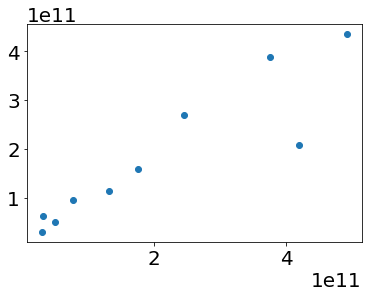

In [29]:
plt.scatter(sedceers_2['best.dust.luminosity'].iloc[good_fit]*2.613*10**-27,sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27)
print(sedceers_2['best.dust.luminosity'].iloc[good_fit]*2.613*10**-27)
print(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27)

In [187]:
from scipy.optimize import curve_fit
# xf =np.log10(x)
# yf = np.log10(y)

# print(np.polyfit(xf, yf, 1))

popt, _ = curve_fit(func1, xf, yf)
print(popt)

popt[0],popt[1]=popt[1],popt[0]
print(popt)

popt_cons, _ = curve_fit(func1, xf[:-1], yf[:-1], bounds=([-np.inf, 0.999,], [np.inf, 1.001]))
print(popt_cons)

# xnew = np.linspace(xf[0], xf[-1], 1000)
x0=np.linspace(9,13.8,1000)
plt.plot(x0,func1(x0,*popt_cons),c='red',label='Fixxed coeffient')

NameError: name 'func1' is not defined

fit parameter 1-sigma error
———————————–
3.0475209918999715 +- 2.9083585121751803
-24.20705823046829 +- 33.432722087714154


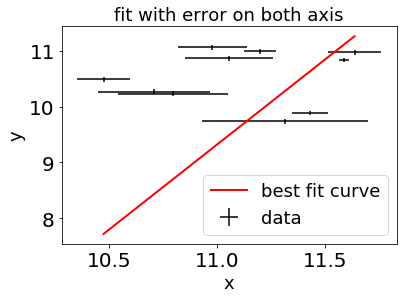

In [188]:
import numpy as np
from pylab import *
from scipy.optimize import curve_fit
from scipy import odr

def func(p, x):

    a, b = p
    return a * x  + b 

# Model object
quad_model = odr.Model(func)


pah_lu_err=[]
for i in pah_luminosity:
    pah_lu_err.append(1/10/np.log(10))
# test data and error
# x0 = np.linspace(-10, 10, 100)
# y0 = - 0.07 * x0 * x0 + 0.5 * x0 + 2.
noise_x = (sedceers_2['bayes.dust.luminosity_err'].iloc[good_fit]/sedceers_2['bayes.dust.luminosity'].iloc[good_fit]/np.log(10))
noise_y = pah_lu_err
x = np.log10(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27)
y = np.log10(pah_luminosity)

np.log10(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27),np.log10(pah_luminosity)
# Create a RealData object
data = odr.RealData(x, y, sx=noise_x, sy=noise_y)

# Set up ODR with the model and data.
odr = odr.ODR(data, quad_model, beta0=[0,0])

# Run the regression.
out = odr.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('fit parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))

# prepare confidence level curves

nstd = 1.
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

x_fit = np.linspace(min(x), max(x), 100)
fit = func(popt, x_fit)
fit_up = func(popt_up, x_fit)
fit_dw= func(popt_dw, x_fit)
# print((fit[-1]-fit[0])/(x_fit[-1]-x_fit[0]))
#plot
fig, ax = plt.subplots(1)
rcParams['font.size']= 20
errorbar(x, y, yerr=noise_y, xerr=noise_x, hold=True, ecolor='k', fmt='none', label='data')
xlabel('x', fontsize=18)
ylabel('y', fontsize=18)
title('fit with error on both axis', fontsize=18)
plot(x_fit, fit, 'r', lw=2, label='best fit curve')
# plot(x, y, 'o', lw=2, label='True curve')
# ax.fill_between(x_fit, fit_up, fit_dw, alpha=.25, label='1-sigma interval')
legend(loc='lower right',fontsize=18)
show()

<ErrorbarContainer object of 3 artists>

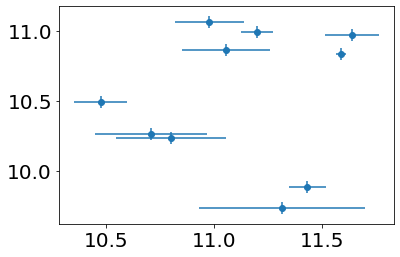

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

# Generating example data
noise_x = (sedceers_2['bayes.dust.luminosity_err'].iloc[good_fit]/sedceers_2['bayes.dust.luminosity'].iloc[good_fit]/np.log(10))
noise_y = pah_lu_err
x = np.log10(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27)
y = np.log10(pah_luminosity)


x = np.array(x)
y = np.array(y)
x_error =  np.array(noise_x)
y_error = np.array(noise_y)

x_error =  np.array(noise_x)
y_error = np.array(noise_y)
# Define the model for the regression (linear model: y = a*x + b)
def linear_model(B, x):
    return B[0] * x + B[1]

# Create a Data object with x and y data, and corresponding x and y errors
data = odr.RealData(x, y, sx=x_error, sy=y_error)

# Create a Model object with the linear model function
model = odr.Model(linear_model)

# Perform the orthogonal distance regression
odr_result = odr.ODR(data, model, beta0=[1, 0]).run()

# Extract the parameters and their standard errors
fitted_params = odr_result.beta
param_errors = odr_result.sd_beta

# Plotting
plt.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', label='Data with Error Bars')

In [41]:
sedceers_2['best.universe.redshift'].iloc[good_fit]
x,x[1:-1]

(array([10.70918808, 11.31648818, 11.59026262, 10.47576392, 11.0565758 ,
        10.97984186, 11.6385202 , 11.2011156 , 10.79956632, 11.43203096]),
 array([11.31648818, 11.59026262, 10.47576392, 11.0565758 , 10.97984186,
        11.6385202 , 11.2011156 , 10.79956632]))

In [44]:
noise_x

0     0.259256
1     0.385581
2     0.022333
3     0.122759
4     0.203010
6     0.160818
8     0.124344
9     0.074251
10    0.254617
11    0.085383
dtype: float64

In [43]:
noise_x[1:-1]

1     0.385581
2     0.022333
3     0.122759
4     0.203010
6     0.160818
8     0.124344
9     0.074251
10    0.254617
dtype: float64

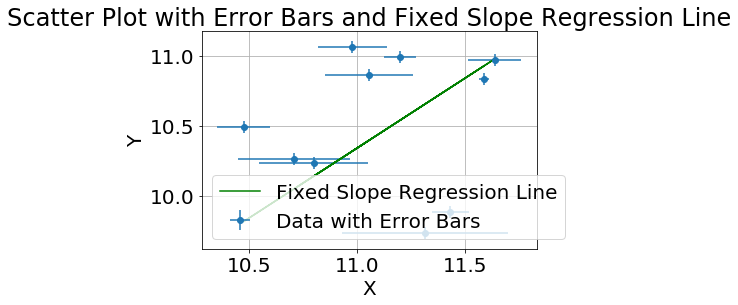

Fixed Slope: 1.0
Intercept: -0.6606243270151655
Intercept Error: 0.14900067815943535


In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import odr

# Generating example data
noise_x = (sedceers_2['bayes.dust.luminosity_err'].iloc[good_fit]/sedceers_2['bayes.dust.luminosity'].iloc[good_fit]/np.log(10))
noise_y = pah_lu_err
x = np.log10(sedceers_2['bayes.dust.luminosity'].iloc[good_fit]*2.613*10**-27)
y = np.log10(pah_luminosity)


x = np.array(x)
y = np.array(y)
x_error =  np.array(noise_x)
y_error = np.array(noise_y)


# Define the model for the regression (linear model: y = a*x + b)
def fixed_slope_model(B, x, fixed_slope):
    return fixed_slope * x + B[0]

# Create a Data object with x and y data, and corresponding x and y errors
data = odr.RealData(x, y, sx=x_error, sy=y_error)

# Create a Model object with the custom fixed slope model function
fixed_slope = 1.0  # Set the fixed slope value here
model = odr.Model(fixed_slope_model, extra_args=(fixed_slope,))

# Perform the orthogonal distance regression
odr_result = odr.ODR(data, model, beta0=[0]).run()

# Extract the intercept parameter and its standard error
intercept = odr_result.beta[0]
intercept_error = odr_result.sd_beta[0]

# Plotting
plt.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o', label='Data with Error Bars')
plt.plot(x, fixed_slope * x + intercept, 'g', label='Fixed Slope Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Error Bars and Fixed Slope Regression Line')
plt.legend()
plt.grid(True)
plt.show()

print("Fixed Slope:", fixed_slope)
print("Intercept:", intercept)
print("Intercept Error:", intercept_error)


In [468]:
ceers[ceers['jwst.miri.F1500W_err']>0]

redshift  jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
1       3.808         0.000242             0.000020          0.000363   
2       1.700         0.000225             0.000020          0.000398   
9       1.333         0.112373             0.000020          0.608629   
13      0.715         0.001758             0.000020          0.002002   
14      1.031         0.001035             0.000020          0.000983   
..        ...              ...                  ...               ...   
334     2.610         0.000200            -0.000025          0.000398   
335       NaN         0.000200            -0.000025          0.000398   
336     0.901         0.000200            -0.000025          0.000398   
337       NaN         0.000200            -0.000025          0.000398   
338       NaN         0.000200            -0.000025          0.000398   

     jwst.miri.F1000W_err  jwst.miri.F1500W  jwst.miri.F1500W_err  \
1                0.000047          0.000663              0.000139   
2               -0.000047          0.000476              0.000139   
9                0.000047          0.529716              0.000139   
13               0.000047          0.002051              0.000139   
14               0.000047          0.002923              0.000139   
..                    ...               ...                   ...   
334             -0.000047          0.000511              0.000139   
335             -0.000047          0.005700              0.000142   
336             -0.000047          0.000846              0.000142   
337             -0.000047          0.000249              0.000143   
338             -0.000047          0.000465              0.000142   

     jwst.miri.F1280W  jwst.miri.F1280W_err  jwst.miri.F1800W  ...   F15_F10  \
1            0.000472              0.000091          0.003981  ...  0.261291   
2            0.000668              0.000091          0.003981  ...  0.078172   
9            0.620413              0.000091          0.928680  ... -0.060310   
13           0.002228              0.000091          0.006007  ...  0.010363   
14           0.000643              0.000091          0.006752  ...  0.473156   
..                ...                   ...               ...  ...       ...   
334          0.000794             -0.000094          0.003981  ...  0.108208   
335          0.000794             -0.000094          0.003981  ...  1.156027   
336          0.000794             -0.000094          0.003981  ...  0.327577   
337          0.000794             -0.000094          0.003981  ... -0.203191   
338          0.000794             -0.000094          0.003981  ...  0.067433   

     F10_F7_err  F15_F10_err    F12_F7   F15_F12  F12_F7_err  F15_F12_err  \
1      0.091548     0.147577  0.290732  0.147654    0.118944     0.174973   
2      0.089313     0.178120  0.472608 -0.146630    0.097023     0.185830   
9      0.000109     0.000148  0.742020 -0.068638    0.000139     0.000178   
13     0.015065     0.039665  0.102946 -0.036012    0.022600     0.047200   
14     0.029019     0.041469 -0.207081  0.657930    0.069742     0.082192   
..          ...          ...       ...       ...         ...          ...   
334    0.105791     0.169728  0.598791 -0.191730    0.105702     0.169639   
335    0.105791     0.062359  0.598791  0.856090    0.105702     0.062270   
336    0.105791     0.124618  0.598791  0.027640    0.105702     0.124529   
337    0.105791     0.299781  0.598791 -0.503128    0.105702     0.299692   
338    0.105791     0.184620  0.598791 -0.232504    0.105702     0.184531   

      F18_F15   F21_F15   F21_F18  
1    0.778561  1.178569  0.400008  
2    0.921938  1.321945  0.400008  
9    0.243823  0.108020 -0.135803  
13   0.466750  0.573360  0.106611  
14   0.363590  0.330218 -0.033372  
..        ...       ...       ...  
334  0.891901  1.291909  0.400008  
335 -0.155918  0.244090  0.400008  
336  0.672532  1.072539  0.400008  
337  1.203300  1.603308  0.400008  
338  0.932676  1.

In [466]:
sedceers_dust[['best.universe.redshift','best.dust.luminosity','best.dust.mass','bayes.dust.luminosity','bayes.dust.luminosity_err']].iloc[good_fit]
sedceers_dust['bayes.dust.luminosity_err']/sedceers_dust['best.dust.luminosity'].iloc[good_fit]/np.log(10)

0     0.080809
1     2.246031
2     0.021374
3     0.187179
4     1.667093
5          NaN
6     0.031886
7          NaN
8     0.383931
9     0.026792
10    0.303376
11    0.067596
12         NaN
dtype: float64

In [5]:
ceers_z=[0 for i in range(403)]

sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_2/results.txt')
sedceers_20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_20/results.txt')
for i in range(len(sedceers_2)):
    if sedceers_20['best.universe.redshift'].iloc[i]>2:
        ceers_z[i]=sedceers_20['best.universe.redshift'].iloc[i]
    else:
        ceers_z[i]=sedceers_2['best.universe.redshift'].iloc[i]

(array([139.,  16.,  51.,  36.,  25.,  48.,  31.,  25.,  12.,  20.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

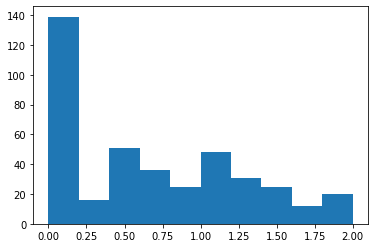

In [19]:
plt.hist(sedceers_2['best.universe.redshift'])

In [52]:
sed002=pd.read_csv('/home/leolin/Desktop/MIRI_SED/0823_002sed/results.txt')
sed006=pd.read_csv('/home/leolin/Desktop/MIRI_SED/0823_006sed/results.txt')

ob002=pd.read_csv('/home/leolin/Desktop/MIRI_SED/0823_002sed/observations.txt')
ob006=pd.read_csv('/home/leolin/Desktop/MIRI_SED/0823_006sed/observations.txt')

sedceers=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/z=0_20/results.txt')
obceers=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/z=0_20/observations.txt')

sedceers_pah=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0908_pah_nonebula/results.txt')
obceers_pah=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0908_pah_nonebula/observations.txt')

In [3]:
sedceers.columns[60:150]

Index(['bayes.noao.Ks_err', 'best.chi_square', 'best.reduced_chi_square',
       'best.agn.beta', 'best.agn.fracAGN', 'best.agn.gamma',
       'best.agn.opening_angle', 'best.agn.psy', 'best.agn.r_ratio',
       'best.agn.tau', 'best.attenuation.Av_BC', 'best.attenuation.Av_ISM',
       'best.attenuation.FUV', 'best.attenuation.V_B90', 'best.attenuation.mu',
       'best.attenuation.slope_BC', 'best.attenuation.slope_ISM',
       'best.dust.alpha', 'best.dust.gamma', 'best.dust.qpah',
       'best.dust.umean', 'best.dust.umin', 'best.param.restframe_FUV-NUV',
       'best.param.restframe_NUV-r_prime', 'best.sfh.age',
       'best.sfh.age_burst', 'best.sfh.age_main', 'best.sfh.f_burst',
       'best.sfh.tau_burst', 'best.sfh.tau_main', 'best.stellar.age_m_star',
       'best.stellar.imf', 'best.stellar.metallicity',
       'best.stellar.old_young_separation_age', 'best.universe.age',
       'best.universe.luminosity_distance', 'best.universe.redshift',
       'best.agn.agn_luminosity', 

(array([12., 15., 31., 26., 17., 20.,  8., 12.,  8., 11.]),
 array([9.65230465e-20, 4.99842206e-01, 9.99684412e-01, 1.49952662e+00,
        1.99936882e+00, 2.49921103e+00, 2.99905324e+00, 3.49889544e+00,
        3.99873765e+00, 4.49857986e+00, 4.99842206e+00]),
 <a list of 10 Patch objects>)

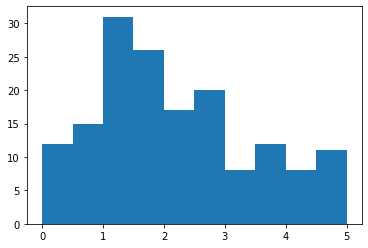

In [8]:
plt.hist(sedceers['best.reduced_chi_square'][sedceers['best.reduced_chi_square']<5])


In [69]:
obceers['F10_F7']=np.log10(obceers['jwst.miri.F1000W']/obceers['jwst.miri.F770W'])
obceers['F15_F10']=np.log10(obceers['jwst.miri.F1500W']/obceers['jwst.miri.F1000W'])
ceers['F10_F7']=np.log10(ceers['jwst.miri.F1000W']/ceers['jwst.miri.F770W'])
ceers['F15_F10']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F1000W'])

obceers['F10_F7_err']=(obceers['jwst.miri.F1000W_err']/obceers['jwst.miri.F1000W']/np.log(10))+(obceers['jwst.miri.F770W_err']/obceers['jwst.miri.F770W']/np.log(10))
obceers['F15_F10_err']=(obceers['jwst.miri.F1500W_err']/obceers['jwst.miri.F1500W']/np.log(10))+(obceers['jwst.miri.F1000W_err']/obceers['jwst.miri.F1000W']/np.log(10))
ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F15_F10_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))


x_pah=ceers['F10_F7'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
y_pah=ceers['F15_F10'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
x_all=ceers['F10_F7'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]
y_all=ceers['F15_F10'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]

x_pah_err=ceers['F10_F7_err'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
y_pah_err=ceers['F15_F10_err'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
x_all_err=ceers['F10_F7_err'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]
y_all_err=ceers['F15_F10_err'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]

# x_pah=obceers['F10_F7'][(obceers['F10_F7']>0.75)|(obceers['F15_F10']>0.8)]
# y_pah=obceers['F15_F10'][(obceers['F10_F7']>0.75)|(obceers['F15_F10']>0.8)]
# x_all=obceers['F10_F7'][(obceers['F10_F7']<0.75)&(obceers['F15_F10']<0.8)]
# y_all=obceers['F15_F10'][(obceers['F10_F7']<0.75)&(obceers['F15_F10']<0.8)]

# x_pah_err=obceers['F10_F7_err'][(obceers['F10_F7']>0.75)|(obceers['F15_F10']>0.8)]
# y_pah_err=obceers['F15_F10_err'][(obceers['F10_F7']>0.75)|(obceers['F15_F10']>0.8)]
# x_all_err=obceers['F10_F7_err'][(obceers['F10_F7']<0.75)&(obceers['F15_F10']<0.8)]
# y_all_err=obceers['F15_F10_err'][(obceers['F10_F7']<0.75)&(obceers['F15_F10']<0.8)]


(array([  1.,   2.,  16.,  30.,  47.,  74., 172.,  55.,   5.,   1.]),
 array([-1.06450167, -0.80796482, -0.55142797, -0.29489112, -0.03835427,
         0.21818258,  0.47471943,  0.73125628,  0.98779313,  1.24432998,
         1.50086682]),
 <a list of 10 Patch objects>)

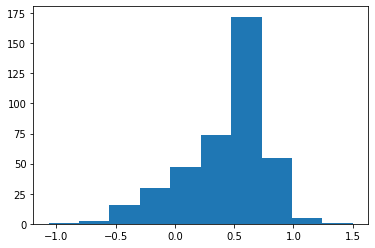

In [54]:
plt.hist(ceers['F12_F7'])

In [65]:
ceers.loc[x_pah.index]

redshift  jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
59      2.997         0.003452             0.000020          0.003096   
64      2.615         0.001204             0.000020          0.000745   
66      2.280         0.011925             0.000020          0.010002   
72      0.990         0.002932             0.000019          0.002355   
113     2.322         0.004703             0.000020          0.004820   
118     0.322         0.000282             0.000020          0.000195   
136     0.902         0.007931             0.000020          0.010093   
145     0.711         0.001228             0.000020          0.001200   
176       NaN         0.000066             0.000021          0.000398   
178     0.395         0.008136             0.000021          0.006696   
187     2.118         0.007384             0.000021          0.006375   
218     1.956         0.002486             0.000021          0.001666   
225     0.750         0.001021             0.000021          0.000872   
250     1.486         0.000689             0.000021          0.003982   
309       NaN         0.000200            -0.000025          0.008560   
310       NaN         0.000200            -0.000025          0.009876   
315       NaN         0.000200            -0.000025          0.003993   
316     1.356         0.000200            -0.000025          0.028381   
322       NaN         0.000200            -0.000025          0.014539   
323       NaN         0.000200            -0.000025          0.018477   
331       NaN         0.000200            -0.000025          0.000398   
335       NaN         0.000200            -0.000025          0.000398   

     jwst.miri.F1000W_err  jwst.miri.F1500W  jwst.miri.F1500W_err  \
59               0.000047          0.037548              0.000139   
64               0.000047          0.007204              0.000139   
66               0.000047          0.118253              0.000139   
72               0.000047          0.028602              0.000139   
113              0.000047          0.036804              0.000139   
118              0.000047          0.001259             -0.000142   
136              0.000047          0.078931              0.000139   
145              0.000047          0.009567              0.000139   
176             -0.000047          0.001259             -0.000142   
178              0.000046          0.044307              0.000142   
187              0.000046          0.048550              0.000142   
218              0.000046          0.019465              0.000143   
225              0.000046          0.010224              0.000142   
250              0.000046          0.003244              0.000143   
309              0.000047          0.001259             -0.000142   
310              0.000047          0.006019              0.000139   
315              0.000046          0.001259             -0.000142   
316              0.000046          0.001259             -0.000142   
322              0.000046          0.011306              0.000142   
323              0.000046          0.012396              0.000142   
331             -0.000047          0.004720              0.000139   
335             -0.000047          0.005700              0.000142   

     jwst.miri.F1280W  jwst.miri.F1280W_err  jwst.miri.F1800W  ...  noao.Ks  \
59           0.023652              0.000091          0.031136  ...   -0.099   
64           0.003456              0.000091          0.005970  ...   -0.099   
66           0.050012              0.000091          0.099520  ...   -0.099   
72           0.013922              0.000091          0.029403  ...   -0.099   
113          0.013585              0.000091          0.003981  ...   -0.099   
118          0.000794             -0.000094          0.003981  ...   -0.099   
136          0.028720              0.000091          0.146535  ...   -0.099   
145          0.007487              0.000091          0.003879  ...   -0.099   
176          0.000794     

In [70]:
len(x_pah),len(x_pah_err),len(y_pah),len(y_pah_err)
print(y_pah,y_pah_err)
print(len(x_pah),len(x_pah_err),len(y_pah),len(y_pah_err),len(x_all),len(x_all_err),len(y_all),len(y_all_err))

59     1.083728
64     0.985556
66     1.072726
72     1.084330
113    0.882864
118    0.810096
136    0.893213
145    0.901422
176    0.500143
178    0.820630
187    0.881705
218    1.067582
225    1.068915
250   -0.088985
309   -0.832434
310   -0.215034
315   -0.501221
316   -1.353001
322   -0.109252
323   -0.173342
331    1.074069
335    1.156027
Name: F15_F10, dtype: float64 59     0.008216
64     0.035920
66     0.002556
72     0.010814
113    0.005880
118    0.154454
136    0.002795
145    0.023378
176    0.100660
178    0.004382
187    0.004419
218    0.015204
225    0.029033
250    0.024127
309    0.051543
310    0.012108
315    0.054175
316    0.049862
322    0.006852
323    0.006074
331    0.064311
335    0.062359
Name: F15_F10_err, dtype: float64
22 22 22 22 381 381 381 381


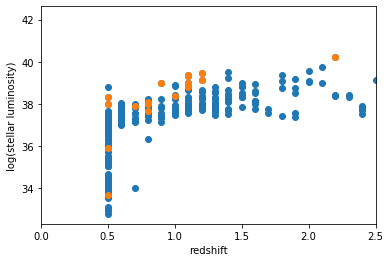

In [78]:
plt.plot(sedceers['best.universe.redshift'],np.log10(sedceers['best.stellar.lum']),'o')
plt.plot(sedceers['best.universe.redshift'].loc[x_pah.index],np.log10(sedceers['best.stellar.lum'].loc[x_pah.index]),'o')
# plt.xlabel('redshift')
# plt.ylabel('log(stellar luminosity)')
plt.xlim([0,2.5])
# plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(stellar luminosity)')
plt.savefig('z_stellar_luminosity.png')
# plt.ylabel('log')

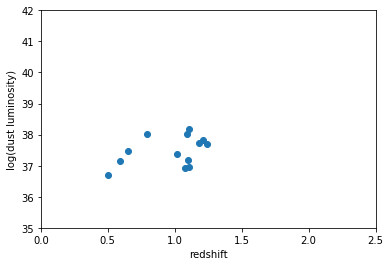

In [128]:
plt.plot(sedceers_2['best.universe.redshift'],np.log10(sedceers_2['best.dust.luminosity']),'o')
# plt.plot(sedceers_2['best.universe.redshift'].loc[x_pah.index],np.log10(sedceers_2['best.dust.luminosity'].loc[x_pah.index]),'o')
plt.xlim([0,2.5])
plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(dust luminosity)')
plt.savefig('z_dust_luminosity_1120.png')
# plt.ylabel('log')

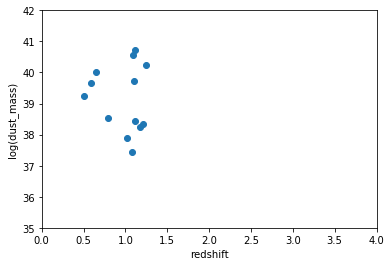

In [130]:
plt.plot(sedceers_2['best.universe.redshift'],np.log10(sedceers_2['best.dust.mass']),'o')
# plt.plot(sedceers['best.universe.redshift'].loc[x_pah.index],np.log10(sedceers['best.dust.mass'].loc[x_pah.index]),'o')

plt.xlim([0,4])
plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(dust_mass)')
plt.savefig('z_dust_mass_1120.png')
# plt.ylabel('log')

In [28]:
ceers[(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]

redshift  jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
59      2.997         0.003452             0.000020          0.003096   
64      2.615         0.001204             0.000020          0.000745   
66      2.280         0.011925             0.000020          0.010002   
72      0.990         0.002932             0.000019          0.002355   
113     2.322         0.004703             0.000020          0.004820   
118     0.322         0.000282             0.000020          0.000195   
136     0.902         0.007931             0.000020          0.010093   
145     0.711         0.001228             0.000020          0.001200   
176       NaN         0.000066             0.000021          0.000398   
178     0.395         0.008136             0.000021          0.006696   
187     2.118         0.007384             0.000021          0.006375   
218     1.956         0.002486             0.000021          0.001666   
225     0.750         0.001021             0.000021          0.000872   
250     1.486         0.000689             0.000021          0.003982   
309       NaN         0.000200            -0.000025          0.008560   
310       NaN         0.000200            -0.000025          0.009876   
315       NaN         0.000200            -0.000025          0.003993   
316     1.356         0.000200            -0.000025          0.028381   
322       NaN         0.000200            -0.000025          0.014539   
323       NaN         0.000200            -0.000025          0.018477   
331       NaN         0.000200            -0.000025          0.000398   
335       NaN         0.000200            -0.000025          0.000398   

     jwst.miri.F1000W_err  jwst.miri.F1500W  jwst.miri.F1500W_err  \
59               0.000047          0.037548              0.000139   
64               0.000047          0.007204              0.000139   
66               0.000047          0.118253              0.000139   
72               0.000047          0.028602              0.000139   
113              0.000047          0.036804              0.000139   
118              0.000047          0.001259             -0.000142   
136              0.000047          0.078931              0.000139   
145              0.000047          0.009567              0.000139   
176             -0.000047          0.001259             -0.000142   
178              0.000046          0.044307              0.000142   
187              0.000046          0.048550              0.000142   
218              0.000046          0.019465              0.000143   
225              0.000046          0.010224              0.000142   
250              0.000046          0.003244              0.000143   
309              0.000047          0.001259             -0.000142   
310              0.000047          0.006019              0.000139   
315              0.000046          0.001259             -0.000142   
316              0.000046          0.001259             -0.000142   
322              0.000046          0.011306              0.000142   
323              0.000046          0.012396              0.000142   
331             -0.000047          0.004720              0.000139   
335             -0.000047          0.005700              0.000142   

     jwst.miri.F1280W  jwst.miri.F1280W_err  jwst.miri.F1800W  ...  noao.Ks  \
59           0.023652              0.000091          0.031136  ...   -0.099   
64           0.003456              0.000091          0.005970  ...   -0.099   
66           0.050012              0.000091          0.099520  ...   -0.099   
72           0.013922              0.000091          0.029403  ...   -0.099   
113          0.013585              0.000091          0.003981  ...   -0.099   
118          0.000794             -0.000094          0.003981  ...   -0.099   
136          0.028720              0.000091          0.146535  ...   -0.099   
145          0.007487              0.000091          0.003879  ...   -0.099   
176          0.000794     

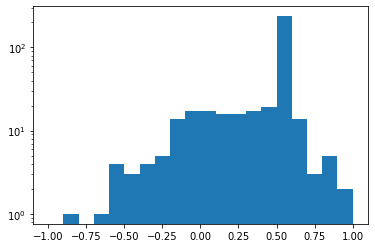

In [285]:
plt.hist(ceers['F15_F10'],bins=np.linspace(-1,1,21))
plt.yscale('log')

In [279]:
xlo=[0 for i in range(22)]
lo=[0 for i in range(22)]
for i,a in enumerate(ceers['jwst.miri.F770W_err'].loc[x_pah.index]<0):
    if a ==True:
        xlo[i]=1

for i,a in enumerate(ceers['jwst.miri.F1000W_err'].loc[x_pah.index]<0):
    if a ==True:
        lo[i]=1
        
print(xlo,lo)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1] [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


In [55]:
sedceers_2

id  bayes.sfh.sfr  bayes.sfh.sfr_err  bayes.sfh.sfr100Myrs  \
0    59      84.591575          18.280883             21.896588   
1    64      20.078704          33.229946              8.048703   
2    66      50.020239           2.547371             49.864298   
3    72       5.202172           1.735801              5.250542   
4   113      15.885379          74.342424              8.625973   
5   118       6.169703           1.411212              1.554606   
6   136      21.906236           1.997378             21.865687   
7   145       5.095659           3.662377              4.570168   
8   178      21.525596          18.427742             21.537558   
9   187      24.561738           1.992586             24.531597   
10  218       8.359453           4.972829              8.243532   
11  225      79.855214          13.448229             16.699271   
12  250      26.907500           1.788013              4.493057   

    bayes.sfh.sfr100Myrs_err  bayes.sfh.sfr10Myrs  bayes.sfh.sfr10Myrs_err  \
0                   3.227474            85.391306                18.501048   
1                   5.288812            20.217299                33.582013   
2                   2.493215            50.006294                 2.537561   
3                   1.567311             5.207203                 1.734710   
4                   7.795799            15.986716                75.172984   
5                   0.128111             6.221503                 1.426823   
6                   1.600873            21.903299                 2.002077   
7                   1.012095             5.102648                 3.699926   
8                  17.737700            21.526888                18.365903   
9                   1.721341            24.559636                 1.993932   
10                  4.703248             8.349115                 4.948685   
11                  1.937384            80.614689                13.570892   
12                  0.289527            27.182695                 1.785139   

    bayes.IRAC1  bayes.IRAC1_err  bayes.IRAC2  ...  best.cfht.megacam.z  \
0      0.010622         0.000889     0.008385  ...             0.008458   
1      0.003371         0.000125     0.002590  ...             0.002127   
2      0.026198         0.000525     0.024352  ...             0.001474   
3      0.007273         0.000207     0.006060  ...             0.001691   
4      0.010211         0.000302     0.008364  ...             0.001169   
5      0.001655         0.000057     0.001209  ...             0.002522   
6      0.015855         0.000516     0.014283  ...             0.002948   
7      0.005708         0.000192     0.003927  ...             0.003519   
8      0.014195         0.000712     0.013826  ...             0.000943   
9      0.014622         0.000340     0.013884  ...             0.001386   
10     0.005477         0.000134     0.004677  ...             0.001062   
11     0.004573         0.000190     0.003038  ...             0.002406   
12     0.004418         0.000126     0.002946  ...             0.005857   

    best.hst.wfc.F606W  best.hst.wfc.F814W  best.hst.wfc3.F125W  \
0             0.002220            0.006232             0.009264   
1             0.000890            0.001585             0.002420   
2             0.000159            0.000848             0.004441   
3             0.000442            0.001107             0.003193   
4             0.000184            0.000757             0.002710   
5             0.001889            0.002530             0.002545   
6             0.000820            0.001921             0.005762   
7             0.001449            0.003143             0.004955   
8             0.000157            0.000578             0.003032   
9             0.000249            0.000842             0.003707   
10            0.000231            0.000682             0.002027   
11            0.000914            0.002103             0.003947   
12            0.003157            0.005825         

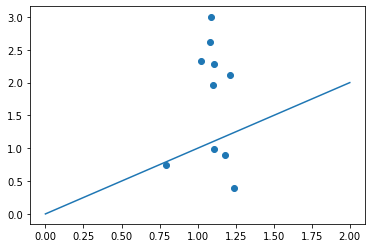

In [57]:
x=sedceers_2['best.universe.redshift'][(sedceers_2['best.reduced_chi_square']>0)&(sedceers_2['best.reduced_chi_square']<9)]



y=ceers['redshift'].iloc[sedceers_2['id'][(sedceers_2['best.reduced_chi_square']>0)&(sedceers_2['best.reduced_chi_square']<9)].values]
plt.scatter(x,y)
plt.plot([0,2],[0,2])


In [241]:
ceers['F21_F15']=np.log10(ceers['jwst.miri.F2100W']/ceers['jwst.miri.F1500W'])
ceers['F21_F15_err']=(np.abs(ceers['jwst.miri.F2100W_err'])/ceers['jwst.miri.F2100W']/np.log(10))+(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))


/home/leolin/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


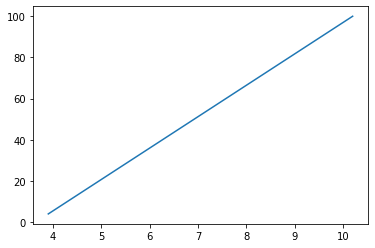

In [20]:
plt.plot([10.2,3.9],[100,3.9])

In [176]:
ceers[col].iloc[index]

jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
59          0.003452             0.000300          0.003096   
64          0.001204             0.000106          0.000745   
66          0.011925             0.001033          0.010002   
72          0.002932             0.000255          0.002355   
113         0.004703             0.000408          0.004820   
136         0.007931             0.000687          0.010093   
178         0.008136             0.000705          0.006696   
187         0.007384             0.000640          0.006375   
218         0.002486             0.000216          0.001666   
225         0.001021             0.000091          0.000872   

     jwst.miri.F1000W_err  jwst.miri.F1280W  jwst.miri.F1280W_err  \
59               0.000328          0.023652              0.002876   
64               0.000091          0.003456              0.000430   
66               0.001051          0.050012              0.006080   
72               0.000252          0.013922              0.001695   
113              0.000508          0.013585              0.001654   
136              0.001061          0.028720              0.003492   
178              0.000704          0.020886              0.002541   
187              0.000671          0.018661              0.002270   
218              0.000181          0.010175              0.001240   
225              0.000103          0.004504              0.000556   

     jwst.miri.F1500W  jwst.miri.F1500W_err  jwst.miri.F1800W  \
59           0.037548              0.003916          0.031136   
64           0.007204              0.000764          0.005970   
66           0.118253              0.012326          0.099520   
72           0.028602              0.002984          0.029403   
113          0.036804              0.003839          0.211840   
136          0.078931              0.008228          0.146535   
178          0.044307              0.004620          0.094339   
187          0.048550              0.005062          0.108598   
218          0.019465              0.002034          0.016741   
225          0.010224              0.001075          0.006996   

     jwst.miri.F1800W_err  jwst.miri.F2100W  jwst.miri.F2100W_err  
59               0.004391          0.014408              0.001943  
64               0.000905          0.010116              0.001485  
66               0.013997          0.015864              0.002104  
72               0.004148          0.007394              0.001227  
113              0.029788          0.057720              0.007078  
136              0.020606          0.033048              0.004110  
178              0.013269          0.028735              0.003603  
187              0.015273          0.030709              0.003837  
218              0.002378          0.003562              0.000961  
225              0.001040          0.014321              0.001931

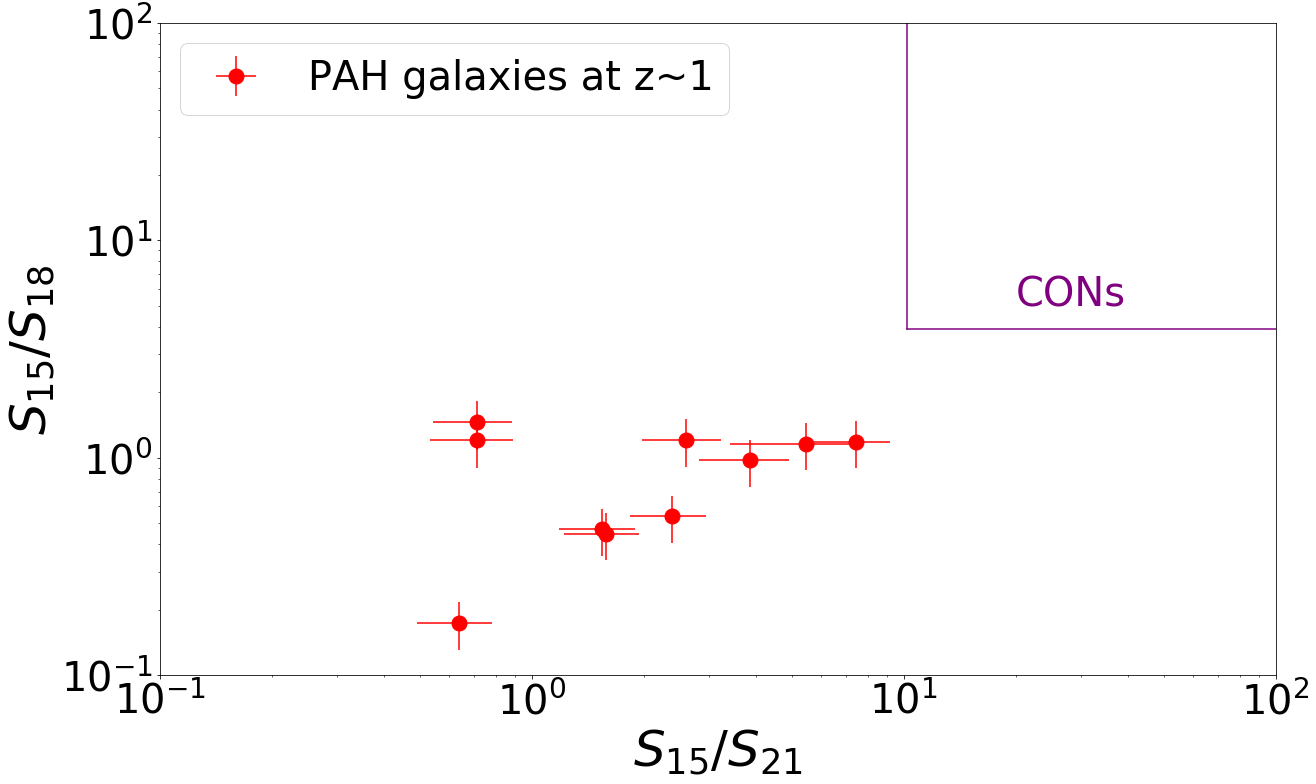

In [51]:
x=ceers['jwst.miri.F1500W'].iloc[index]/ceers['jwst.miri.F2100W'].iloc[index]
y=ceers['jwst.miri.F1500W'].iloc[index]/ceers['jwst.miri.F1800W'].iloc[index]
x_err=(ceers['jwst.miri.F1500W_err'].iloc[index]/ceers['jwst.miri.F1500W'].iloc[index]+ceers['jwst.miri.F2100W_err'].iloc[index]/ceers['jwst.miri.F2100W'].iloc[index])*ceers['jwst.miri.F1500W'].iloc[index]/ceers['jwst.miri.F2100W'].iloc[index]
y_err=(ceers['jwst.miri.F1500W_err'].iloc[index]/ceers['jwst.miri.F1500W'].iloc[index]+ceers['jwst.miri.F1800W_err'].iloc[index]/ceers['jwst.miri.F1800W'].iloc[index])*ceers['jwst.miri.F1500W'].iloc[index]/ceers['jwst.miri.F1800W'].iloc[index]
plt.figure(figsize=(20,12))
plt.errorbar(x,y,xerr=x_err,yerr=y_err,c='r',fmt='o',markersize=15,label='PAH galaxies at z~1')
line=np.linspace(0,1,100)
plt.plot([10.2,100],[3.9,3.9],c='purple')
plt.plot([10.2,10.2],[3.9,100],c='purple')
plt.text(20,5,'CONs',fontsize=40,color='purple')
# plt.axvline(x=10.2,,ymin=0.5)
# plt.axhline(y=3.9,xmin=0.5)
plt.xlim([0.1,100])
plt.ylim([0.1,100])
plt.xlabel('$S_{15}/S_{21}$',fontsize=50)
plt.ylabel('$S_{15}/S_{18}$',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.legend(fontsize=40,loc=2)
plt.xscale('log')
plt.yscale('log')
plt.savefig('0629_check_AGN_ccplot.png')


In [9]:
dust_ex=pd.read_csv('/home/leolin/Desktop/MIRI_SED/dust_extinction_curve_R25.csv')
A7=dust_ex['Curve1'].iloc[78]
A10=(dust_ex['Curve1'].iloc[89]+dust_ex['Curve1'].iloc[90])/2
A15=dust_ex['Curve1'].iloc[99]
A18=dust_ex['Curve1'].iloc[102]

In [46]:
[ceers['F15_F7'].loc[index[i]] for i in range(len(index))]

[1.036481678297958,
 0.7768033256272631,
 0.9963525637522549,
 0.9892579139241158,
 0.8935526650438148,
 0.6491925081786353,
 0.997916746369008,
 0.8915824914410493,
 0.736056013207642,
 0.817873945547813,
 0.8936847049291301,
 1.0007209914620425]

(-0.6, 2)

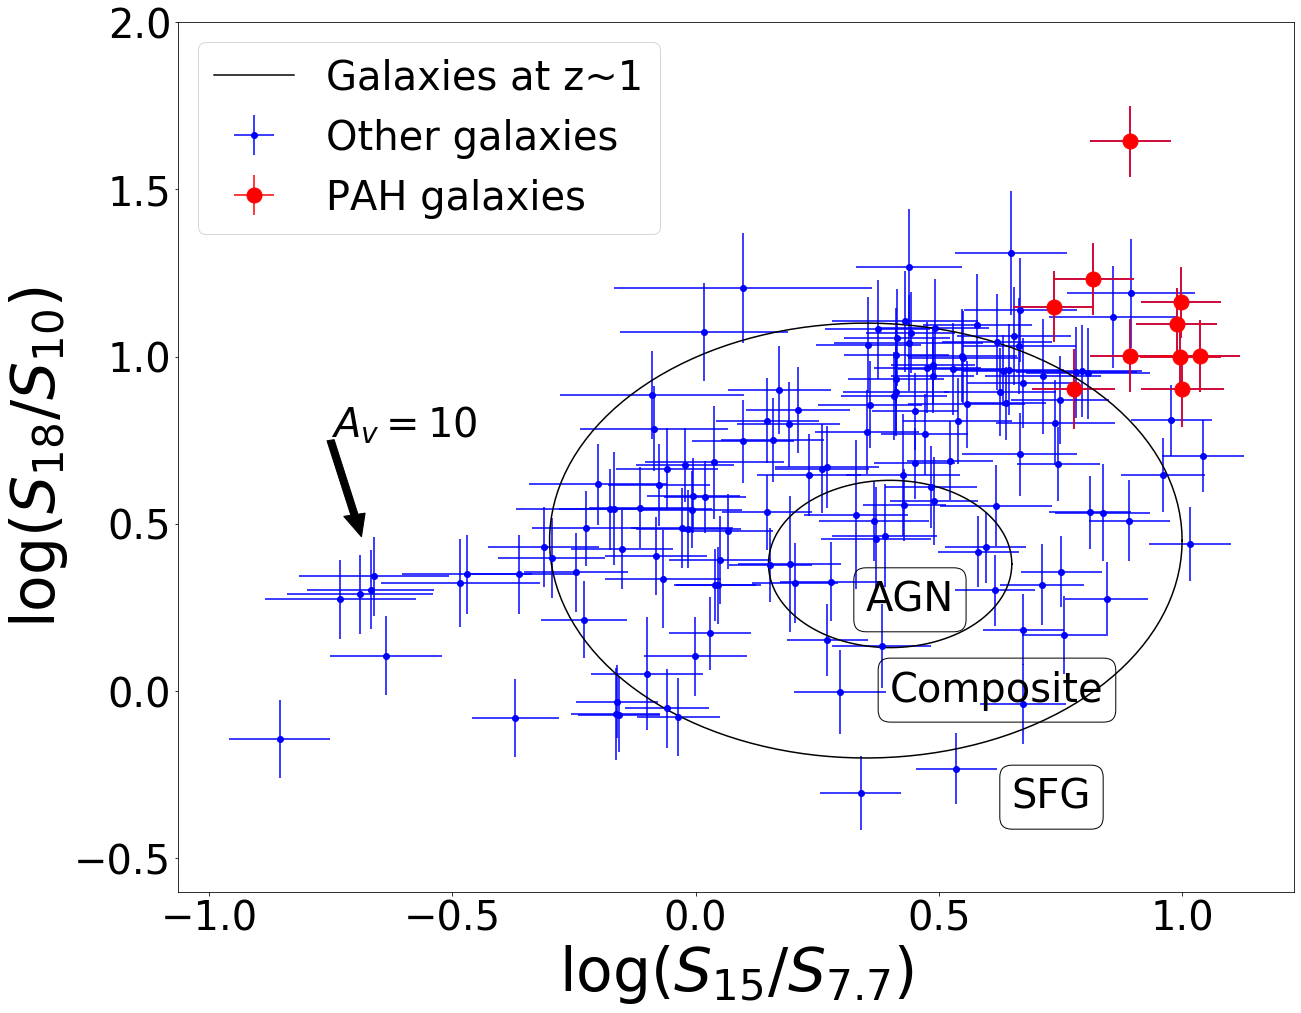

In [3]:
ceers['F10_F7']=np.log10(ceers['jwst.miri.F1000W']/ceers['jwst.miri.F770W'])
ceers['F15_F10']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F1000W'])
ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F15_F10_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))

ceers['F15_F7']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F770W'])
ceers['F18_F10']=np.log10(ceers['jwst.miri.F1800W']/ceers['jwst.miri.F1000W'])
ceers['F15_F7_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F18_F10_err']=(np.abs(ceers['jwst.miri.F1800W_err'])/ceers['jwst.miri.F1800W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))


ceers['F18_F15']=np.log10(ceers['jwst.miri.F1800W']/ceers['jwst.miri.F1500W'])
ceers['F18_F15_err']=(np.abs(ceers['jwst.miri.F1800W_err'])/ceers['jwst.miri.F1800W']/np.log(10))+(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))


dust_ex=pd.read_csv('/home/leolin/Desktop/MIRI_SED/dust_extinction_curve_R25.csv')
A7=dust_ex['Curve1'].iloc[78]
A10=(dust_ex['Curve1'].iloc[89]+dust_ex['Curve1'].iloc[90])/2
A15=dust_ex['Curve1'].iloc[99]
A18=dust_ex['Curve1'].iloc[102]

# ceers['F18_F15']=np.log10(ceers['jwst.miri.F1800W']/ceers['jwst.miri.F1500W'])
# ceers['F21_F15']=np.log10(ceers['jwst.miri.F2100W']/ceers['jwst.miri.F1500W'])
# ceers['F21_F18']=np.log10(ceers['jwst.miri.F2100W']/ceers['jwst.miri.F1800W'])

# x_pah=ceers['F10_F7'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
# y_pah=ceers['F15_F10'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
# x_all=ceers['F10_F7'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]
# y_all=ceers['F15_F10'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]

# x_pah_err=ceers['F10_F7_err'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
# y_pah_err=ceers['F15_F10_err'][(ceers['F10_F7']>0.75)|(ceers['F15_F10']>0.8)]
# x_all_err=ceers['F10_F7_err'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]
# y_all_err=ceers['F15_F10_err'][(ceers['F10_F7']<0.75)&(ceers['F15_F10']<0.8)]

# pah_cr=(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)

# x_pah=ceers['F10_F7'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_pah=ceers['F15_F10'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all=ceers['F10_F7'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all=ceers['F15_F10'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]

# x_pah_err=ceers['F10_F7_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_pah_err=ceers['F15_F10_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all_err=ceers['F15_F10_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]

# x_pah=ceers['F15_F7'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_pah=ceers['F18_F10'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all=ceers['F15_F7'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all=ceers['F18_F10'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]

# x_pah_err=ceers['F15_F7_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_pah_err=ceers['F18_F10_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F15_F7_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# y_all_err=ceers['F18_F10_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]

# x_pah=ceers['F15_F10'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# y_pah=ceers['F18_F15'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# x_all=ceers['F15_F10'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# y_all=ceers['F18_F15'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]

# x_pah_err=ceers['F15_F10_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# y_pah_err=ceers['F18_F15_err'][(ceers['F15_F10']>0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# x_all_err=ceers['F15_F10_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
# y_all_err=ceers['F18_F15_err'][(ceers['F15_F10']<0.8)&(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]
x_pah=[ceers['F15_F7'].loc[index[i]] for i in range(len(index))]
y_pah=[ceers['F18_F10'].loc[index[i]] for i in range(len(index))]
x_pah_err=[ceers['F15_F7_err'].loc[index[i]] for i in range(len(index))]
y_pah_err=[ceers['F18_F10_err'].loc[index[i]] for i in range(len(index))]

x_all=ceers['F15_F7'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all=ceers['F18_F10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
x_all_err=ceers['F15_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=ceers['F18_F10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
plt.figure(figsize=(20,16))
# plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='r',lolims=lo,xlolims=xlo)



theta = np.linspace( 0 , 2 * np.pi , 150 )
 
radius = 0.25
 
inx = radius * np.cos( theta )+0.4
iny = radius * np.sin( theta )+0.38

radius = 0.65 
outx = radius * np.cos( theta )+0.35
outy = radius * np.sin( theta )+0.45
 
plt.plot( inx, iny,c='black',label='Galaxies at z~1')
# plt.plot( inx+dx*10, iny+dy*10,c='grey')
# plt.plot( inx+dx*15, iny+dy*15,c='grey')
# plt.plot( inx+dx*20, iny+dy*20,c='grey')
# plt.plot( inx+dx*25, iny+dy*25,c='grey')
# plt.plot( inx+dx*30, iny+dy*30,c='grey')
plt.plot( outx, outy,c='black')
# plt.plot( outx+dx*10, outy+dy*10,c='green')
# plt.plot( outx+dx*15, outy+dy*15,c='green')
# plt.plot( outx+dx*20, outy+dy*20,c='green')

dx=A15-A7
dy=A18-A10
plt.arrow(-0.75,0.75,dx*10,dy*10,width=0.015,color='black')
plt.text(-0.75,0.76,'$A_{v}=10$',fontsize=40)

plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='r',label='PAH galaxies')

# plt.errorbar(x_pah+dx*10,y_pah+dy*10,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='yellow',label='PAH galaxies with A_v=10')

# plt.errorbar(x_pah+dx*20,y_pah+dy*20,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='green',label='PAH galaxies with A_v=20')

# plt.errorbar(x_pah+dx*30,y_pah+dy*30,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='cyan',label='PAH galaxies with A_v=30')

# plt.errorbar(x_pah+dx*40,y_pah+dy*40,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='purple',label='PAH galaxies with A_v=40')

plt.legend(fontsize=40)
# plt.axvline(0.75,c='r',ls='--')
# plt.axhline(0.8,c='r',ls='--')
# plt.xlabel('log(F10/F7.7)',fontsize=30)
# plt.ylabel('log(F15/F10)',fontsize=30)
plt.xlabel('log($S_{15}/S_{7.7}$)',fontsize=60)
plt.ylabel('log($S_{18}/S_{10}$)',fontsize=60)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
font = {'color':  'black',
        'size': 40
        }
box = {'facecolor': 'none',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
plt.text(0.35,0.24,'AGN', fontdict=font , bbox=box)
plt.text(0.40,-0.03,'Composite', fontdict=font , bbox=box)
plt.text(0.65,-0.35,'SFG', fontdict=font , bbox=box)
plt.ylim([-0.6,2])
# plt.savefig('CEERS_ccplot.eps',format='eps')
# plt.savefig('CEERS_ccplot_18_7_0706.png')
# plt.savefig('CEERS_ccplot_18_7_1017.png')
# plt.savefig('CEER_ccplot_18_Kir2017.png')

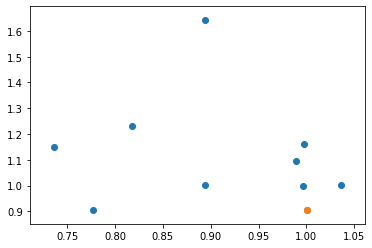

In [7]:
plt.scatter(x_pah,y_pah)
plt.scatter(x_pah[9],y_pah[9])

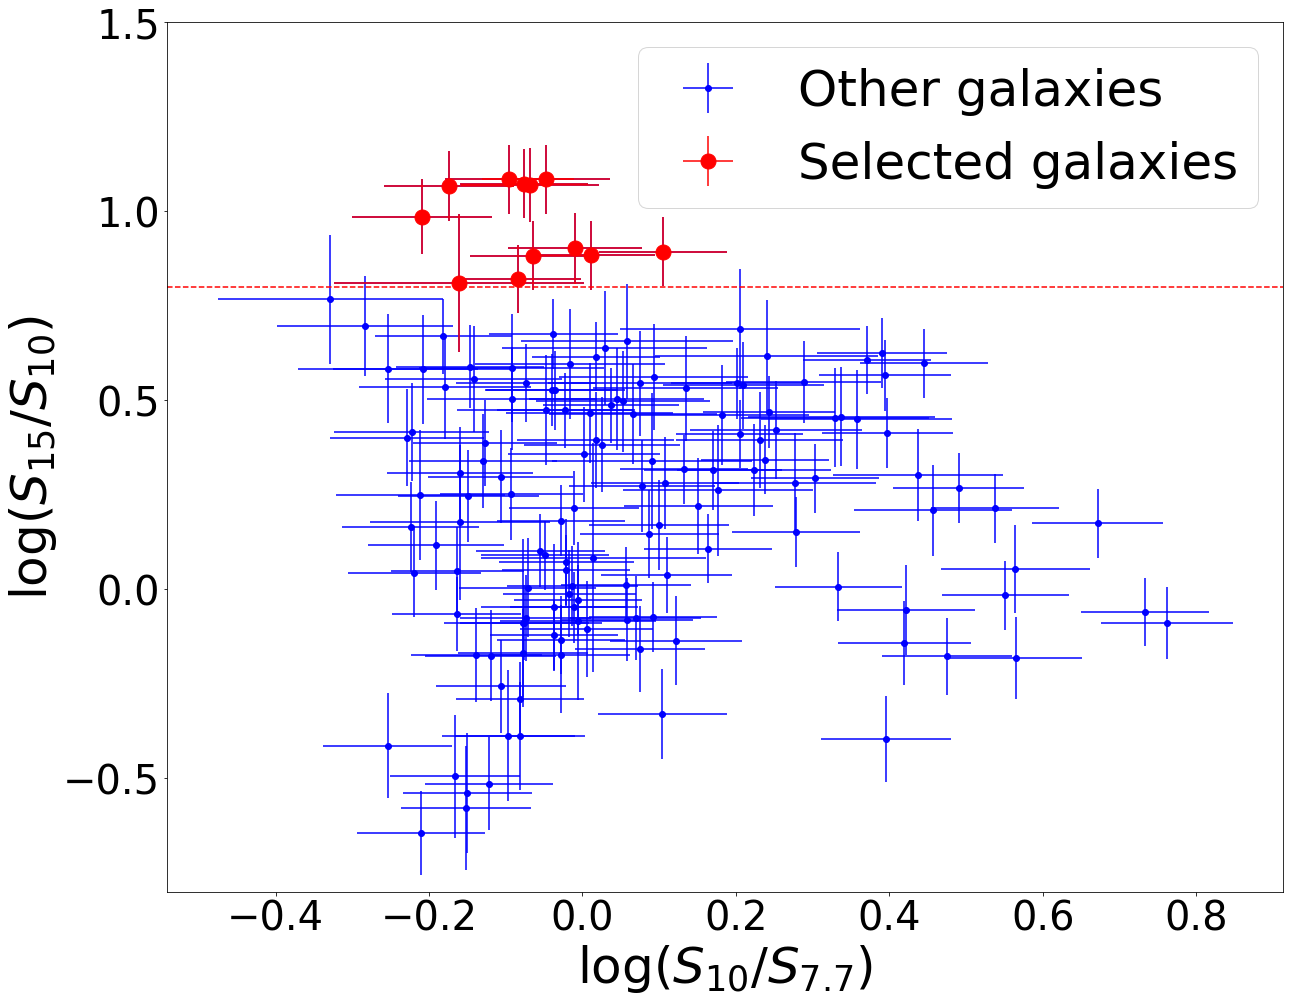

In [57]:
ceers

x_pah=ceers['F10_F7'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
y_pah=ceers['F15_F10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
x_pah_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
y_pah_err=ceers['F15_F10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]


x_all=ceers['F10_F7'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all=ceers['F15_F10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=ceers['F15_F10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
plt.figure(figsize=(20,16))


plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',markersize=15,color='r',label='Selected galaxies')
plt.legend(fontsize=50,loc=1)
# plt.axvline(0.75,c='r',ls='--')
plt.axhline(0.8,c='r',ls='--')

plt.xlabel('log($S_{10}/S_{7.7}$)',fontsize=50)
plt.ylabel('log($S_{15}/S_{10}$)',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.ylim([-0.8,1.5])

plt.savefig('CEERS_ccplot_0410.png')

In [10]:
ceers_z

[0.45,
 2.4,
 0.73,
 0.24,
 0.51,
 0.0,
 0.55,
 0.0,
 0.63,
 3.8,
 1.3,
 4.1,
 0.0,
 1.44,
 1.16,
 2.6,
 0.64,
 0.51,
 0.43,
 1.89,
 0.49,
 0.93,
 0.55,
 1.27,
 0.0,
 1.33,
 1.36,
 1.42,
 1.51,
 0.0,
 0.82,
 1.16,
 1.1,
 0.56,
 1.29,
 0.46,
 1.25,
 0.94,
 0.0,
 0.45,
 1.08,
 0.0,
 1.38,
 0.41,
 2.5,
 0.43,
 1.5,
 1.04,
 1.78,
 1.46,
 1.53,
 2.1,
 0.0,
 0.34,
 4.0,
 4.2,
 7.9,
 0.83,
 0.0,
 1.09,
 1.24,
 0.63,
 0.0,
 0.33,
 0.81,
 1.46,
 1.2,
 1.43,
 1.58,
 0.0,
 2.7,
 0.39,
 1.12,
 1.3,
 0.59,
 1.49,
 0.0,
 1.32,
 0.64,
 0.51,
 0.48,
 0.94,
 2.2,
 4.3,
 1.75,
 1.23,
 1.17,
 1.46,
 0.55,
 5.5,
 1.01,
 0.75,
 0.41,
 0.56,
 4.4,
 0.6,
 2.6,
 1.15,
 1.55,
 4.3,
 0.73,
 5.2,
 0.0,
 1.14,
 2.6,
 1.14,
 1.09,
 2.6,
 1.58,
 0.0,
 3.1,
 0.67,
 0.11,
 0.85,
 0.53,
 3.2,
 3.9,
 0.54,
 0.79,
 1.4,
 0.88,
 4.2,
 0.44,
 0.75,
 0.78,
 0.54,
 2.4,
 4.3,
 4.3,
 1.09,
 1.49,
 3.8,
 3.9,
 2.4,
 0.62,
 0.0,
 1.15,
 0.79,
 0.94,
 4.0,
 0.58,
 0.45,
 1.34,
 1.56,
 3.9,
 0.97,
 0.68,
 0.62,
 1.75,
 0.47,
 1.

In [85]:
galaxy=pd.read_csv('/home/leolin/Desktop/MIRI_SED/JW_color_15_10.txt')
galaxy

rshft     Sd    M82  N6090  seyf2
0      0.00  2.842  5.794  4.843  3.040
1      0.01  2.837  6.075  4.842  3.037
2      0.02  2.776  6.245  4.771  2.996
3      0.03  2.656  6.332  4.614  2.900
4      0.04  2.488  6.364  4.348  2.763
...     ...    ...    ...    ...    ...
996    9.96  1.332  1.460  1.453  1.509
997    9.97  1.333  1.461  1.454  1.510
998    9.98  1.334  1.462  1.456  1.511
999    9.99  1.335  1.463  1.457  1.512
1000  10.00  1.336  1.464  1.458  1.513

[1001 rows x 5 columns]

In [20]:
plt.figure(figsize=(16,9))
plt.scatter(galaxy['rshft'],galaxy['Sd'],label='Sd')
plt.scatter(galaxy['rshft'],galaxy['M82'],label='M82')
plt.scatter(galaxy['rshft'],galaxy['N6090'],label='N6090')
plt.scatter(galaxy['rshft'],galaxy['seyf2'],label='seyf2')


NameError: name 'galaxy' is not defined

<Figure size 1152x648 with 0 Axes>

In [157]:
sedceers_2[['id','best.reduced_chi_square','best.universe.redshift']]

id  best.reduced_chi_square  best.universe.redshift
0    59                 5.174585                    0.94
1    64                 1.374358                    1.00
2    66                 3.944057                    1.10
3    72                 2.754757                    1.10
4   113                 4.287936                    1.20
5   118                 8.204340                    0.50
6   136                 3.258434                    1.22
7   145                 6.970853                    0.57
8   178                 5.049282                    1.23
9   187                 1.758294                    1.21
10  218                 2.330178                    1.09
11  225                 4.747771                    0.78
12  250                13.246849                    0.59

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


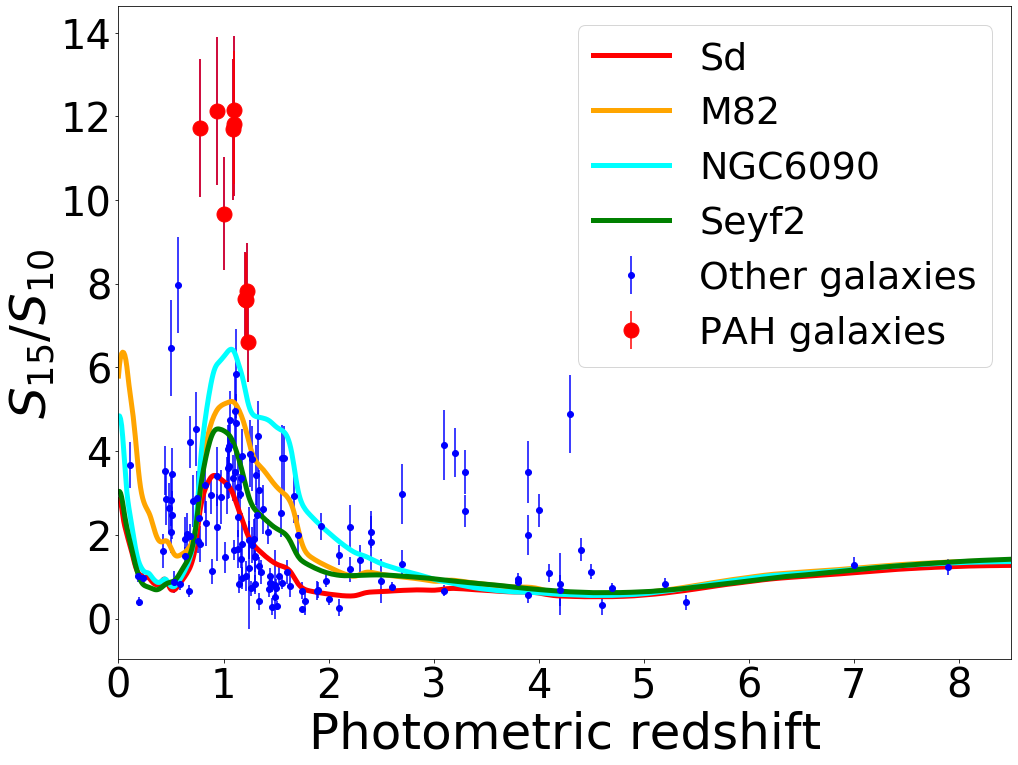

In [25]:
ceers_z=[0 for i in range(403)]

sed2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_2/results.txt')
sed20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_20/results.txt')
for i in range(len(ceers_z)):
    if sed20['best.universe.redshift'].iloc[i]>2:
        ceers_z[i]=sed20['best.universe.redshift'].iloc[i]
    else:
        ceers_z[i]=sed2['best.universe.redshift'].iloc[i]
        
for i in range(len(sedceers_2)):
    ceers_z[sedceers_2['id'].iloc[i]]=sedceers_2['best.universe.redshift'].iloc[i]

# z=sedceers_20['best.universe.redshift'].values
# z=ceers_z
ceers['z']=ceers_z
# f10_f7=ceers['F10_F7']
# f15_f10=ceers['F15_F10']
# ceers['F10_F7']=np.log10(ceers['jwst.miri.F1000W']/ceers['jwst.miri.F770W'])
ceers['f15_f10']=ceers['jwst.miri.F1500W']/ceers['jwst.miri.F1000W']
# ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['f15_f10_err']=np.sqrt(((ceers['jwst.miri.F1500W_err']/ceers['jwst.miri.F1500W']))**2+((ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W'])**2)*ceers['jwst.miri.F1500W_err']/ceers['jwst.miri.F1000W_err']

x_pah=ceers['z'].iloc[index]
y_pah=ceers['f15_f10'].iloc[index]
y_pah_err=ceers['f15_f10_err'].iloc[index]
# x_pah=ceers['z'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah=ceers['f15_f10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# x_pah_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]
# y_pah_err=ceers['f15_f10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['F15_F10']>0.8)]


x_all=ceers['z'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all=ceers['f15_f10'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
# x_all_err=ceers['F10_F7_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]
y_all_err=ceers['f15_f10_err'][(ceers['jwst.miri.F1000W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]

plt.figure(figsize=(16,12))
plt.errorbar(x_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,fmt='o',markersize=15,color='r',label='PAH galaxies')

plt.plot(galaxy['rshft'],galaxy['Sd'],label='Sd',color='red',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['M82'],label='M82',color='orange',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['N6090'],label='NGC6090',color='cyan',linewidth=5)
plt.plot(galaxy['rshft'],galaxy['seyf2'],label='Seyf2',color='green',linewidth=5)
# plt.xlim(0,2)
plt.legend(fontsize=38)
plt.xlim([0,8.5])
plt.xlabel('Photometric redshift',fontsize=50)
plt.ylabel('$S_{15}/S_{10}$',fontsize=50)
plt.xticks([0,1,2,3,4,5,6,7,8],fontsize=40)
plt.yticks(fontsize=40)
# plt.savefig('CEERS_z_F15_F10_0713.png')

(array([22.,  9.,  6.,  4.,  7.,  0.,  1.,  2.,  1.,  4.]),
 array([0.13415222, 0.91292067, 1.69168913, 2.47045758, 3.24922604,
        4.02799449, 4.80676295, 5.5855314 , 6.36429986, 7.14306831,
        7.92183677]),
 <a list of 10 Patch objects>)

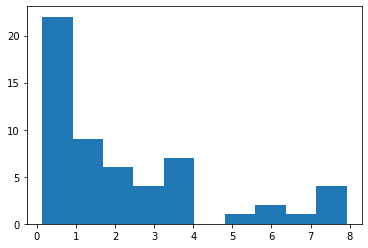

In [15]:
plt.hist(ceers['jwst.miri.F2100W'][(ceers['jwst.miri.F2100W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)]/ceers['jwst.miri.F1500W'][(ceers['jwst.miri.F2100W_err']>0)&(ceers['jwst.miri.F1500W_err']>0)])

In [47]:
ceers['jwst.miri.F1500W'].iloc[14]/ceers['jwst.miri.F1000W'].iloc[14]

2.9727359652375314

In [57]:
sedceers_20[['best.reduced_chi_square','best.universe.redshift','best.dust.qpah','best.dust.luminosity']][(sedceers_20['best.reduced_chi_square']<5)&(ceers['jwst.miri.F1500W_err']>0)][60:]

best.reduced_chi_square  best.universe.redshift  best.dust.qpah  \
280             3.725163e+00                     3.1            1.77   
286             3.620708e+00                     0.5            0.47   
290             3.962130e-01                     1.1            1.12   
292             2.107712e+00                     1.2            0.47   
295             3.870703e+00                     1.4            0.47   
296             4.254114e+00                     1.5            1.12   
298             2.012820e+00                     1.1            0.47   
310             2.143784e-14                     5.0            1.77   
314             1.474590e-13                     4.9            1.77   
323             7.545759e-15                     4.8            5.26   
330             8.981591e-01                     2.9            1.77   
331             1.302653e-13                     3.1            6.63   
333             9.244706e-01                     1.6            6.63   
334             2.504555e+00                     1.9            0.47   
336             1.798743e+00                     0.7            1.12   

     best.dust.luminosity  
280          4.094376e+37  
286          4.530099e+36  
290          1.917460e+36  
292          2.402949e+37  
295          1.338383e+38  
296          2.223838e+37  
298          1.894221e+38  
310          1.452634e+39  
314          6.269951e+37  
323          2.090669e+39  
330          1.883941e+37  
331          2.088276e+38  
333          3.761159e+35  
334          2.355052e+38  
336          1.144012e+36

(array([16., 17., 17.,  5.,  4.,  5.,  3.,  4.,  1.,  3.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

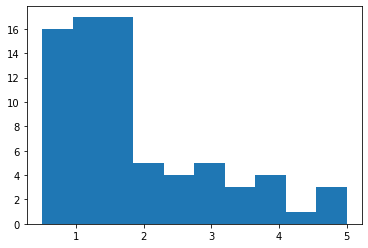

In [52]:
plt.hist(sedceers_20['best.universe.redshift'][(sedceers_20['best.reduced_chi_square']<5)&(ceers['jwst.miri.F1500W_err']>0)])

In [40]:
ceers[ceers.columns[10:20]][ceers['jwst.miri.F2100W']!=ceers['jwst.miri.F2100W'].iloc[0]]
# [ceers['jwst.miri.F2100W']!=0.010000]

jwst.miri.F1800W_err  jwst.miri.F2100W  jwst.miri.F2100W_err  \
9                0.000338          0.679302              0.000834   
13               0.000338          0.007678              0.000834   
14               0.000338          0.006253              0.000834   
27               0.000338          0.080990              0.000834   
32               0.000338          0.014472              0.000834   
..                    ...               ...                   ...   
398             -0.000338          0.003984              0.000857   
399             -0.000338          0.003803              0.000858   
400             -0.000338         -0.000551              0.000858   
401             -0.000338          0.004007              0.000857   
402             -0.000338          0.004578              0.000858   

     cfht.megacam.u  cfht.megacam.u_err  cfht.megacam.g  cfht.megacam.g_err  \
9          0.005880            0.000071        0.014740            0.000105   
13         0.000031            0.000013        0.000047            0.000012   
14         0.000320            0.000020        0.000427            0.000020   
27        -0.000002            0.000012        0.000020            0.000011   
32         0.000321            0.000020        0.000627            0.000025   
..              ...                 ...             ...                 ...   
398             NaN                 NaN             NaN                 NaN   
399             NaN                 NaN             NaN                 NaN   
400             NaN                 NaN             NaN                 NaN   
401             NaN                 NaN             NaN                 NaN   
402             NaN                 NaN             NaN                 NaN   

     cfht.megacam.r  cfht.megacam.r_err  cfht.megacam.iold  
9          0.040100            0.000194           0.062100  
13         0.000077            0.000014           0.000088  
14         0.000639            0.000024           0.000825  
27         0.000038            0.000014           0.000132  
32         0.001612            0.000045           0.003015  
..              ...                 ...                ...  
398             NaN                 NaN                NaN  
399             NaN                 NaN                NaN  
400             NaN                 NaN                NaN  
401             NaN                 NaN                NaN  
402             NaN                 NaN                NaN  

[104 rows x 10 columns]

In [63]:
sedceers_20['best.universe.redshift'][(sedceers_20['best.universe.redshift']>0.8)&(sedceers_20['best.universe.redshift']<1.5)]

6      1.1
8      1.3
14     1.1
20     1.4
21     1.2
      ... 
293    1.1
295    1.4
298    1.1
299    1.3
301    1.2
Name: best.universe.redshift, Length: 98, dtype: float64

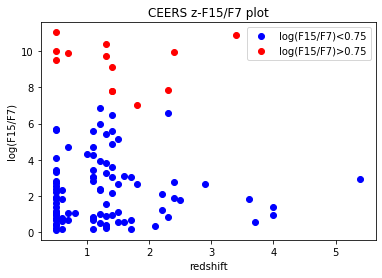

In [79]:
z=sedceers_20['best.universe.redshift'].values
# z=ceers_z
# f10_f7=ceers['F10_F7']
f21_f15=(ceers['jwst.miri.F1500W'][(ceers['jwst.miri.F1500W_err']>0)&(ceers['jwst.miri.F770W_err']>0)]/ceers['jwst.miri.F770W'][(ceers['jwst.miri.F1500W_err']>0)&(ceers['jwst.miri.F770W_err']>0)])
z_pah=[]
z_all=[]
y_pah=[]
y_all=[]

for i,a in enumerate(f21_f15):
    if a > 7:
        z_pah.append(z[i])
        y_pah.append(a)
    else:
        z_all.append(z[i])
        y_all.append(a)

plt.plot(z_all,y_all,'o',label='log(F15/F7)<0.75',c='b')
plt.plot(z_pah,y_pah,'o',label='log(F15/F7)>0.75',c='r')
# plt.xlim(0,2)
plt.legend()
plt.title('CEERS z-F15/F7 plot')
plt.xlabel('redshift')
plt.ylabel('log(F15/F7)')
plt.savefig('CEERS_z_F15_F7.png')

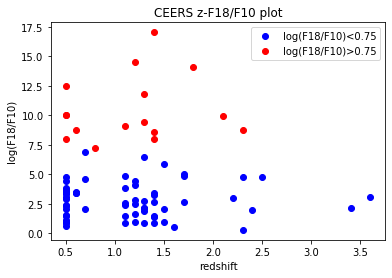

In [78]:
z=sedceers_20['best.universe.redshift'].values
# z=ceers_z
# f10_f7=ceers['F10_F7']
f21_f15=(ceers['jwst.miri.F1800W'][(ceers['jwst.miri.F1800W_err']>0)&(ceers['jwst.miri.F1000W_err']>0)]/ceers['jwst.miri.F1000W'][(ceers['jwst.miri.F1800W_err']>0)&(ceers['jwst.miri.F1000W_err']>0)])
z_pah=[]
z_all=[]
y_pah=[]
y_all=[]

for i,a in enumerate(f21_f15):
    if a > 7:
        z_pah.append(z[i])
        y_pah.append(a)
    else:
        z_all.append(z[i])
        y_all.append(a)

plt.plot(z_all,y_all,'o',label='log(F18/F10)<0.75',c='b')
plt.plot(z_pah,y_pah,'o',label='log(F18/F10)>0.75',c='r')
# plt.xlim(0,2)
plt.legend()
plt.title('CEERS z-F18/F10 plot')
plt.xlabel('redshift')
plt.ylabel('log(F18/F10)')
plt.savefig('CEERS_z_F18_F10.png')

In [66]:
ceers[['redshift','jwst.miri.F770W','jwst.miri.F770W_err','jwst.miri.F1000W','jwst.miri.F1000W_err','jwst.miri.F1500W','jwst.miri.F1500W_err','F15_F10']][(ceers['F10_F7']>0.75)]

redshift  jwst.miri.F770W  jwst.miri.F770W_err  jwst.miri.F1000W  \
176       NaN         0.000066             0.000021          0.000398   
250     1.486         0.000689             0.000021          0.003982   
309       NaN         0.000200            -0.000025          0.008560   
310       NaN         0.000200            -0.000025          0.009876   
315       NaN         0.000200            -0.000025          0.003993   
316     1.356         0.000200            -0.000025          0.028381   
322       NaN         0.000200            -0.000025          0.014539   
323       NaN         0.000200            -0.000025          0.018477   

     jwst.miri.F1000W_err  jwst.miri.F1500W  jwst.miri.F1500W_err   F15_F10  
176             -0.000047          0.001259             -0.000142  0.500143  
250              0.000046          0.003244              0.000143 -0.088985  
309              0.000047          0.001259             -0.000142 -0.832434  
310              0.000047          0.006019              0.000139 -0.215034  
315              0.000046          0.001259             -0.000142 -0.501221  
316              0.000046          0.001259             -0.000142 -1.353001  
322              0.000046          0.011306              0.000142 -0.109252  
323              0.000046          0.012396              0.000142 -0.173342

z
0    0.17
1    2.40
2    0.67
6    0.59
8    1.26
..    ...
330  1.27
331  3.20
333  1.89
334  1.13
336  0.68

[274 rows x 1 columns]

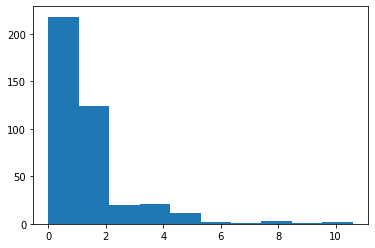

In [182]:
plt.hist(ceers_z)
dfz=pd.DataFrame(data=ceers_z,columns=['z'])
dfz[dfz['z']>0]

In [19]:
sedceers_20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_20/results.txt')

sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0927_ceers16_qpah/results.txt')

ceers_z=[0 for i in range(403)]
for i in range(len(ceers_z)):
    ceers_z[i]=sedceers_20['best.universe.redshift'].iloc[i]
for i in range(len(sedceers_2)):
    if sedceers_2['best.universe.redshift'].iloc[i]>0:
        print(sedceers_2['id'].iloc[i])
        ceers_z[sedceers_2['id'].iloc[i]]=sedceers_2['best.universe.redshift'].iloc[i]


59
64
66
72
113
118
136
145
178
187
218
225
250


In [26]:
max(ceers['redshift'])

6.492000000000001

In [24]:
np.arange(0,10.25,0.25)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  ])

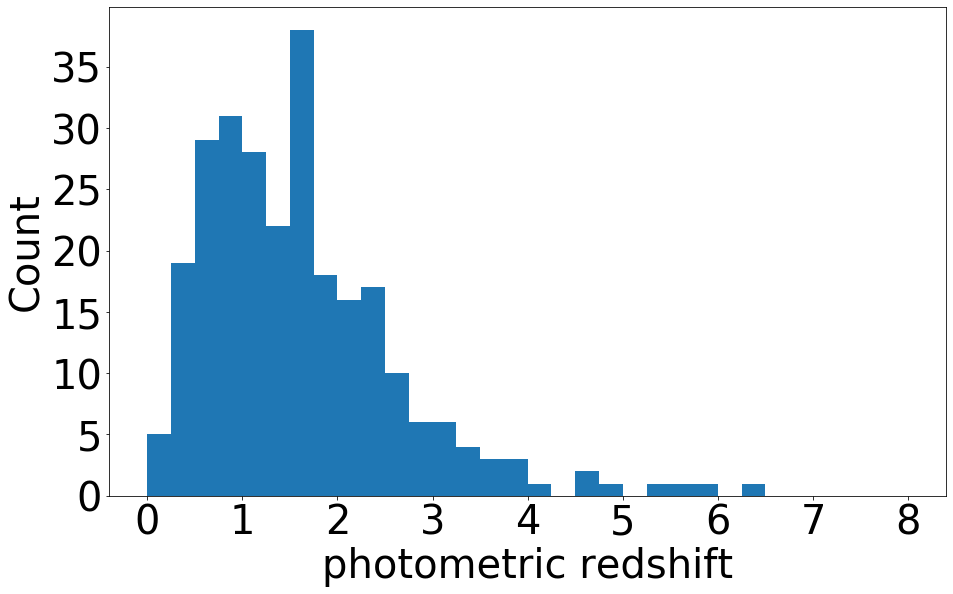

In [27]:
ceers
plt.figure(figsize=(15,9))
plt.hist(ceers['redshift'],bins=np.arange(0,8.25,0.25))
# plt.hist(ceers_z,bins=[0,1,2,3,4,5,6,7,8,9,10])
plt.xlabel('photometric redshift',fontsize=40)
plt.ylabel('Count',fontsize=40)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.savefig('JWST redshift distribution.png',dpi=300)

In [27]:
sedceers_20=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0921_nonebula_z_0_20/results.txt')

# sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/0927_ceers16_qpah/results.txt')
sedceers_2=pd.read_csv('/home/leolin/Desktop/MIRI_SED/ceers/1028_ceers16_qpah/results.txt')
# y=sedceers['best.universe.redshift'].values
y=ceers_z


ceers['F10_F7']=np.log10(ceers['jwst.miri.F1000W']/ceers['jwst.miri.F770W'])
ceers['F15_F10']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F1000W'])
ceers['F10_F7_err']=(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F15_F10_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))

ceers['F15_F7']=np.log10(ceers['jwst.miri.F1500W']/ceers['jwst.miri.F770W'])
ceers['F18_F10']=np.log10(ceers['jwst.miri.F1800W']/ceers['jwst.miri.F1000W'])
ceers['F15_F7_err']=(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))+(np.abs(ceers['jwst.miri.F770W_err'])/ceers['jwst.miri.F770W']/np.log(10))
ceers['F18_F10_err']=(np.abs(ceers['jwst.miri.F1800W_err'])/ceers['jwst.miri.F1800W']/np.log(10))+(np.abs(ceers['jwst.miri.F1000W_err'])/ceers['jwst.miri.F1000W']/np.log(10))


ceers['F18_F15']=np.log10(ceers['jwst.miri.F1800W']/ceers['jwst.miri.F1500W'])
ceers['F18_F15_err']=(np.abs(ceers['jwst.miri.F1800W_err'])/ceers['jwst.miri.F1800W']/np.log(10))+(np.abs(ceers['jwst.miri.F1500W_err'])/ceers['jwst.miri.F1500W']/np.log(10))


f15_f10=10**ceers['F15_F10']
f15_f10_err=(np.abs(ceers['jwst.miri.F1500W_err'])*ceers['jwst.miri.F1500W']+np.abs(ceers['jwst.miri.F1000W_err'])*ceers['jwst.miri.F1000W'])/(ceers['jwst.miri.F1000W']**2)
print(f15_f10,f15_f10_err)
z_pah=[]
z_all=[]
y_pah=[]
y_all=[]
z_pah_err=[]
z_all_err=[]
y_pah_err=[]
y_all_err=[]

F1500=[0 for i in range(len(good_fit))]
F1000=[0 for i in range(len(good_fit))]
for i,a in enumerate(good_fit):
    # myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/0922_ceers9/{str(a)}_best_model.fits')
    myfile=fits.open(f'/home/leolin/Desktop/MIRI_SED/ceers/1028_ceers16_qpah/{str(index[i])}_best_model.fits')
    data=myfile[1].data
    wl=data['wavelength']
    flux=data['Fnu']
    peak=[]

    # print(wl)
    # print(flux)
    for j,b in enumerate(wl):
        # if (b > 10000) & (b<20000):
        #     peak.append(flux[j])
        if b-15000<0.0001:
            F1500[i]=flux[j]

        if b-10000<0.0001:
            F1000[i]=flux[j]
    # print(np.max(peak))
    # fd=np.max(peak)
    # energy=fd*(10**-3)*(9*10**7)*(DL[i].value**2)/7.7
    # pah_luminosity.append(energy)
    # print(F1500,F1000)

y_model=[F1500[i]/F1000[i] for i in range(len(good_fit))]
x_model=sedceers_2['best.universe.redshift'].iloc[good_fit].values

z_pah=[F1500[i]/F1000[i] for i in range(len(good_fit))]
y_pah=sedceers_2['best.universe.redshift'].iloc[good_fit].values


for i,a in enumerate(f15_f10):
    if (ceers['jwst.miri.F1000W_err'].iloc[i]>0)&(ceers['jwst.miri.F770W_err'].iloc[i]>0) & (ceers_z[i]>0):
        if a > 10**0.8:
            # z_pah.append(y[i])
            # y_pah.append(a)
            
            # y_pah_err.append(f15_f10_err[i]) 
                       
        else:
            z_all.append(y[i])
            y_all.append(a)
            y_all_err.append(f15_f10_err[i])  

# plt.plot(z_all,y_all,'o',label='Other galaxies',c='b')
# plt.plot(z_pah,y_pah,'o',label='PAH selected',c='r')
plt.figure(figsize=(12,9))
plt.errorbar(z_pah,y_pah,yerr=y_pah_err,fmt='o',color='r',label='PAH luminous galaxies')
plt.errorbar(z_all,y_all,yerr=y_all_err,fmt='o',color='b',label='Other galaxies')
# plt.scatter(x_model,y_model,color='black',label='CIGALE model')
# plt.xlim(0,2)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('CEERS z-F15/F10 plot',fontsize=20)
# plt.xlim([0,2.5])
plt.xlabel('Photometric redshift',fontsize=30)
plt.ylabel('F15/F10',fontsize=30)
# plt.savefig('CEERS_z_F15_F10_nonebula_plot_1120.png')

IndentationError: expected an indented block (<ipython-input-27-a56fea2db54a>, line 76)

In [439]:
len(z_pah),z_pah

(12, [1.09, 1.08, 1.11, 1.11, 1.02, 0.5, 1.18, 0.59, 1.24, 1.21, 1.1, 0.79])

[1.09, 1.08, 1.11, 1.11, 1.02, 0.5, 1.18, 0.59, 1.24, 1.21, 1.1, 0.79] 136 12 11


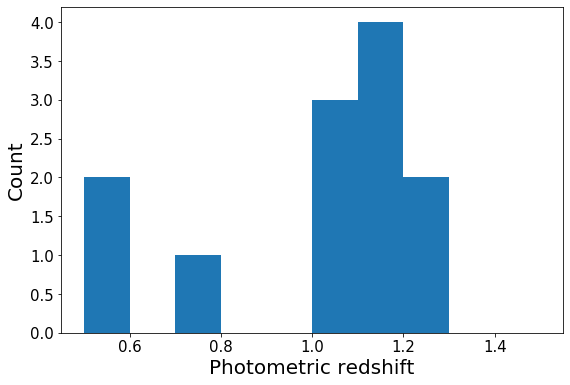

In [443]:
z_hist=[]
for i in  z_pah:
    if i >0.5:
        z_hist.append(i)
plt.figure(figsize=(9,6))
plt.hist(z_pah,bins=np.linspace(0.5,1.5,11))
print(z_pah,len(z_all),len(z_pah),len(z_hist))
plt.xlabel('Photometric redshift',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('redshift distribution.png')

In [4]:
ob002['f10/f7']=ob002['jwst.miri.F1000W']/ob002['jwst.miri.F770W']
ob002['f15/f10']=ob002['jwst.miri.F1500W']/ob002['jwst.miri.F1000W']

ob006['f10/f7']=ob006['jwst.miri.F1000W']/ob006['jwst.miri.F770W']
ob006['f15/f10']=ob006['jwst.miri.F1500W']/ob006['jwst.miri.F1000W']


In [5]:
sed002['best.universe.redshift']

0     5.85
1     1.85
2     4.45
3     1.95
4     2.60
5     3.55
6     3.45
7     2.30
8     1.60
9     2.35
10    1.75
11    3.45
12    2.40
13    3.40
14    1.65
15    1.60
16    6.55
17    0.05
18    1.10
19    7.05
20    7.25
21    2.05
22    5.45
23    2.00
24    2.30
25    2.80
26    0.00
27    1.10
28    2.10
Name: best.universe.redshift, dtype: float64

In [21]:
pz002006=pd.concat([ob002,ob006],axis=0)

pz002006['F10_F7']=np.log10(pz002006['jwst.miri.F1000W']/pz002006['jwst.miri.F770W'])
pz002006['F15_F10']=np.log10(pz002006['jwst.miri.F1500W']/pz002006['jwst.miri.F1000W'])
# pz002006['F10_F7_err']=(pz002006['jwst.miri.F1000W_err']/pz002006['jwst.miri.F770W_err']/(pz002006['jwst.miri.F1000W']/pz002006['jwst.miri.F770W']))
# pz002006['F15_F10_err']=(pz002006['jwst.miri.F1500W_err']/pz002006['jwst.miri.F1000W_err']/(pz002006['jwst.miri.F1500W']/pz002006['jwst.miri.F1000W']))

pz002006['F10_F7_err']=(pz002006['jwst.miri.F1000W_err']/pz002006['jwst.miri.F1000W']/np.log(10))+(pz002006['jwst.miri.F770W_err']/pz002006['jwst.miri.F770W']/np.log(10))
pz002006['F15_F10_err']=(pz002006['jwst.miri.F1500W_err']/pz002006['jwst.miri.F1500W']/np.log(10))+(pz002006['jwst.miri.F1000W_err']/pz002006['jwst.miri.F1000W']/np.log(10))
# pz002006[pz002006['F15_F10']<-0.5]

In [22]:
x_pah=pz002006['F10_F7'][(pz002006['F10_F7']>0.75)|(pz002006['F15_F10']>0.8)]
y_pah=pz002006['F15_F10'][(pz002006['F10_F7']>0.75)|(pz002006['F15_F10']>0.8)]
x_all=pz002006['F10_F7'][(pz002006['F10_F7']<0.75)&(pz002006['F15_F10']<0.8)]
y_all=pz002006['F15_F10'][(pz002006['F10_F7']<0.75)&(pz002006['F15_F10']<0.8)]

x_pah_err=pz002006['F10_F7_err'][(pz002006['F10_F7']>0.75)|(pz002006['F15_F10']>0.8)]
y_pah_err=pz002006['F15_F10_err'][(pz002006['F10_F7']>0.75)|(pz002006['F15_F10']>0.8)]
x_all_err=pz002006['F10_F7_err'][(pz002006['F10_F7']<0.75)&(pz002006['F15_F10']<0.8)]
y_all_err=pz002006['F15_F10_err'][(pz002006['F10_F7']<0.75)&(pz002006['F15_F10']<0.8)]



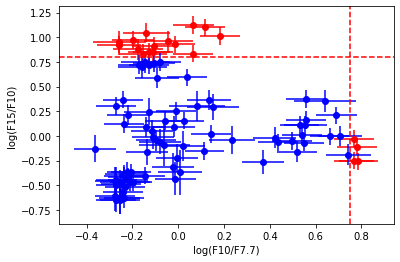

In [24]:
plt.errorbar(x_pah,y_pah,yerr=y_pah_err,xerr=x_pah_err,fmt='o',color='r')
plt.errorbar(x_all,y_all,yerr=y_all_err,xerr=x_all_err,fmt='o',color='b')
plt.axvline(0.75,c='r',ls='--')
plt.axhline(0.8,c='r',ls='--')
plt.xlabel('log(F10/F7.7)')
plt.ylabel('log(F15/F10)')
plt.savefig('sq_ccplot002006.eps',format='eps')

In [47]:
sed002006=pd.concat([sed002,sed006],axis=0)
sed002006[pz002006.columns[1:]]=pz002006[pz002006.columns[1:]]
sed002006

id  bayes.sfh.sfr  bayes.sfh.sfr_err  bayes.sfh.sfr100Myrs  \
0     0   1.169832e+06      625359.588958         591940.234280   
1     3   3.455313e+02         100.359888            175.685262   
2     5   3.458640e+04       33496.054998          17522.051092   
3    11   5.893292e+01         166.797560             29.960760   
4    17   8.637172e+02         599.966691            437.869600   
..  ...            ...                ...                   ...   
58  202   2.738301e+02         368.419423            138.988010   
59  203   1.631556e+03         297.060661            831.014337   
60  204   4.218544e+02          84.847536            214.219910   
61  206   3.417777e+03         744.298867           1729.303610   
62  211   1.109594e+02          86.131263             56.368527   

    bayes.sfh.sfr100Myrs_err  bayes.sfh.sfr10Myrs  bayes.sfh.sfr10Myrs_err  \
0              316378.197543         1.154911e+06            618234.701513   
1                  50.819906         2.666328e+02                87.674071   
2               16936.697831         3.086946e+04             33547.223045   
3                  84.386731         4.554882e+01               163.916495   
4                 304.075474         7.379880e+02               508.056671   
..                       ...                  ...                      ...   
58                187.093448         2.224699e+02               279.506694   
59                150.716408         1.260255e+03               228.767161   
60                 42.903767         3.252112e+02                65.203774   
61                375.156473         2.628594e+03               570.876212   
62                 43.667967         8.746073e+01                73.626326   

    bayes.jwst.miri.F1000W  bayes.jwst.miri.F1000W_err  \
0                 0.006875                    0.000629   
1                 0.018710                    0.000615   
2                 0.097685                    0.004669   
3                 0.003446                    0.000156   
4                 0.002905                    0.000082   
..                     ...                         ...   
58                0.011685                    0.002495   
59                0.000833                    0.000037   
60                0.001128                    0.000090   
61                0.018695                    0.000502   
62                0.000533                    0.000056   

    bayes.jwst.miri.F1500W  ...  jwst.miri.F1000W  jwst.miri.F1000W_err  \
0                 0.011588  ...          0.011111              0.001113   
1                 0.018283  ...          0.017109              0.001712   
2                 0.050864  ...          0.103713              0.010372   
3                 0.002203  ...          0.003147              0.000323   
4                 0.001818  ...          0.003124              0.000320   
..                     ...  ...               ...                   ...   
58                0.022132  ...          0.013110              0.001312   
59                0.004103  ...          0.000525              0.000076   
60                0.005066  ...          0.000998              0.000114   
61                0.162962  ...          0.016816              0.001683   
62                0.002787  ...          0.000547              0.000077   

    jwst.miri.F1500W  jwst.miri.F1500W_err    f10/f7    f15/f10    F10_F7  \
0           0.009847              0.001005  3.133100   0.886223  0.495974   
1           0.016926              0.001704  4.588302   0.989299  0.661652   
2           0.044494              0.004454  0.623214   0.429013 -0.205363   
3           0.002035              0.000286  5.544196   0.646809  0.743839   
4           0.001118              0.000230  0.537120   0.357782 -0.269928   
..               ...                   ...       ...        ...       ...   
58          0.019006              0.001906  3.630575   1.449807  0.559975   
59          0.003946              0.000421  0.664

In [80]:
sed002006[sed002006['jwst.nircam.F444W']>10**((20-8.9)/-2.5)*1000]

id  bayes.sfh.sfr  bayes.sfh.sfr_err  bayes.sfh.sfr100Myrs  \
2     5   34586.397577       33496.054998          17522.051092   
6    21   13004.799389        5189.299674           6607.369049   
13   55    9728.521415        1974.018080           4936.631870   
39  114    9054.796826        1231.842690           4597.081306   
46  142    3742.076702         639.499029           1902.526820   

    bayes.sfh.sfr100Myrs_err  bayes.sfh.sfr10Myrs  bayes.sfh.sfr10Myrs_err  \
2               16936.697831         30869.457957             33547.223045   
6                2632.210827         10194.301106              4029.151446   
13                998.416462          8046.680133              1984.900575   
39                627.328353          7440.628479              1025.719343   
46                320.050284          2887.060094               488.089625   

    bayes.jwst.miri.F1000W  bayes.jwst.miri.F1000W_err  \
2                 0.097685                    0.004669   
6                 0.027024                    0.001402   
13                0.028654                    0.001035   
39                0.030836                    0.001092   
46                0.017832                    0.000746   

    bayes.jwst.miri.F1500W  ...  jwst.miri.F1000W  jwst.miri.F1000W_err  \
2                 0.050864  ...          0.103713              0.010372   
6                 0.018248  ...          0.036185              0.003619   
13                0.018024  ...          0.037843              0.003785   
39                0.019767  ...          0.040642              0.004065   
46                0.011581  ...          0.021636              0.002164   

    jwst.miri.F1500W  jwst.miri.F1500W_err    f10/f7   f15/f10    F10_F7  \
2           0.044494              0.004454  0.623214  0.429013 -0.205363   
6           0.013945              0.001409  0.604557  0.385397 -0.218562   
13          0.015589              0.001572  0.581942  0.411940 -0.235120   
39          0.014418              0.001449  0.600907  0.354752 -0.221193   
46          0.008535              0.000866  0.576543  0.394458 -0.239168   

     F15_F10  F10_F7_err  F15_F10_err  
2  -0.367530    0.086860     0.086904  
6  -0.414092    0.086868     0.087314  
13 -0.385166    0.086867     0.087225  
39 -0.450075    0.086863     0.087083  
46 -0.403999    0.086874     0.087497  

[5 rows x 128 columns]

In [48]:
pah002006=sed002006[(sed002006['F10_F7']>0.75)|(sed002006['F15_F10']>0.8)]

In [69]:
sed002.columns[25:95]

Index(['best.chi_square', 'best.reduced_chi_square', 'best.agn.beta',
       'best.agn.fracAGN', 'best.agn.gamma', 'best.agn.opening_angle',
       'best.agn.psy', 'best.agn.r_ratio', 'best.agn.tau',
       'best.attenuation.Av_BC', 'best.attenuation.Av_ISM',
       'best.attenuation.FUV', 'best.attenuation.V_B90', 'best.attenuation.mu',
       'best.attenuation.slope_BC', 'best.attenuation.slope_ISM',
       'best.dust.alpha', 'best.dust.gamma', 'best.dust.qpah',
       'best.dust.umean', 'best.dust.umin', 'best.nebular.f_dust',
       'best.nebular.f_esc', 'best.nebular.lines_width', 'best.nebular.logU',
       'best.param.EW(500.7/1.0)', 'best.param.EW(656.3/1.0)',
       'best.param.restframe_FUV-NUV', 'best.param.restframe_NUV-r_prime',
       'best.sfh.age', 'best.sfh.age_burst', 'best.sfh.age_main',
       'best.sfh.f_burst', 'best.sfh.tau_burst', 'best.sfh.tau_main',
       'best.stellar.age_m_star', 'best.stellar.imf',
       'best.stellar.metallicity', 'best.stellar.old_young

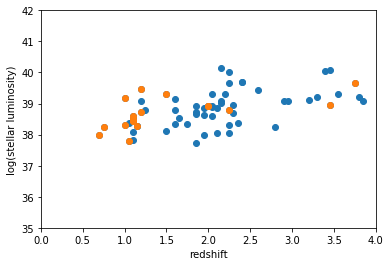

In [103]:
plt.plot(sed002006['best.universe.redshift'],np.log10(sed002006['best.stellar.lum']),'o')
plt.plot(pah002006['best.universe.redshift'],np.log10(pah002006['best.stellar.lum']),'o')
# plt.xlabel('redshift')
# plt.ylabel('log(stellar luminosity)')
plt.xlim([0,4])
plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(stellar luminosity)')
plt.savefig('z_stellar_luminosity.png')
# plt.ylabel('log')

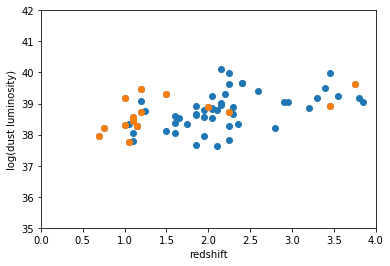

In [104]:
plt.plot(sed002006['best.universe.redshift'],np.log10(sed002006['best.dust.luminosity']),'o')
plt.plot(pah002006['best.universe.redshift'],np.log10(pah002006['best.dust.luminosity']),'o')
plt.xlim([0,4])
plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(dust luminosity)')
plt.savefig('z_dust_luminosity.png')
# plt.ylabel('log')

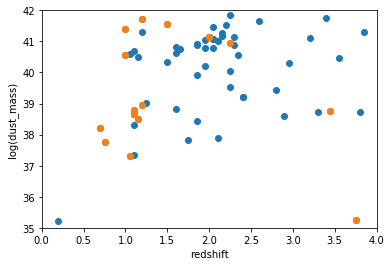

In [105]:
plt.plot(sed002006['best.universe.redshift'],np.log10(sed002006['best.dust.mass']),'o')
plt.plot(pah002006['best.universe.redshift'],np.log10(pah002006['best.dust.mass']),'o')

plt.xlim([0,4])
plt.ylim([35,42])
plt.xlabel('redshift')
plt.ylabel('log(dust_mass)')
plt.savefig('z_dust_mass.png')
# plt.ylabel('log')

In [100]:
pah002006[['id','best.universe.redshift','best.universe.luminosity_distance','bayes.sfh.sfr', 'bayes.sfh.sfr10Myrs','bayes.sfh.sfr100Myrs','best.dust.qpah', 'best.dust.luminosity', 'best.stellar.lum','best.dust.mass','best.stellar.m_gas']]

id  best.universe.redshift  best.universe.luminosity_distance  \
11   44                    3.45                       9.498949e+26   
18   69                    1.10                       2.322504e+26   
23   84                    2.00                       4.887033e+26   
27   92                    1.10                       2.322504e+26   
1     1                    1.05                       2.191431e+26   
4     4                    1.15                       2.455100e+26   
7     9                   14.30                       4.939795e+27   
15   33                    1.20                       2.589147e+26   
16   35                    2.25                       5.649719e+26   
21   46                    1.00                       2.061961e+26   
22   47                    0.70                       1.324050e+26   
23   51                    1.00                       2.061961e+26   
26   56                    1.10                       2.322504e+26   
31   79                    1.10                       2.322504e+26   
45  136                    2.00                       4.887033e+26   
51  177                    1.20                       2.589147e+26   
56  200                    0.75                       1.441872e+26   
59  203                    1.50                       3.420365e+26   
61  206                    3.75                       1.049831e+27   

    bayes.sfh.sfr  bayes.sfh.sfr10Myrs  bayes.sfh.sfr100Myrs  best.dust.qpah  \
11    1928.399325          1595.471757            978.507665            7.32   
18     195.616721           152.467831             99.309122            0.47   
23     487.595236           376.495204            248.213880            3.19   
27     161.872979           137.047236             82.084832            0.47   
1       58.877362            50.555946             29.849048            0.47   
4      155.089900           119.554427             78.696858            0.47   
7    13054.945982         11432.639753           6615.159368            7.32   
15    2591.597711          2133.323418           1316.079578            0.47   
16     473.176554           365.239112            240.749842            7.32   
21     117.852337            91.853095             59.897222            0.47   
22     160.410408           153.867514             81.181796            0.47   
23    1410.976011          1300.998379            714.569213            0.47   
26     258.560253           228.656524            130.936657            0.47   
31     226.838866           218.475002            114.785825            0.47   
45     599.428463           464.125011            306.024587            3.19   
51     534.758684           413.526321            271.811830            0.47   
56    1395.694214          1158.064550            707.875520            0.47   
59    1631.555873          1260.255263            831.014337            0.47   
61    3417.777283          2628.593568           1729.303610            0.47   

    best.dust.luminosity  best.stellar.lum  best.dust.mass  best.stellar.m_gas  
11          8.360365e+38      8.787662e+38    5.809816e+38        2.613315e+08  
18          2.985355e+38      3.090804e+38    5.175989e+38        9.191573e+07  
23          7.569412e+38      8.055629e+38    1.339739e+41        2.395620e+08  
27          2.661920e+38      2.780956e+38    4.615220e+38        8.035917e+07  
1           5.701877e+37      6.008002e+37    1.977220e+37        1.283718e+07  
4           1.888452e+38      1.958277e+38    3.274186e+38        5.823613e+07  
7           1.141200e+40      1.273948e+40    4.943409e+35        3.716627e+09  
15          2.946070e+39      3.035721e+39    5.107519e+41        9.027764e+08  
16          5.520048e+38      5.990790e+38    8.643982e+40        1.781568e+08  
21          2.041192e+38      2.093491e+38    3.538758e+40        6.225719e+07  
22          9.323867e+37      9.766970e+37    1.616566e+38        2.904546e+07  
23          1.498855e+39      1

In [36]:
pz002006[(pz002006['F15_F10']>0.8)]

id  redshift  jwst.nircam.F090W  jwst.nircam.F090W_err  \
11   44        -1           0.000085               0.000010   
18   69        -1           0.000021               0.000005   
27   92        -1           0.000734               0.000074   
1     1        -1                NaN                    NaN   
4     4        -1           0.000029               0.000007   
15   33        -1           0.000113               0.000012   
21   46        -1           0.000086               0.000010   
22   47        -1           0.000024               0.000007   
23   51        -1           0.000147               0.000016   
26   56        -1           0.000046               0.000008   
31   79        -1           0.000017               0.000006   
51  177        -1           0.000108               0.000012   
56  200        -1           0.000085               0.000010   
59  203        -1           0.000080               0.000010   
61  206        -1           0.000087               0.000011   

    jwst.nircam.F150W  jwst.nircam.F150W_err  jwst.nircam.F200W  \
11                NaN                    NaN                NaN   
18           0.000229               0.000023           0.000439   
27           0.001442               0.000144           0.001893   
1            0.000253               0.000026           0.000458   
4            0.000152               0.000016           0.000284   
15           0.000574               0.000058           0.000822   
21           0.000240               0.000024           0.000468   
22           0.000509               0.000051           0.001133   
23           0.000488               0.000049           0.001536   
26           0.000308               0.000031           0.000774   
31           0.000337               0.000034           0.000880   
51           0.000231               0.000023           0.000422   
56                NaN                    NaN                NaN   
59           0.000111               0.000012           0.000231   
61           0.000195               0.000020           0.000501   

    jwst.nircam.F200W_err  jwst.nircam.F277W  jwst.nircam.F277W_err  ...  \
11                    NaN                NaN                    NaN  ...   
18               0.000044           0.000660               0.000066  ...   
27               0.000189           0.002050               0.000205  ...   
1                0.000046           0.000812               0.000081  ...   
4                0.000029           0.000636               0.000064  ...   
15               0.000082           0.001809               0.000181  ...   
21               0.000047           0.000784               0.000078  ...   
22               0.000113           0.001999               0.000200  ...   
23               0.000154                NaN                    NaN  ...   
26               0.000078                NaN                    NaN  ...   
31               0.000088           0.001446               0.000145  ...   
51               0.000042           0.001033               0.000103  ...   
56                    NaN                NaN                    NaN  ...   
59               0.000024           0.000545               0.000055  ...   
61               0.000050           0.003828               0.000383  ...   

    jwst.miri.F1000W  jwst.miri.F1000W_err  jwst.miri.F1500W  \
11          0.003629              0.000370          0.037197   
18          0.000876              0.000113          0.009762   
27          0.001049              0.000127          0.008699   
1           0.000441              0.000070          0.003943   
4           0.000571              0.000079          0.003831   
15          0.003392              0.000344          0.023907   
21          0.000602              0.000081          0.005468   
22          0.002151              0.000222          0.014674   
23          0.005514              0.000554          0.046656   
26          0.001217              0.000133          0.008650   
31

In [35]:
pz002006[(pz002006['F10_F7']>0.75)]

id  redshift  jwst.nircam.F090W  jwst.nircam.F090W_err  \
23   84        -1           0.000286               0.000029   
7     9        -1                NaN                    NaN   
16   35        -1           0.000286               0.000029   
45  136        -1           0.000589               0.000059   

    jwst.nircam.F150W  jwst.nircam.F150W_err  jwst.nircam.F200W  \
23           0.001027               0.000103           0.002126   
7                 NaN                    NaN                NaN   
16           0.001027               0.000103           0.002126   
45           0.001107               0.000111           0.001818   

    jwst.nircam.F200W_err  jwst.nircam.F277W  jwst.nircam.F277W_err  ...  \
23               0.000213           0.003977               0.000398  ...   
7                     NaN                NaN                    NaN  ...   
16               0.000213           0.003977               0.000398  ...   
45               0.000182           0.003464               0.000347  ...   

    jwst.miri.F1000W  jwst.miri.F1000W_err  jwst.miri.F1500W  \
23          0.028790              0.002880          0.015854   
7           0.011490              0.001150          0.010793   
16          0.025133              0.002514          0.014156   
45          0.022693              0.002270          0.017600   

    jwst.miri.F1500W_err    f10/f7   f15/f10    F10_F7   F15_F10  F10_F7_err  \
23              0.001598  6.135058  0.550666  0.787819 -0.259112    0.100030   
7               0.001089  5.851797  0.939284  0.767289 -0.027203    0.100114   
16              0.001423  5.865695  0.563221  0.768319 -0.249321    0.100024   
45              0.001766  6.040194  0.775551  0.781051 -0.110389    0.100029   

    F15_F10_err  
23     1.007684  
7      1.007892  
16     1.005015  
45     1.003107  

[4 rows x 26 columns]

In [57]:
pz002006

id  redshift  jwst.nircam.F090W  jwst.nircam.F090W_err  \
0     0        -1           0.000770               0.000078   
1     3        -1           0.000878               0.000088   
2     5        -1           0.172590               0.017259   
3    11        -1           0.000153               0.000017   
4    17        -1                NaN                    NaN   
..  ...       ...                ...                    ...   
58  202        -1           0.000163               0.000017   
59  203        -1           0.000080               0.000010   
60  204        -1           0.000064               0.000009   
61  206        -1           0.000087               0.000011   
62  211        -1           0.000187               0.000019   

    jwst.nircam.F150W  jwst.nircam.F150W_err  jwst.nircam.F200W  \
0            0.000849               0.000085           0.001186   
1            0.001656               0.000166           0.002258   
2            0.100781               0.010078           0.109952   
3            0.000152               0.000016           0.000190   
4                 NaN                    NaN                NaN   
..                ...                    ...                ...   
58           0.000097               0.000011           0.000061   
59           0.000111               0.000012           0.000231   
60           0.000256               0.000026           0.000569   
61           0.000195               0.000020           0.000501   
62           0.000298               0.000030           0.000448   

    jwst.nircam.F200W_err  jwst.nircam.F277W  jwst.nircam.F277W_err  ...  \
0                0.000119           0.001236               0.000124  ...   
1                0.000226           0.003248               0.000325  ...   
2                0.010995           0.004401               0.000440  ...   
3                0.000019           0.000191               0.000019  ...   
4                     NaN                NaN                    NaN  ...   
..                    ...                ...                    ...  ...   
58               0.000008           0.000455               0.000046  ...   
59               0.000024           0.000545               0.000055  ...   
60               0.000057           0.001368               0.000137  ...   
61               0.000050           0.003828               0.000383  ...   
62               0.000045           0.000767               0.000077  ...   

    jwst.miri.F1000W  jwst.miri.F1000W_err  jwst.miri.F1500W  \
0           0.011111              0.001113          0.009847   
1           0.017109              0.001712          0.016926   
2           0.103713              0.010372          0.044494   
3           0.003147              0.000323          0.002035   
4           0.003124              0.000320          0.001118   
..               ...                   ...               ...   
58          0.013110              0.001312          0.019006   
59          0.000525              0.000076          0.003946   
60          0.000998              0.000114          0.005240   
61          0.016816              0.001683          0.212155   
62          0.000547              0.000077          0.002740   

    jwst.miri.F1500W_err    f10/f7    f15/f10    F10_F7   F15_F10  F10_F7_err  \
0               0.001005  3.133100   0.886223  0.495974 -0.052457    0.274421   
1               0.001704  4.588302   0.989299  0.661652 -0.004672    0.274126   
2               0.004454  0.623214   0.429013 -0.205363 -0.367530    0.273693   
3               0.000286  5.544196   0.646809  0.743839 -0.189224    0.288886   
4               0.000230  0.537120   0.357782 -0.269928 -0.446381    0.279623   
..                   ...       ...        ...       ...       ...         ...   
58              0.001906  3.630575   1.449807  0.559975  0.161310    0.274024   
59              0.000421  0.664809   7.509010 -0.177303  0.875583    0.378954   
60              0.000544  0.6743

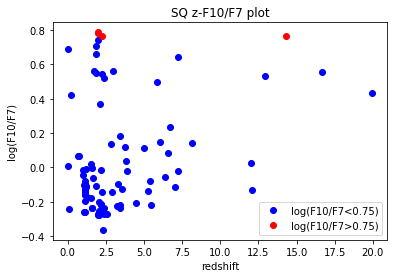

In [29]:
z=sed002['best.universe.redshift'].values.tolist()+sed006['best.universe.redshift'].values.tolist()
f10_f7=np.log10(ob002['f10/f7']).values.tolist()+np.log10(ob006['f10/f7']).values.tolist()

z_pah=[]
z_all=[]
y_pah=[]
y_all=[]

for i,a in enumerate(f10_f7):
    if a > 0.75:
        z_pah.append(z[i])
        y_pah.append(a)
    else:
        z_all.append(z[i])
        y_all.append(a)

plt.plot(z_all,y_all,'o',label='log(F10/F7<0.75)',c='b')
plt.plot(z_pah,y_pah,'o',label='log(F10/F7>0.75)',c='r')
# plt.xlim(0,2)
plt.legend()
plt.title('SQ z-F10/F7 plot')
plt.xlabel('redshift')
plt.ylabel('log(F10/F7)')
plt.savefig('SQ_z_F10_F7_plot.png')

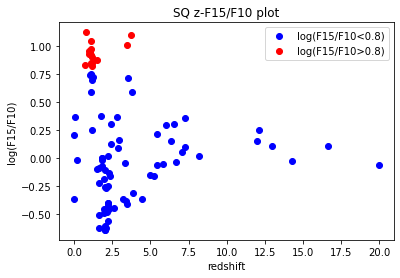

In [30]:
y=sed002['best.universe.redshift'].values.tolist()+sed006['best.universe.redshift'].values.tolist()
f15_f10=np.log10(ob002['f15/f10']).values.tolist()+np.log10(ob006['f15/f10']).values.tolist()
z_pah=[]
z_all=[]
y_pah=[]
y_all=[]

for i,a in enumerate(f15_f10):
    if a > 0.8:
        z_pah.append(z[i])
        y_pah.append(a)
    else:
        z_all.append(y[i])
        y_all.append(a)

plt.plot(z_all,y_all,'o',label='log(F15/F10<0.8)',c='b')
plt.plot(z_pah,y_pah,'o',label='log(F15/F10>0.8)',c='r')

# plt.xlim(0,2)
plt.legend()
plt.title('SQ z-F15/F10 plot')
plt.xlabel('redshift')
plt.ylabel('log(F15/F10)')
plt.savefig('SQ_z_F15_F10_plot.png')
